# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:21:59.985119: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:22:02.769525
2025-04-14 20:22:02.769525


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:21:57"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

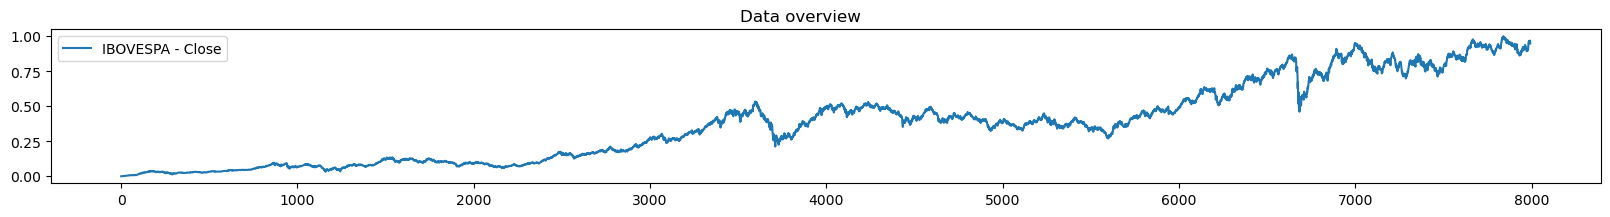

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

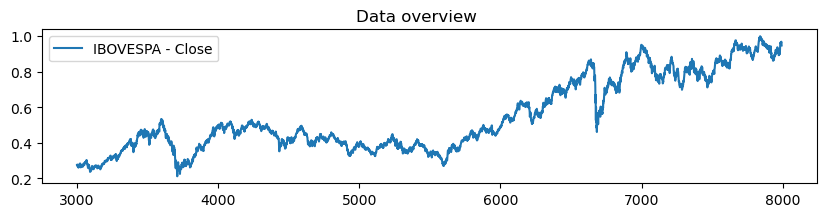

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

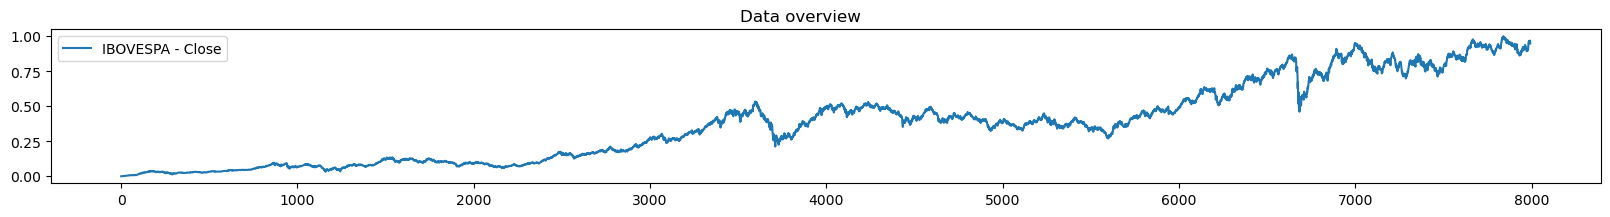

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

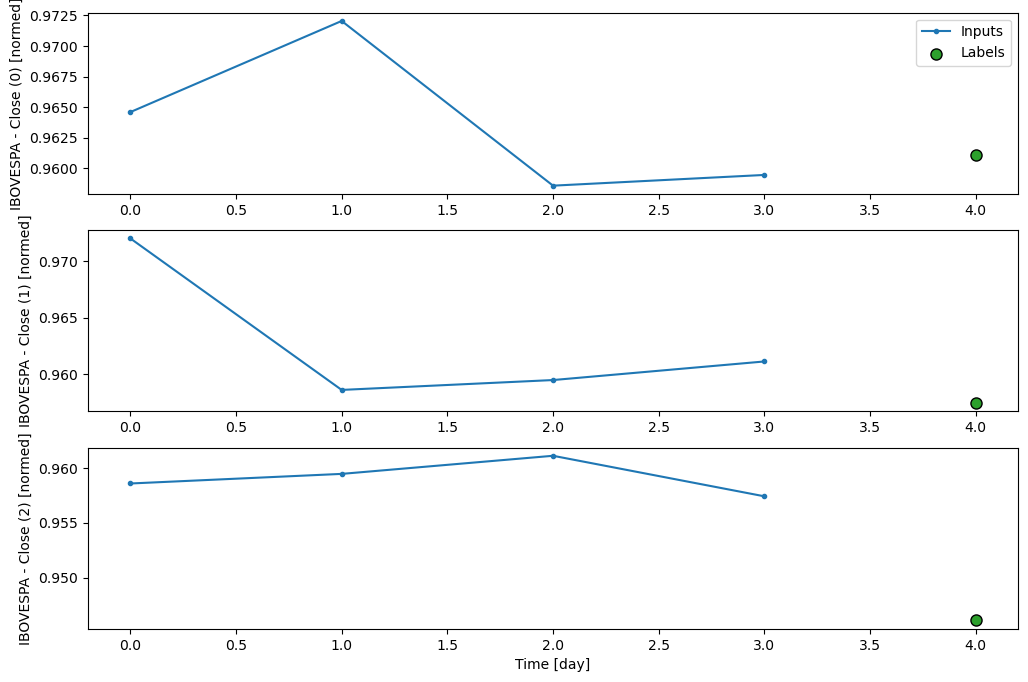

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:06 2s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 54.0530 - mean_squared_error: 5.7903e-05 - root_mean_squared_error: 0.0070  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 43.8009 - mean_squared_error: 6.7438e-05 - root_mean_squared_error: 0.0079

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 37.6448 - mean_squared_error: 6.4707e-05 - root_mean_squared_error: 0.0078

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 34.1478 - mean_squared_error: 7.9936e-05 - root_mean_squared_error: 0.0086

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 31.9881 - mean_squared_error: 9.9856e-05 - root_mean_squared_error: 0.0096

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.5822 - mean_squared_error: 1.1964e-04 - root_mean_squared_error: 0.0104

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 29.3319 - mean_squared_error: 1.3344e-04 - root_mean_squared_error: 0.0110

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 28.2031 - mean_squared_error: 1.4558e-04 - root_mean_squared_error: 0.0115

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 27.4017 - mean_squared_error: 1.6900e-04 - root_mean_squared_error: 0.0123

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 26.6835 - mean_squared_error: 2.0306e-04 - root_mean_squared_error: 0.0134

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 25.9616 - mean_squared_error: 2.2940e-04 - root_mean_squared_error: 0.0142

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 25.3722 - mean_squared_error: 2.6249e-04 - root_mean_squared_error: 0.0151

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 24.8259 - mean_squared_error: 3.4905e-04 - root_mean_squared_error: 0.0168

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 24.4928 - mean_squared_error: 5.1334e-04 - root_mean_squared_error: 0.0192

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 24.1795 - mean_squared_error: 7.3078e-04 - root_mean_squared_error: 0.0221

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 23.8835 - mean_squared_error: 8.9515e-04 - root_mean_squared_error: 0.0243

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 23.5748 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0262    

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 23.2270 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0280

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 22.8863 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0295

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 22.6163 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0309

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 22.3620 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0325

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 22.1461 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0339

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 21.9419 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 21.7586 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0369

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 21.5633 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0387

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 21.4487 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0397 - val_loss: 0.2114 - val_mean_absolute_error: 0.2114 - val_mean_absolute_percentage_error: 22.7346 - val_mean_squared_error: 0.0460 - val_root_mean_squared_error: 0.2145 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5744 - mean_absolute_error: 0.5744 - mean_absolute_percentage_error: 26953.2715 - mean_squared_error: 0.3300 - root_mean_squared_error: 0.5744

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5338 - mean_absolute_error: 0.5338 - mean_absolute_percentage_error: 10990.5977 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5354 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4657 - mean_absolute_error: 0.4657 - mean_absolute_percentage_error: 7616.6060 - mean_squared_error: 0.2348 - root_mean_squared_error: 0.4801 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4026 - mean_absolute_error: 0.4026 - mean_absolute_percentage_error: 5836.8784 - mean_squared_error: 0.1928 - root_mean_squared_error: 0.4303

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 4875.7021 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3961

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 4151.3696 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3663

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 3677.2761 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3447

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 3274.0105 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3248

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2502 - mean_absolute_error: 0.2502 - mean_absolute_percentage_error: 2986.7720 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.3097

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 2726.9026 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2952

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 2532.4202 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2839

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 2349.5071 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2728

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 2222.9792 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2649

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 2110.7864 - mean_squared_error: 0.0789 - root_mean_squared_error: 0.2579

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 1998.7670 - mean_squared_error: 0.0752 - root_mean_squared_error: 0.2509

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1765 - mean_absolute_error: 0.1765 - mean_absolute_percentage_error: 1888.7594 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2438

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1707 - mean_absolute_error: 0.1707 - mean_absolute_percentage_error: 1800.6035 - mean_squared_error: 0.0684 - root_mean_squared_error: 0.2380

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1654 - mean_absolute_error: 0.1654 - mean_absolute_percentage_error: 1721.0778 - mean_squared_error: 0.0657 - root_mean_squared_error: 0.2326

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1599 - mean_absolute_error: 0.1599 - mean_absolute_percentage_error: 1641.3307 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2270

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1554 - mean_absolute_error: 0.1554 - mean_absolute_percentage_error: 1576.2159 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2223

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1508 - mean_absolute_error: 0.1508 - mean_absolute_percentage_error: 1510.2463 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2175

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1471 - mean_absolute_error: 0.1471 - mean_absolute_percentage_error: 1455.8866 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2135

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - mean_absolute_percentage_error: 1400.3260 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2094

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1402 - mean_absolute_error: 0.1402 - mean_absolute_percentage_error: 1354.1697 - mean_squared_error: 0.0529 - root_mean_squared_error: 0.2059

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 1306.6678 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2023

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 1266.9431 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.1993

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 1246.0090 - mean_squared_error: 0.0491 - root_mean_squared_error: 0.1977 - val_loss: 0.1098 - val_mean_absolute_error: 0.1098 - val_mean_absolute_percentage_error: 11.7392 - val_mean_squared_error: 0.0131 - val_root_mean_squared_error: 0.1147 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.5230 - mean_absolute_error: 0.5230 - mean_absolute_percentage_error: 24536.2148 - mean_squared_error: 0.2736 - root_mean_squared_error: 0.5230

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5080 - mean_absolute_error: 0.5080 - mean_absolute_percentage_error: 10119.8477 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.5083 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4676 - mean_absolute_error: 0.4676 - mean_absolute_percentage_error: 6931.3687 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4732 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4208 - mean_absolute_error: 0.4208 - mean_absolute_percentage_error: 5531.7417 - mean_squared_error: 0.1954 - root_mean_squared_error: 0.4374

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3755 - mean_absolute_error: 0.3755 - mean_absolute_percentage_error: 4567.1572 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.4037

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3419 - mean_absolute_error: 0.3419 - mean_absolute_percentage_error: 3971.6763 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3787

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - mean_absolute_percentage_error: 3484.6184 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3558

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 3147.4712 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3384

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2671 - mean_absolute_error: 0.2671 - mean_absolute_percentage_error: 2848.8572 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3219

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 2629.2415 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.3090

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2351 - mean_absolute_error: 0.2351 - mean_absolute_percentage_error: 2425.4631 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2964

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 2253.9197 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2852

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 2120.9980 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2763

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 1992.3572 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2674

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 1890.5347 - mean_squared_error: 0.0789 - root_mean_squared_error: 0.2601

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 1790.1200 - mean_squared_error: 0.0750 - root_mean_squared_error: 0.2528

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 1709.3230 - mean_squared_error: 0.0719 - root_mean_squared_error: 0.2468

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1718 - mean_absolute_error: 0.1718 - mean_absolute_percentage_error: 1628.5001 - mean_squared_error: 0.0688 - root_mean_squared_error: 0.2405

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 1562.6544 - mean_squared_error: 0.0663 - root_mean_squared_error: 0.2354

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1610 - mean_absolute_error: 0.1610 - mean_absolute_percentage_error: 1496.0699 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2300

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 1441.2850 - mean_squared_error: 0.0615 - root_mean_squared_error: 0.2255

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 1385.3785 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2208

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 1339.0013 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2169

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1443 - mean_absolute_error: 0.1443 - mean_absolute_percentage_error: 1291.3447 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2129

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 1251.5394 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2095

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 1214.3474 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2063

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 1210.3713 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2060 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324 - val_mean_absolute_percentage_error: 3.4561 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0370 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 13146.3926 - mean_squared_error: 0.0785 - root_mean_squared_error: 0.2802

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 5033.7495 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2486  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 3524.6509 - mean_squared_error: 0.0495 - root_mean_squared_error: 0.2192

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1777 - mean_absolute_error: 0.1777 - mean_absolute_percentage_error: 2712.4419 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1958

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1729 - mean_absolute_error: 0.1729 - mean_absolute_percentage_error: 2597.7661 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1919

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 2493.6404 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1883

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 2270.4807 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1800

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 2024.1602 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1702

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - mean_absolute_percentage_error: 1830.9379 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1618

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 1674.7786 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1546

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 1580.2246 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1500

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 1512.7355 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1467

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 1422.7285 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1420

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 1331.6681 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1372

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 1252.6666 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1328

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 1174.1915 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1283

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 1122.1193 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1252

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 1074.9189 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1224

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1031.9158 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1197

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 992.5653 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1172 

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 956.4142 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1150

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 923.0720 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1128

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 882.4213 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1102

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 854.4347 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1084

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 824.1599 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1064

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 796.1585 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1045

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 766.6154 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1024

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 739.3877 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1005

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 714.2050 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0987

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 699.4006 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0976

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 677.0664 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0959

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 658.7701 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0945

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 641.5298 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0932

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 627.5254 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0922

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 616.3602 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0913

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 603.5275 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0904

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 591.2701 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0895

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 583.4020 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0889 - val_loss: 0.0441 - val_mean_absolute_error: 0.0441 - val_mean_absolute_percentage_error: 4.7100 - val_mean_squared_error: 0.0022 - val_root_mean_squared_error: 0.0464 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 3348.4858 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0711

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 1458.0293 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 997.9914 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0472 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 755.5585 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0411

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 630.2881 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 534.1235 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 473.6521 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 439.0967 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 399.2100 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 362.4860 - mean_squared_error: 9.5326e-04 - root_mean_squared_error: 0.0283

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 336.0927 - mean_squared_error: 8.8970e-04 - root_mean_squared_error: 0.0272

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 313.7088 - mean_squared_error: 8.3569e-04 - root_mean_squared_error: 0.0263

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 294.4208 - mean_squared_error: 7.8887e-04 - root_mean_squared_error: 0.0254

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 277.6121 - mean_squared_error: 7.4805e-04 - root_mean_squared_error: 0.0247

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 262.8175 - mean_squared_error: 7.1231e-04 - root_mean_squared_error: 0.0241

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 255.1250 - mean_squared_error: 6.9368e-04 - root_mean_squared_error: 0.0237

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 242.8023 - mean_squared_error: 6.6387e-04 - root_mean_squared_error: 0.0232

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 231.7353 - mean_squared_error: 6.3746e-04 - root_mean_squared_error: 0.0227

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 220.3936 - mean_squared_error: 6.1154e-04 - root_mean_squared_error: 0.0222

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 211.4391 - mean_squared_error: 5.9192e-04 - root_mean_squared_error: 0.0218

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 202.1450 - mean_squared_error: 5.7163e-04 - root_mean_squared_error: 0.0215

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 195.7488 - mean_squared_error: 5.5773e-04 - root_mean_squared_error: 0.0212

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 189.7859 - mean_squared_error: 5.4471e-04 - root_mean_squared_error: 0.0210

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 184.2117 - mean_squared_error: 5.3239e-04 - root_mean_squared_error: 0.0207

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 178.1495 - mean_squared_error: 5.1887e-04 - root_mean_squared_error: 0.0205

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 172.5144 - mean_squared_error: 5.0629e-04 - root_mean_squared_error: 0.0202

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 167.2605 - mean_squared_error: 4.9445e-04 - root_mean_squared_error: 0.0200

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 162.3494 - mean_squared_error: 4.8337e-04 - root_mean_squared_error: 0.0198

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 159.6839 - mean_squared_error: 4.7735e-04 - root_mean_squared_error: 0.0196

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 155.2451 - mean_squared_error: 4.6736e-04 - root_mean_squared_error: 0.0194

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 150.4964 - mean_squared_error: 4.5717e-04 - root_mean_squared_error: 0.0192

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 146.5993 - mean_squared_error: 4.4984e-04 - root_mean_squared_error: 0.0191

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 142.9225 - mean_squared_error: 4.4479e-04 - root_mean_squared_error: 0.0190

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 140.9138 - mean_squared_error: 4.4360e-04 - root_mean_squared_error: 0.0191

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 139.4491 - mean_squared_error: 4.4358e-04 - root_mean_squared_error: 0.0191

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 137.5485 - mean_squared_error: 4.4394e-04 - root_mean_squared_error: 0.0191

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 136.1612 - mean_squared_error: 4.4472e-04 - root_mean_squared_error: 0.0192

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 133.9178 - mean_squared_error: 4.4597e-04 - root_mean_squared_error: 0.0192 - val_loss: 0.0148 - val_mean_absolute_error: 0.0148 - val_mean_absolute_percentage_error: 1.6400 - val_mean_squared_error: 3.4977e-04 - val_root_mean_squared_error: 0.0187 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 4817.4062 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1025

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 1893.0071 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0833 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 1281.0236 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0703

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 969.4944 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0615 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 804.7219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0560

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 682.2053 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0514

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 602.6525 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 535.3578 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 487.6320 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0431

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 444.5590 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 412.3987 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 382.1990 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 358.9089 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 340.6950 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 326.3580 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 315.0896 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0341

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 302.9825 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 290.3441 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0327

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 280.2021 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 270.8121 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 260.8950 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 252.8512 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0304

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 249.5686 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 243.2773 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0298

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 235.4120 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 228.9750 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 222.9146 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 217.2016 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 212.5582 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0280

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 206.6995 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0278

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 201.1883 - mean_squared_error: 9.8952e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274 - val_mean_absolute_percentage_error: 2.9173 - val_mean_squared_error: 8.9186e-04 - val_root_mean_squared_error: 0.0299 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 3400.4102 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0723

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 1489.7269 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 990.7933 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0496 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 860.2935 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0465

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 723.9014 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 642.4686 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 547.7897 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 495.0983 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 446.3791 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 397.4766 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 359.2712 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 325.5239 - mean_squared_error: 9.6952e-04 - root_mean_squared_error: 0.0286

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 300.6902 - mean_squared_error: 9.0279e-04 - root_mean_squared_error: 0.0274

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 277.6240 - mean_squared_error: 8.4066e-04 - root_mean_squared_error: 0.0264

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 259.9815 - mean_squared_error: 7.9285e-04 - root_mean_squared_error: 0.0256

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 243.0828 - mean_squared_error: 7.4724e-04 - root_mean_squared_error: 0.0247

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 229.8296 - mean_squared_error: 7.1150e-04 - root_mean_squared_error: 0.0241

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 216.8595 - mean_squared_error: 6.7633e-04 - root_mean_squared_error: 0.0234

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 206.4959 - mean_squared_error: 6.4811e-04 - root_mean_squared_error: 0.0229

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 196.1946 - mean_squared_error: 6.2004e-04 - root_mean_squared_error: 0.0224

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 187.8484 - mean_squared_error: 5.9717e-04 - root_mean_squared_error: 0.0219

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 179.4486 - mean_squared_error: 5.7403e-04 - root_mean_squared_error: 0.0215

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 172.5676 - mean_squared_error: 5.5497e-04 - root_mean_squared_error: 0.0211

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 165.5733 - mean_squared_error: 5.3551e-04 - root_mean_squared_error: 0.0207

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 159.1770 - mean_squared_error: 5.1773e-04 - root_mean_squared_error: 0.0203

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 153.8702 - mean_squared_error: 5.0362e-04 - root_mean_squared_error: 0.0200

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 148.4183 - mean_squared_error: 4.9151e-04 - root_mean_squared_error: 0.0198

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 143.8688 - mean_squared_error: 4.8436e-04 - root_mean_squared_error: 0.0197

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 140.5403 - mean_squared_error: 4.7967e-04 - root_mean_squared_error: 0.0197 - val_loss: 0.0351 - val_mean_absolute_error: 0.0351 - val_mean_absolute_percentage_error: 3.7509 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0371 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 3497.7395 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0744

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 1353.7168 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 881.0566 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0472 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 688.1898 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 560.8522 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 484.2124 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 422.4026 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 380.0808 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 343.0421 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 313.2591 - mean_squared_error: 9.4943e-04 - root_mean_squared_error: 0.0281

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 288.7126 - mean_squared_error: 8.8125e-04 - root_mean_squared_error: 0.0269

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 270.0095 - mean_squared_error: 8.2938e-04 - root_mean_squared_error: 0.0260

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 253.8122 - mean_squared_error: 7.8458e-04 - root_mean_squared_error: 0.0253

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 238.1716 - mean_squared_error: 7.4177e-04 - root_mean_squared_error: 0.0245

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 225.8164 - mean_squared_error: 7.0829e-04 - root_mean_squared_error: 0.0239

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 215.9672 - mean_squared_error: 6.8160e-04 - root_mean_squared_error: 0.0234

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 207.0268 - mean_squared_error: 6.5750e-04 - root_mean_squared_error: 0.0230

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 197.8986 - mean_squared_error: 6.3274e-04 - root_mean_squared_error: 0.0225

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 189.6183 - mean_squared_error: 6.1014e-04 - root_mean_squared_error: 0.0221

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 182.0703 - mean_squared_error: 5.8948e-04 - root_mean_squared_error: 0.0217

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 175.1590 - mean_squared_error: 5.7054e-04 - root_mean_squared_error: 0.0213

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 168.1291 - mean_squared_error: 5.5132e-04 - root_mean_squared_error: 0.0209

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 162.3152 - mean_squared_error: 5.3572e-04 - root_mean_squared_error: 0.0206

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 156.3567 - mean_squared_error: 5.2070e-04 - root_mean_squared_error: 0.0204

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 151.3965 - mean_squared_error: 5.1036e-04 - root_mean_squared_error: 0.0202

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 146.2808 - mean_squared_error: 5.0132e-04 - root_mean_squared_error: 0.0201

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 143.8649 - mean_squared_error: 4.9719e-04 - root_mean_squared_error: 0.0200 - val_loss: 0.0146 - val_mean_absolute_error: 0.0146 - val_mean_absolute_percentage_error: 1.5496 - val_mean_squared_error: 2.9569e-04 - val_root_mean_squared_error: 0.0172 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 4261.5771 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0906

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 1667.0135 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 1085.0668 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0598

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 845.5430 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0528 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 687.5647 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0474

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 592.7699 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0439

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 516.4744 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 464.2846 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 418.5470 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0364

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 385.1610 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 354.3515 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 330.9303 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 310.6928 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 293.0195 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 275.8174 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 262.1343 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 248.5858 - mean_squared_error: 9.8592e-04 - root_mean_squared_error: 0.0277

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 237.6470 - mean_squared_error: 9.4633e-04 - root_mean_squared_error: 0.0271

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 227.7181 - mean_squared_error: 9.1024e-04 - root_mean_squared_error: 0.0265

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 218.6618 - mean_squared_error: 8.7721e-04 - root_mean_squared_error: 0.0260

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 210.3649 - mean_squared_error: 8.4691e-04 - root_mean_squared_error: 0.0255

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 201.9216 - mean_squared_error: 8.1605e-04 - root_mean_squared_error: 0.0250

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 194.9344 - mean_squared_error: 7.9052e-04 - root_mean_squared_error: 0.0245

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 187.7698 - mean_squared_error: 7.6501e-04 - root_mean_squared_error: 0.0241

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 181.7995 - mean_squared_error: 7.4412e-04 - root_mean_squared_error: 0.0238

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 175.6370 - mean_squared_error: 7.2284e-04 - root_mean_squared_error: 0.0234

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 173.8780 - mean_squared_error: 7.1678e-04 - root_mean_squared_error: 0.0233 - val_loss: 0.0090 - val_mean_absolute_error: 0.0090 - val_mean_absolute_percentage_error: 0.9698 - val_mean_squared_error: 1.2717e-04 - val_root_mean_squared_error: 0.0113 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 4:28 1s/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 4309.5127 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0917

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 1693.0098 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 1150.4004 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0641

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 875.0329 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0569 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 728.3529 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0522

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 618.4523 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0482

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 546.9265 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 491.7353 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 447.7239 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 411.6794 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 384.6475 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 355.9316 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 333.8626 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 312.6425 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 295.9439 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 279.5595 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 266.4379 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 254.6083 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 242.7518 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 233.0758 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 224.2146 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 217.8198 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 210.1656 - mean_squared_error: 9.7104e-04 - root_mean_squared_error: 0.0277

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 203.8434 - mean_squared_error: 9.4507e-04 - root_mean_squared_error: 0.0273

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 197.2175 - mean_squared_error: 9.1933e-04 - root_mean_squared_error: 0.0269

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 191.0529 - mean_squared_error: 8.9707e-04 - root_mean_squared_error: 0.0266

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 184.6849 - mean_squared_error: 8.7476e-04 - root_mean_squared_error: 0.0263

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 184.0747 - mean_squared_error: 8.7263e-04 - root_mean_squared_error: 0.0263 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9563 - val_mean_squared_error: 1.2341e-04 - val_root_mean_squared_error: 0.0111 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 3122.2488 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0664

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 1140.7471 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0500 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 784.7814 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0419 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 612.8416 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 508.5982 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 437.6433 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 385.7364 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 342.0503 - mean_squared_error: 9.0576e-04 - root_mean_squared_error: 0.0277

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 311.1942 - mean_squared_error: 8.3019e-04 - root_mean_squared_error: 0.0264

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 283.4420 - mean_squared_error: 7.6148e-04 - root_mean_squared_error: 0.0251

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 262.7747 - mean_squared_error: 7.0990e-04 - root_mean_squared_error: 0.0242

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 245.1955 - mean_squared_error: 6.6581e-04 - root_mean_squared_error: 0.0233

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 230.0393 - mean_squared_error: 6.2780e-04 - root_mean_squared_error: 0.0225

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 215.4634 - mean_squared_error: 5.9181e-04 - root_mean_squared_error: 0.0218

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 203.9916 - mean_squared_error: 5.6383e-04 - root_mean_squared_error: 0.0213

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 192.7321 - mean_squared_error: 5.3654e-04 - root_mean_squared_error: 0.0207

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 183.7118 - mean_squared_error: 5.1469e-04 - root_mean_squared_error: 0.0202

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 174.7232 - mean_squared_error: 4.9285e-04 - root_mean_squared_error: 0.0198

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 167.4244 - mean_squared_error: 4.7501e-04 - root_mean_squared_error: 0.0194

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 160.0652 - mean_squared_error: 4.5694e-04 - root_mean_squared_error: 0.0190

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 154.0268 - mean_squared_error: 4.4212e-04 - root_mean_squared_error: 0.0187

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 147.8803 - mean_squared_error: 4.2702e-04 - root_mean_squared_error: 0.0183

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 142.2510 - mean_squared_error: 4.1324e-04 - root_mean_squared_error: 0.0180

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 137.5743 - mean_squared_error: 4.0219e-04 - root_mean_squared_error: 0.0178

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 132.7598 - mean_squared_error: 3.9098e-04 - root_mean_squared_error: 0.0175

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 128.7334 - mean_squared_error: 3.8174e-04 - root_mean_squared_error: 0.0173

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 127.4513 - mean_squared_error: 3.7881e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 0.8724 - val_mean_squared_error: 1.0268e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 3958.8462 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0842

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 1552.8616 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 1021.2511 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 802.0107 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0520 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 655.6387 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0473

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 575.4044 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0444

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 514.4588 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 461.0724 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 418.7742 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 384.3193 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 352.7361 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0346

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 328.8597 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 306.2072 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 288.5842 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 271.4669 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 257.8747 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 244.4352 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 232.4566 - mean_squared_error: 9.6575e-04 - root_mean_squared_error: 0.0280

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 222.7314 - mean_squared_error: 9.2959e-04 - root_mean_squared_error: 0.0274

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 212.9277 - mean_squared_error: 8.9300e-04 - root_mean_squared_error: 0.0268

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 204.8841 - mean_squared_error: 8.6287e-04 - root_mean_squared_error: 0.0263

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 196.6974 - mean_squared_error: 8.3214e-04 - root_mean_squared_error: 0.0258

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 189.9224 - mean_squared_error: 8.0679e-04 - root_mean_squared_error: 0.0253

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 182.9754 - mean_squared_error: 7.8167e-04 - root_mean_squared_error: 0.0249

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 176.5695 - mean_squared_error: 7.5978e-04 - root_mean_squared_error: 0.0246

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 170.6413 - mean_squared_error: 7.4032e-04 - root_mean_squared_error: 0.0242

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 168.9490 - mean_squared_error: 7.3485e-04 - root_mean_squared_error: 0.0242 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0778 - val_mean_squared_error: 1.5144e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 3383.2915 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0719

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 1249.6582 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 864.0306 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0477 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 661.3148 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 552.4849 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 477.5024 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 416.9032 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 375.2997 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 341.9895 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 314.6434 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 289.4259 - mean_squared_error: 9.3085e-04 - root_mean_squared_error: 0.0279

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 270.2713 - mean_squared_error: 8.7389e-04 - root_mean_squared_error: 0.0269

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 252.0325 - mean_squared_error: 8.1973e-04 - root_mean_squared_error: 0.0260

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 237.8095 - mean_squared_error: 7.7859e-04 - root_mean_squared_error: 0.0252

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 225.2719 - mean_squared_error: 7.4418e-04 - root_mean_squared_error: 0.0246

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 214.1201 - mean_squared_error: 7.1405e-04 - root_mean_squared_error: 0.0241

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 203.0793 - mean_squared_error: 6.8403e-04 - root_mean_squared_error: 0.0236

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 194.1642 - mean_squared_error: 6.5946e-04 - root_mean_squared_error: 0.0232

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 186.0728 - mean_squared_error: 6.3690e-04 - root_mean_squared_error: 0.0227

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 180.2760 - mean_squared_error: 6.2058e-04 - root_mean_squared_error: 0.0224

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 173.3838 - mean_squared_error: 6.0101e-04 - root_mean_squared_error: 0.0221

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 167.0483 - mean_squared_error: 5.8287e-04 - root_mean_squared_error: 0.0217

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 160.5813 - mean_squared_error: 5.6427e-04 - root_mean_squared_error: 0.0213

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 154.6431 - mean_squared_error: 5.4735e-04 - root_mean_squared_error: 0.0210

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 149.1696 - mean_squared_error: 5.3190e-04 - root_mean_squared_error: 0.0207

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 144.5960 - mean_squared_error: 5.1910e-04 - root_mean_squared_error: 0.0205

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 141.7156 - mean_squared_error: 5.1105e-04 - root_mean_squared_error: 0.0203 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9469 - val_mean_squared_error: 1.1869e-04 - val_root_mean_squared_error: 0.0109 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 2962.2590 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0629

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 1087.4716 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0482 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 755.8878 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 579.2813 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 484.2184 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 418.5407 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 365.4944 - mean_squared_error: 9.9139e-04 - root_mean_squared_error: 0.0296

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 325.5885 - mean_squared_error: 8.9432e-04 - root_mean_squared_error: 0.0279

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 297.1836 - mean_squared_error: 8.2386e-04 - root_mean_squared_error: 0.0266

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 271.4636 - mean_squared_error: 7.5915e-04 - root_mean_squared_error: 0.0254

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 252.2109 - mean_squared_error: 7.1026e-04 - root_mean_squared_error: 0.0245

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 234.0902 - mean_squared_error: 6.6404e-04 - root_mean_squared_error: 0.0236

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 220.0841 - mean_squared_error: 6.2835e-04 - root_mean_squared_error: 0.0229

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 206.5602 - mean_squared_error: 5.9473e-04 - root_mean_squared_error: 0.0222

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 195.8805 - mean_squared_error: 5.6918e-04 - root_mean_squared_error: 0.0217

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 186.3597 - mean_squared_error: 5.4656e-04 - root_mean_squared_error: 0.0212

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 176.9140 - mean_squared_error: 5.2391e-04 - root_mean_squared_error: 0.0208

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 169.2741 - mean_squared_error: 5.0537e-04 - root_mean_squared_error: 0.0204

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 162.3304 - mean_squared_error: 4.8837e-04 - root_mean_squared_error: 0.0200

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 155.9895 - mean_squared_error: 4.7274e-04 - root_mean_squared_error: 0.0197

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 149.5581 - mean_squared_error: 4.5689e-04 - root_mean_squared_error: 0.0193

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 144.2523 - mean_squared_error: 4.4397e-04 - root_mean_squared_error: 0.0190

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 138.8250 - mean_squared_error: 4.3096e-04 - root_mean_squared_error: 0.0188

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 134.3133 - mean_squared_error: 4.2062e-04 - root_mean_squared_error: 0.0185

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 129.6655 - mean_squared_error: 4.1013e-04 - root_mean_squared_error: 0.0183

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 125.3599 - mean_squared_error: 4.0051e-04 - root_mean_squared_error: 0.0181

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 124.9473 - mean_squared_error: 3.9959e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8592 - val_mean_squared_error: 1.0087e-04 - val_root_mean_squared_error: 0.0100 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 3105.2742 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0660

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 1209.0339 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0522 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 791.3122 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 618.9057 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 533.5889 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 456.1209 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 400.1888 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 357.6758 - mean_squared_error: 9.9429e-04 - root_mean_squared_error: 0.0292

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 320.8896 - mean_squared_error: 8.9960e-04 - root_mean_squared_error: 0.0276

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 294.3147 - mean_squared_error: 8.3034e-04 - root_mean_squared_error: 0.0264

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 269.9769 - mean_squared_error: 7.6626e-04 - root_mean_squared_error: 0.0252

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 251.5938 - mean_squared_error: 7.1760e-04 - root_mean_squared_error: 0.0243

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 234.1671 - mean_squared_error: 6.7143e-04 - root_mean_squared_error: 0.0234

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 220.6202 - mean_squared_error: 6.3580e-04 - root_mean_squared_error: 0.0227

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 208.7053 - mean_squared_error: 6.0465e-04 - root_mean_squared_error: 0.0220

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 198.1329 - mean_squared_error: 5.7707e-04 - root_mean_squared_error: 0.0215

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 188.6815 - mean_squared_error: 5.5247e-04 - root_mean_squared_error: 0.0210

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 179.2831 - mean_squared_error: 5.2797e-04 - root_mean_squared_error: 0.0205

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 171.6650 - mean_squared_error: 5.0800e-04 - root_mean_squared_error: 0.0200

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 163.9971 - mean_squared_error: 4.8786e-04 - root_mean_squared_error: 0.0196

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 157.7146 - mean_squared_error: 4.7133e-04 - root_mean_squared_error: 0.0192

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 151.3282 - mean_squared_error: 4.5453e-04 - root_mean_squared_error: 0.0189

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 146.0486 - mean_squared_error: 4.4069e-04 - root_mean_squared_error: 0.0186

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 140.6398 - mean_squared_error: 4.2702e-04 - root_mean_squared_error: 0.0183

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 136.1378 - mean_squared_error: 4.1645e-04 - root_mean_squared_error: 0.0180

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 131.9435 - mean_squared_error: 4.0704e-04 - root_mean_squared_error: 0.0179

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 128.8742 - mean_squared_error: 4.0025e-04 - root_mean_squared_error: 0.0177 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085 - val_mean_absolute_percentage_error: 0.9319 - val_mean_squared_error: 1.0757e-04 - val_root_mean_squared_error: 0.0104 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 2935.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0624

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 1146.1810 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0498  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 752.6540 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 589.9965 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 481.7456 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 410.1164 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 363.2254 - mean_squared_error: 9.8538e-04 - root_mean_squared_error: 0.0294

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 326.8867 - mean_squared_error: 8.9498e-04 - root_mean_squared_error: 0.0278

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 300.7486 - mean_squared_error: 8.2889e-04 - root_mean_squared_error: 0.0266

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 273.9408 - mean_squared_error: 7.6025e-04 - root_mean_squared_error: 0.0253

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 253.9681 - mean_squared_error: 7.0862e-04 - root_mean_squared_error: 0.0243

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 236.9841 - mean_squared_error: 6.6466e-04 - root_mean_squared_error: 0.0234

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 223.8737 - mean_squared_error: 6.3105e-04 - root_mean_squared_error: 0.0228

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 212.2822 - mean_squared_error: 6.0188e-04 - root_mean_squared_error: 0.0222

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 203.1870 - mean_squared_error: 5.7989e-04 - root_mean_squared_error: 0.0217

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 193.8024 - mean_squared_error: 5.5818e-04 - root_mean_squared_error: 0.0213

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 187.3725 - mean_squared_error: 5.4347e-04 - root_mean_squared_error: 0.0210

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 179.5012 - mean_squared_error: 5.2547e-04 - root_mean_squared_error: 0.0207

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 171.4757 - mean_squared_error: 5.0687e-04 - root_mean_squared_error: 0.0203

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 164.2051 - mean_squared_error: 4.8978e-04 - root_mean_squared_error: 0.0200

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 157.5845 - mean_squared_error: 4.7404e-04 - root_mean_squared_error: 0.0196

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 150.8868 - mean_squared_error: 4.5793e-04 - root_mean_squared_error: 0.0193

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 145.3733 - mean_squared_error: 4.4455e-04 - root_mean_squared_error: 0.0190

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 140.2866 - mean_squared_error: 4.3214e-04 - root_mean_squared_error: 0.0187

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 135.5776 - mean_squared_error: 4.2077e-04 - root_mean_squared_error: 0.0185

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 130.7383 - mean_squared_error: 4.0931e-04 - root_mean_squared_error: 0.0182

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 126.6970 - mean_squared_error: 3.9981e-04 - root_mean_squared_error: 0.0180

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 123.3300 - mean_squared_error: 3.9194e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9027 - val_mean_squared_error: 1.0982e-04 - val_root_mean_squared_error: 0.0105 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 1472.9679 - mean_squared_error: 9.7635e-04 - root_mean_squared_error: 0.0312

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 550.7763 - mean_squared_error: 5.1759e-04 - root_mean_squared_error: 0.0222  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 365.5148 - mean_squared_error: 3.5817e-04 - root_mean_squared_error: 0.0180

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 273.5782 - mean_squared_error: 2.7352e-04 - root_mean_squared_error: 0.0155

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 225.8395 - mean_squared_error: 2.2887e-04 - root_mean_squared_error: 0.0140

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 190.7973 - mean_squared_error: 1.9616e-04 - root_mean_squared_error: 0.0128

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 168.2143 - mean_squared_error: 1.7488e-04 - root_mean_squared_error: 0.0120

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 149.2253 - mean_squared_error: 1.5688e-04 - root_mean_squared_error: 0.0113

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 135.8587 - mean_squared_error: 1.4432e-04 - root_mean_squared_error: 0.0108

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 123.8342 - mean_squared_error: 1.3297e-04 - root_mean_squared_error: 0.0104

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 113.9619 - mean_squared_error: 1.2360e-04 - root_mean_squared_error: 0.0100

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 105.6978 - mean_squared_error: 1.1590e-04 - root_mean_squared_error: 0.0097

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 98.6670 - mean_squared_error: 1.0974e-04 - root_mean_squared_error: 0.0094 

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 93.1778 - mean_squared_error: 1.0542e-04 - root_mean_squared_error: 0.0092

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 87.8252 - mean_squared_error: 1.0148e-04 - root_mean_squared_error: 0.0091

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 83.5608 - mean_squared_error: 9.8461e-05 - root_mean_squared_error: 0.0090

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 79.3329 - mean_squared_error: 9.5588e-05 - root_mean_squared_error: 0.0089

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 75.9141 - mean_squared_error: 9.3224e-05 - root_mean_squared_error: 0.0088

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 72.4802 - mean_squared_error: 9.0863e-05 - root_mean_squared_error: 0.0087

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 69.6724 - mean_squared_error: 8.8926e-05 - root_mean_squared_error: 0.0086

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 66.8232 - mean_squared_error: 8.6987e-05 - root_mean_squared_error: 0.0085

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 64.4712 - mean_squared_error: 8.5435e-05 - root_mean_squared_error: 0.0085

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 62.0653 - mean_squared_error: 8.4198e-05 - root_mean_squared_error: 0.0084

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 60.0673 - mean_squared_error: 8.4289e-05 - root_mean_squared_error: 0.0085

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.2110 - mean_squared_error: 8.5946e-05 - root_mean_squared_error: 0.0086

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 56.2951 - mean_squared_error: 8.8255e-05 - root_mean_squared_error: 0.0087 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 1.3225 - val_mean_squared_error: 2.0581e-04 - val_root_mean_squared_error: 0.0143 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 2134.7583 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 822.6428 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 561.8823 - mean_squared_error: 9.7419e-04 - root_mean_squared_error: 0.0305

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 429.1373 - mean_squared_error: 8.0314e-04 - root_mean_squared_error: 0.0275

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 358.4633 - mean_squared_error: 7.0219e-04 - root_mean_squared_error: 0.0256

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 309.9522 - mean_squared_error: 6.2653e-04 - root_mean_squared_error: 0.0241

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 274.2011 - mean_squared_error: 5.6720e-04 - root_mean_squared_error: 0.0228

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 258.0602 - mean_squared_error: 5.3938e-04 - root_mean_squared_error: 0.0221

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 246.6083 - mean_squared_error: 5.1924e-04 - root_mean_squared_error: 0.0217

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 222.4254 - mean_squared_error: 4.7564e-04 - root_mean_squared_error: 0.0206

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 204.7790 - mean_squared_error: 4.4294e-04 - root_mean_squared_error: 0.0198

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 188.5023 - mean_squared_error: 4.1218e-04 - root_mean_squared_error: 0.0190

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 176.1332 - mean_squared_error: 3.8850e-04 - root_mean_squared_error: 0.0184

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 164.3484 - mean_squared_error: 3.6590e-04 - root_mean_squared_error: 0.0178

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 155.1505 - mean_squared_error: 3.4856e-04 - root_mean_squared_error: 0.0173

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 147.0304 - mean_squared_error: 3.3325e-04 - root_mean_squared_error: 0.0169

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 139.8016 - mean_squared_error: 3.1957e-04 - root_mean_squared_error: 0.0165

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 133.3208 - mean_squared_error: 3.0725e-04 - root_mean_squared_error: 0.0162

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 127.4738 - mean_squared_error: 2.9607e-04 - root_mean_squared_error: 0.0159

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 121.6099 - mean_squared_error: 2.8478e-04 - root_mean_squared_error: 0.0155

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 116.8214 - mean_squared_error: 2.7551e-04 - root_mean_squared_error: 0.0153

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 112.4344 - mean_squared_error: 2.6703e-04 - root_mean_squared_error: 0.0150

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 108.3982 - mean_squared_error: 2.5925e-04 - root_mean_squared_error: 0.0148

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 104.2743 - mean_squared_error: 2.5138e-04 - root_mean_squared_error: 0.0145

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 100.4847 - mean_squared_error: 2.4463e-04 - root_mean_squared_error: 0.0143

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 97.3268 - mean_squared_error: 2.3941e-04 - root_mean_squared_error: 0.0142 

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 94.0667 - mean_squared_error: 2.3422e-04 - root_mean_squared_error: 0.0140

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 92.5264 - mean_squared_error: 2.3179e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8175 - val_mean_squared_error: 9.1953e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 2935.1584 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0624

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 1082.3307 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0485 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 747.3323 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 570.8116 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 475.9231 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 404.6935 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 358.1648 - mean_squared_error: 9.3509e-04 - root_mean_squared_error: 0.0284

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 318.6648 - mean_squared_error: 8.3924e-04 - root_mean_squared_error: 0.0267

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 290.5965 - mean_squared_error: 7.7027e-04 - root_mean_squared_error: 0.0254

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 265.2148 - mean_squared_error: 7.0728e-04 - root_mean_squared_error: 0.0242

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 246.2310 - mean_squared_error: 6.5980e-04 - root_mean_squared_error: 0.0233

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 230.0367 - mean_squared_error: 6.1922e-04 - root_mean_squared_error: 0.0224

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 218.9840 - mean_squared_error: 5.9160e-04 - root_mean_squared_error: 0.0219

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 206.3936 - mean_squared_error: 5.6046e-04 - root_mean_squared_error: 0.0212

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 195.3113 - mean_squared_error: 5.3328e-04 - root_mean_squared_error: 0.0206

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 186.5091 - mean_squared_error: 5.1174e-04 - root_mean_squared_error: 0.0202

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 178.5424 - mean_squared_error: 4.9228e-04 - root_mean_squared_error: 0.0198

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 172.1642 - mean_squared_error: 4.7671e-04 - root_mean_squared_error: 0.0194

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 167.0844 - mean_squared_error: 4.6425e-04 - root_mean_squared_error: 0.0191

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 161.5609 - mean_squared_error: 4.5067e-04 - root_mean_squared_error: 0.0188

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 156.4268 - mean_squared_error: 4.3804e-04 - root_mean_squared_error: 0.0186

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 151.6408 - mean_squared_error: 4.2623e-04 - root_mean_squared_error: 0.0183

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 146.5520 - mean_squared_error: 4.1367e-04 - root_mean_squared_error: 0.0180

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 142.3984 - mean_squared_error: 4.0342e-04 - root_mean_squared_error: 0.0178

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 138.4967 - mean_squared_error: 3.9386e-04 - root_mean_squared_error: 0.0175

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 134.8240 - mean_squared_error: 3.8498e-04 - root_mean_squared_error: 0.0173

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 131.3615 - mean_squared_error: 3.7718e-04 - root_mean_squared_error: 0.0172

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 128.0909 - mean_squared_error: 3.7027e-04 - root_mean_squared_error: 0.0170

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 124.5673 - mean_squared_error: 3.6326e-04 - root_mean_squared_error: 0.0169

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 121.2527 - mean_squared_error: 3.5692e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0922 - val_mean_squared_error: 1.5145e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 2248.0063 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0478

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 926.2174 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 607.4267 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 454.2270 - mean_squared_error: 8.2634e-04 - root_mean_squared_error: 0.0274

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 397.6740 - mean_squared_error: 7.3457e-04 - root_mean_squared_error: 0.0257

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 355.0130 - mean_squared_error: 6.6345e-04 - root_mean_squared_error: 0.0242

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 316.6161 - mean_squared_error: 5.9799e-04 - root_mean_squared_error: 0.0229

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 298.5750 - mean_squared_error: 5.6679e-04 - root_mean_squared_error: 0.0222

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 282.6981 - mean_squared_error: 5.3908e-04 - root_mean_squared_error: 0.0216

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 268.6058 - mean_squared_error: 5.1430e-04 - root_mean_squared_error: 0.0210

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 253.0549 - mean_squared_error: 4.8673e-04 - root_mean_squared_error: 0.0203

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 241.9907 - mean_squared_error: 4.6696e-04 - root_mean_squared_error: 0.0199

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 229.5921 - mean_squared_error: 4.4465e-04 - root_mean_squared_error: 0.0193

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 216.4619 - mean_squared_error: 4.2087e-04 - root_mean_squared_error: 0.0187

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 204.9031 - mean_squared_error: 3.9983e-04 - root_mean_squared_error: 0.0182

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 197.9309 - mean_squared_error: 3.8710e-04 - root_mean_squared_error: 0.0178

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 191.4685 - mean_squared_error: 3.7527e-04 - root_mean_squared_error: 0.0175

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 185.4606 - mean_squared_error: 3.6431e-04 - root_mean_squared_error: 0.0172

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 175.9007 - mean_squared_error: 3.4701e-04 - root_mean_squared_error: 0.0168

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 168.5380 - mean_squared_error: 3.3384e-04 - root_mean_squared_error: 0.0164

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 162.9071 - mean_squared_error: 3.2397e-04 - root_mean_squared_error: 0.0162

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 155.6970 - mean_squared_error: 3.1188e-04 - root_mean_squared_error: 0.0158 

128/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 150.0640 - mean_squared_error: 3.0316e-04 - root_mean_squared_error: 0.0156

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 144.8692 - mean_squared_error: 2.9557e-04 - root_mean_squared_error: 0.0154

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 139.2925 - mean_squared_error: 2.8752e-04 - root_mean_squared_error: 0.0153

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 134.1731 - mean_squared_error: 2.8014e-04 - root_mean_squared_error: 0.0151

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 128.8094 - mean_squared_error: 2.7227e-04 - root_mean_squared_error: 0.0149

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 123.9000 - mean_squared_error: 2.6494e-04 - root_mean_squared_error: 0.0147

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 119.3878 - mean_squared_error: 2.5811e-04 - root_mean_squared_error: 0.0145

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 115.2253 - mean_squared_error: 2.5173e-04 - root_mean_squared_error: 0.0143

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 111.8378 - mean_squared_error: 2.4647e-04 - root_mean_squared_error: 0.0142

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 108.2260 - mean_squared_error: 2.4083e-04 - root_mean_squared_error: 0.0140

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 105.2706 - mean_squared_error: 2.3621e-04 - root_mean_squared_error: 0.0139

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 102.4884 - mean_squared_error: 2.3190e-04 - root_mean_squared_error: 0.0138

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 99.5021 - mean_squared_error: 2.2758e-04 - root_mean_squared_error: 0.0137 

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 96.7019 - mean_squared_error: 2.2360e-04 - root_mean_squared_error: 0.0136

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 94.3909 - mean_squared_error: 2.2037e-04 - root_mean_squared_error: 0.0135

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 92.1993 - mean_squared_error: 2.1733e-04 - root_mean_squared_error: 0.0134 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7559 - val_mean_squared_error: 7.8678e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 1602.2356 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 647.3892 - mean_squared_error: 6.9004e-04 - root_mean_squared_error: 0.0258

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 458.8510 - mean_squared_error: 5.3192e-04 - root_mean_squared_error: 0.0224

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 354.5622 - mean_squared_error: 4.3565e-04 - root_mean_squared_error: 0.0201

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 292.5795 - mean_squared_error: 3.7195e-04 - root_mean_squared_error: 0.0185

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 250.8246 - mean_squared_error: 3.2611e-04 - root_mean_squared_error: 0.0172

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 223.9490 - mean_squared_error: 2.9567e-04 - root_mean_squared_error: 0.0163

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 202.8533 - mean_squared_error: 2.7134e-04 - root_mean_squared_error: 0.0155

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 188.0229 - mean_squared_error: 2.5391e-04 - root_mean_squared_error: 0.0149

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 175.4473 - mean_squared_error: 2.3891e-04 - root_mean_squared_error: 0.0144

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 164.6440 - mean_squared_error: 2.2591e-04 - root_mean_squared_error: 0.0140

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 153.7955 - mean_squared_error: 2.1272e-04 - root_mean_squared_error: 0.0135

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 143.2045 - mean_squared_error: 1.9974e-04 - root_mean_squared_error: 0.0131

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 134.1246 - mean_squared_error: 1.8852e-04 - root_mean_squared_error: 0.0126

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 126.2439 - mean_squared_error: 1.7880e-04 - root_mean_squared_error: 0.0123

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 119.3316 - mean_squared_error: 1.7038e-04 - root_mean_squared_error: 0.0120

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 113.2162 - mean_squared_error: 1.6326e-04 - root_mean_squared_error: 0.0117

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 107.7639 - mean_squared_error: 1.5713e-04 - root_mean_squared_error: 0.0115

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 102.8667 - mean_squared_error: 1.5174e-04 - root_mean_squared_error: 0.0113

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 98.4413 - mean_squared_error: 1.4694e-04 - root_mean_squared_error: 0.0111 

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 94.9034 - mean_squared_error: 1.4317e-04 - root_mean_squared_error: 0.0110

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 92.0886 - mean_squared_error: 1.4016e-04 - root_mean_squared_error: 0.0108

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 89.8810 - mean_squared_error: 1.3778e-04 - root_mean_squared_error: 0.0108

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 87.3827 - mean_squared_error: 1.3508e-04 - root_mean_squared_error: 0.0107

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 84.6570 - mean_squared_error: 1.3216e-04 - root_mean_squared_error: 0.0105

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 82.1143 - mean_squared_error: 1.2941e-04 - root_mean_squared_error: 0.0104

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 80.0662 - mean_squared_error: 1.2721e-04 - root_mean_squared_error: 0.0104

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 77.8155 - mean_squared_error: 1.2478e-04 - root_mean_squared_error: 0.0103

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 75.9953 - mean_squared_error: 1.2284e-04 - root_mean_squared_error: 0.0102

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.9879 - mean_squared_error: 1.2076e-04 - root_mean_squared_error: 0.0101

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 71.8347 - mean_squared_error: 1.1908e-04 - root_mean_squared_error: 0.0101

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 70.0630 - mean_squared_error: 1.1815e-04 - root_mean_squared_error: 0.0100

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 68.1545 - mean_squared_error: 1.1750e-04 - root_mean_squared_error: 0.0100

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 66.1424 - mean_squared_error: 1.1709e-04 - root_mean_squared_error: 0.0100 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6907 - val_mean_squared_error: 6.1357e-05 - val_root_mean_squared_error: 0.0078 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 2081.5232 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0443

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 917.7319 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 660.0577 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 495.5334 - mean_squared_error: 8.2407e-04 - root_mean_squared_error: 0.0277

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 412.4193 - mean_squared_error: 7.0381e-04 - root_mean_squared_error: 0.0253

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 362.5886 - mean_squared_error: 6.2855e-04 - root_mean_squared_error: 0.0238

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 324.6906 - mean_squared_error: 5.6968e-04 - root_mean_squared_error: 0.0225

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 286.1079 - mean_squared_error: 5.0830e-04 - root_mean_squared_error: 0.0211

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 256.5483 - mean_squared_error: 4.6034e-04 - root_mean_squared_error: 0.0199

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 233.0936 - mean_squared_error: 4.2168e-04 - root_mean_squared_error: 0.0190

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 213.9878 - mean_squared_error: 3.8977e-04 - root_mean_squared_error: 0.0182

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 198.0823 - mean_squared_error: 3.6294e-04 - root_mean_squared_error: 0.0174

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 184.6143 - mean_squared_error: 3.4019e-04 - root_mean_squared_error: 0.0168

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 173.0449 - mean_squared_error: 3.2069e-04 - root_mean_squared_error: 0.0163

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 162.9862 - mean_squared_error: 3.0390e-04 - root_mean_squared_error: 0.0158

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 154.1503 - mean_squared_error: 2.8952e-04 - root_mean_squared_error: 0.0154

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 146.3256 - mean_squared_error: 2.7760e-04 - root_mean_squared_error: 0.0151

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 139.3493 - mean_squared_error: 2.6871e-04 - root_mean_squared_error: 0.0148

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 133.0833 - mean_squared_error: 2.6209e-04 - root_mean_squared_error: 0.0147

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 127.4157 - mean_squared_error: 2.5622e-04 - root_mean_squared_error: 0.0146

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 122.2615 - mean_squared_error: 2.5085e-04 - root_mean_squared_error: 0.0145

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 118.1175 - mean_squared_error: 2.4641e-04 - root_mean_squared_error: 0.0144

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 113.7483 - mean_squared_error: 2.4159e-04 - root_mean_squared_error: 0.0143

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 109.7243 - mean_squared_error: 2.3705e-04 - root_mean_squared_error: 0.0141

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 106.4539 - mean_squared_error: 2.3323e-04 - root_mean_squared_error: 0.0141

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 103.8178 - mean_squared_error: 2.3008e-04 - root_mean_squared_error: 0.0140

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 101.3225 - mean_squared_error: 2.2705e-04 - root_mean_squared_error: 0.0139

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 98.1954 - mean_squared_error: 2.2325e-04 - root_mean_squared_error: 0.0138 

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 95.6297 - mean_squared_error: 2.2022e-04 - root_mean_squared_error: 0.0137

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 92.8741 - mean_squared_error: 2.1719e-04 - root_mean_squared_error: 0.0137

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 90.2888 - mean_squared_error: 2.1435e-04 - root_mean_squared_error: 0.0136

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 87.8580 - mean_squared_error: 2.1169e-04 - root_mean_squared_error: 0.0135

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 86.4116 - mean_squared_error: 2.1010e-04 - root_mean_squared_error: 0.0135 - val_loss: 0.0086 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.9183 - val_mean_squared_error: 1.1098e-04 - val_root_mean_squared_error: 0.0105 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 1291.8555 - mean_squared_error: 7.5069e-04 - root_mean_squared_error: 0.0274

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 550.8132 - mean_squared_error: 4.4327e-04 - root_mean_squared_error: 0.0206  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 358.8455 - mean_squared_error: 3.0433e-04 - root_mean_squared_error: 0.0167

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 273.4253 - mean_squared_error: 2.3678e-04 - root_mean_squared_error: 0.0145

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 223.6478 - mean_squared_error: 1.9623e-04 - root_mean_squared_error: 0.0130

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 190.7047 - mean_squared_error: 1.6927e-04 - root_mean_squared_error: 0.0120

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 167.1402 - mean_squared_error: 1.5007e-04 - root_mean_squared_error: 0.0112

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 149.2822 - mean_squared_error: 1.3538e-04 - root_mean_squared_error: 0.0106

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 135.2260 - mean_squared_error: 1.2370e-04 - root_mean_squared_error: 0.0101

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 123.8608 - mean_squared_error: 1.1422e-04 - root_mean_squared_error: 0.0097

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 114.4539 - mean_squared_error: 1.0635e-04 - root_mean_squared_error: 0.0093

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 106.5201 - mean_squared_error: 9.9765e-05 - root_mean_squared_error: 0.0090

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 99.7245 - mean_squared_error: 9.4137e-05 - root_mean_squared_error: 0.0087 

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 94.5245 - mean_squared_error: 8.9897e-05 - root_mean_squared_error: 0.0085

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 89.2749 - mean_squared_error: 8.5763e-05 - root_mean_squared_error: 0.0083

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 84.6389 - mean_squared_error: 8.2494e-05 - root_mean_squared_error: 0.0081

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 80.5122 - mean_squared_error: 7.9828e-05 - root_mean_squared_error: 0.0080

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 76.8107 - mean_squared_error: 7.7578e-05 - root_mean_squared_error: 0.0079

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 73.4697 - mean_squared_error: 7.5630e-05 - root_mean_squared_error: 0.0079

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 70.4378 - mean_squared_error: 7.3940e-05 - root_mean_squared_error: 0.0078

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 67.6717 - mean_squared_error: 7.2384e-05 - root_mean_squared_error: 0.0077

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 65.1369 - mean_squared_error: 7.0946e-05 - root_mean_squared_error: 0.0077

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 62.8053 - mean_squared_error: 6.9637e-05 - root_mean_squared_error: 0.0076

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 60.6525 - mean_squared_error: 6.8431e-05 - root_mean_squared_error: 0.0076

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 58.8990 - mean_squared_error: 6.7461e-05 - root_mean_squared_error: 0.0075

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 57.0280 - mean_squared_error: 6.6452e-05 - root_mean_squared_error: 0.0075

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 55.2848 - mean_squared_error: 6.5593e-05 - root_mean_squared_error: 0.0075

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 53.6574 - mean_squared_error: 6.5261e-05 - root_mean_squared_error: 0.0075

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 52.1348 - mean_squared_error: 6.5526e-05 - root_mean_squared_error: 0.0075

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 50.7066 - mean_squared_error: 6.6171e-05 - root_mean_squared_error: 0.0076

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 49.2019 - mean_squared_error: 6.7138e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7016 - val_mean_squared_error: 6.7142e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 1892.2051 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0403

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 777.7806 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0319  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 532.7729 - mean_squared_error: 7.8989e-04 - root_mean_squared_error: 0.0274

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 415.2150 - mean_squared_error: 6.4138e-04 - root_mean_squared_error: 0.0244

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 344.0532 - mean_squared_error: 5.4449e-04 - root_mean_squared_error: 0.0222

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 295.7426 - mean_squared_error: 4.7579e-04 - root_mean_squared_error: 0.0206

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 260.5426 - mean_squared_error: 4.2433e-04 - root_mean_squared_error: 0.0193

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 233.6011 - mean_squared_error: 3.8431e-04 - root_mean_squared_error: 0.0183

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 212.2341 - mean_squared_error: 3.5209e-04 - root_mean_squared_error: 0.0174

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 194.8322 - mean_squared_error: 3.2550e-04 - root_mean_squared_error: 0.0166

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 180.3463 - mean_squared_error: 3.0315e-04 - root_mean_squared_error: 0.0160

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 168.0812 - mean_squared_error: 2.8419e-04 - root_mean_squared_error: 0.0154

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 157.5450 - mean_squared_error: 2.6793e-04 - root_mean_squared_error: 0.0149

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 148.3847 - mean_squared_error: 2.5393e-04 - root_mean_squared_error: 0.0145

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 140.3387 - mean_squared_error: 2.4198e-04 - root_mean_squared_error: 0.0141

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 133.2139 - mean_squared_error: 2.3211e-04 - root_mean_squared_error: 0.0138

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 126.8608 - mean_squared_error: 2.2459e-04 - root_mean_squared_error: 0.0136

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 121.1533 - mean_squared_error: 2.1872e-04 - root_mean_squared_error: 0.0134

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 115.9906 - mean_squared_error: 2.1346e-04 - root_mean_squared_error: 0.0133

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 111.2946 - mean_squared_error: 2.0857e-04 - root_mean_squared_error: 0.0132

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 107.0025 - mean_squared_error: 2.0396e-04 - root_mean_squared_error: 0.0131

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 103.0627 - mean_squared_error: 1.9963e-04 - root_mean_squared_error: 0.0130

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 99.4328 - mean_squared_error: 1.9556e-04 - root_mean_squared_error: 0.0128 

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 96.0760 - mean_squared_error: 1.9171e-04 - root_mean_squared_error: 0.0127

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 92.9611 - mean_squared_error: 1.8808e-04 - root_mean_squared_error: 0.0126

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 90.0625 - mean_squared_error: 1.8471e-04 - root_mean_squared_error: 0.0125

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 87.3577 - mean_squared_error: 1.8165e-04 - root_mean_squared_error: 0.0124

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 84.8279 - mean_squared_error: 1.7908e-04 - root_mean_squared_error: 0.0124

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 82.7438 - mean_squared_error: 1.7700e-04 - root_mean_squared_error: 0.0123

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 80.4966 - mean_squared_error: 1.7478e-04 - root_mean_squared_error: 0.0123

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 78.6389 - mean_squared_error: 1.7295e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7831 - val_mean_squared_error: 8.3659e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 1237.1122 - mean_squared_error: 6.8957e-04 - root_mean_squared_error: 0.0263

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 528.5739 - mean_squared_error: 4.1142e-04 - root_mean_squared_error: 0.0199  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 346.3600 - mean_squared_error: 2.8835e-04 - root_mean_squared_error: 0.0164

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 265.8542 - mean_squared_error: 2.3004e-04 - root_mean_squared_error: 0.0145

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 218.7328 - mean_squared_error: 1.9489e-04 - root_mean_squared_error: 0.0132

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 190.6046 - mean_squared_error: 1.7317e-04 - root_mean_squared_error: 0.0124

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 172.2515 - mean_squared_error: 1.5854e-04 - root_mean_squared_error: 0.0118

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 153.1618 - mean_squared_error: 1.4300e-04 - root_mean_squared_error: 0.0111

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 138.2782 - mean_squared_error: 1.3068e-04 - root_mean_squared_error: 0.0106

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 126.3250 - mean_squared_error: 1.2066e-04 - root_mean_squared_error: 0.0101

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 116.4987 - mean_squared_error: 1.1236e-04 - root_mean_squared_error: 0.0097

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 108.2491 - mean_squared_error: 1.0539e-04 - root_mean_squared_error: 0.0094

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 101.2107 - mean_squared_error: 9.9428e-05 - root_mean_squared_error: 0.0091

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 95.1245 - mean_squared_error: 9.4296e-05 - root_mean_squared_error: 0.0089 

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 90.4315 - mean_squared_error: 9.0402e-05 - root_mean_squared_error: 0.0087

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 85.6646 - mean_squared_error: 8.6730e-05 - root_mean_squared_error: 0.0085

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 81.4310 - mean_squared_error: 8.3814e-05 - root_mean_squared_error: 0.0084

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 78.0923 - mean_squared_error: 8.1619e-05 - root_mean_squared_error: 0.0083

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 75.0461 - mean_squared_error: 7.9712e-05 - root_mean_squared_error: 0.0082

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 71.8746 - mean_squared_error: 7.7817e-05 - root_mean_squared_error: 0.0081

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 68.9887 - mean_squared_error: 7.6115e-05 - root_mean_squared_error: 0.0080

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 66.6671 - mean_squared_error: 7.4723e-05 - root_mean_squared_error: 0.0080

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 64.2185 - mean_squared_error: 7.3253e-05 - root_mean_squared_error: 0.0079

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 62.2349 - mean_squared_error: 7.2060e-05 - root_mean_squared_error: 0.0078

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 60.1293 - mean_squared_error: 7.0806e-05 - root_mean_squared_error: 0.0078

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 58.1768 - mean_squared_error: 6.9670e-05 - root_mean_squared_error: 0.0077

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 56.3605 - mean_squared_error: 6.8659e-05 - root_mean_squared_error: 0.0077

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 54.8720 - mean_squared_error: 6.7906e-05 - root_mean_squared_error: 0.0077

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 53.2759 - mean_squared_error: 6.7572e-05 - root_mean_squared_error: 0.0077

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 51.9629 - mean_squared_error: 6.7642e-05 - root_mean_squared_error: 0.0077

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 50.5486 - mean_squared_error: 6.7953e-05 - root_mean_squared_error: 0.0077

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.2181 - mean_squared_error: 6.8349e-05 - root_mean_squared_error: 0.0078

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.0575 - mean_squared_error: 6.8400e-05 - root_mean_squared_error: 0.0078 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7286 - val_mean_squared_error: 6.7707e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 1757.2163 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 720.9526 - mean_squared_error: 8.9582e-04 - root_mean_squared_error: 0.0295

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 514.5522 - mean_squared_error: 7.1019e-04 - root_mean_squared_error: 0.0261

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 399.2315 - mean_squared_error: 5.9078e-04 - root_mean_squared_error: 0.0236

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 337.2731 - mean_squared_error: 5.1697e-04 - root_mean_squared_error: 0.0220

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 288.4598 - mean_squared_error: 4.5417e-04 - root_mean_squared_error: 0.0204

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 257.1646 - mean_squared_error: 4.1197e-04 - root_mean_squared_error: 0.0193

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 229.5851 - mean_squared_error: 3.7359e-04 - root_mean_squared_error: 0.0183

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 210.3625 - mean_squared_error: 3.4614e-04 - root_mean_squared_error: 0.0175

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 192.3847 - mean_squared_error: 3.1993e-04 - root_mean_squared_error: 0.0168

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 179.2592 - mean_squared_error: 3.0045e-04 - root_mean_squared_error: 0.0162

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 166.5109 - mean_squared_error: 2.8129e-04 - root_mean_squared_error: 0.0156

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 156.9061 - mean_squared_error: 2.6670e-04 - root_mean_squared_error: 0.0151

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 149.6049 - mean_squared_error: 2.5554e-04 - root_mean_squared_error: 0.0148

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 140.9708 - mean_squared_error: 2.4231e-04 - root_mean_squared_error: 0.0143

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 134.2773 - mean_squared_error: 2.3215e-04 - root_mean_squared_error: 0.0140

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 127.4480 - mean_squared_error: 2.2215e-04 - root_mean_squared_error: 0.0137

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 122.0794 - mean_squared_error: 2.1451e-04 - root_mean_squared_error: 0.0134

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 116.5292 - mean_squared_error: 2.0673e-04 - root_mean_squared_error: 0.0132

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 112.1135 - mean_squared_error: 2.0058e-04 - root_mean_squared_error: 0.0130

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 107.5021 - mean_squared_error: 1.9419e-04 - root_mean_squared_error: 0.0128

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 103.7990 - mean_squared_error: 1.8902e-04 - root_mean_squared_error: 0.0126

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 99.8989 - mean_squared_error: 1.8352e-04 - root_mean_squared_error: 0.0124 

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 96.7440 - mean_squared_error: 1.7907e-04 - root_mean_squared_error: 0.0122

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 93.3988 - mean_squared_error: 1.7432e-04 - root_mean_squared_error: 0.0121

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 90.6756 - mean_squared_error: 1.7046e-04 - root_mean_squared_error: 0.0119

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 87.7712 - mean_squared_error: 1.6634e-04 - root_mean_squared_error: 0.0118

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 85.3939 - mean_squared_error: 1.6300e-04 - root_mean_squared_error: 0.0117

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 83.1552 - mean_squared_error: 1.5993e-04 - root_mean_squared_error: 0.0116

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 81.0438 - mean_squared_error: 1.5734e-04 - root_mean_squared_error: 0.0115

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 79.0481 - mean_squared_error: 1.5500e-04 - root_mean_squared_error: 0.0114

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 76.8970 - mean_squared_error: 1.5256e-04 - root_mean_squared_error: 0.0113

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 74.8724 - mean_squared_error: 1.5035e-04 - root_mean_squared_error: 0.0113 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7315 - val_mean_squared_error: 7.3297e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 1792.9382 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 846.3184 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 566.9727 - mean_squared_error: 7.6531e-04 - root_mean_squared_error: 0.0271

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 427.5278 - mean_squared_error: 6.1542e-04 - root_mean_squared_error: 0.0240

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 356.6790 - mean_squared_error: 5.3148e-04 - root_mean_squared_error: 0.0222

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 302.2742 - mean_squared_error: 4.6241e-04 - root_mean_squared_error: 0.0205

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 268.0007 - mean_squared_error: 4.1698e-04 - root_mean_squared_error: 0.0194

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 241.4677 - mean_squared_error: 3.8078e-04 - root_mean_squared_error: 0.0184

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 220.2168 - mean_squared_error: 3.5105e-04 - root_mean_squared_error: 0.0176

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 202.7723 - mean_squared_error: 3.2617e-04 - root_mean_squared_error: 0.0169

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 186.2885 - mean_squared_error: 3.0231e-04 - root_mean_squared_error: 0.0162

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 174.1483 - mean_squared_error: 2.8453e-04 - root_mean_squared_error: 0.0156

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 163.6554 - mean_squared_error: 2.6903e-04 - root_mean_squared_error: 0.0151

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 154.4826 - mean_squared_error: 2.5538e-04 - root_mean_squared_error: 0.0147

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 145.3080 - mean_squared_error: 2.4168e-04 - root_mean_squared_error: 0.0143

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 138.2205 - mean_squared_error: 2.3114e-04 - root_mean_squared_error: 0.0139

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 131.0088 - mean_squared_error: 2.2068e-04 - root_mean_squared_error: 0.0136

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 125.3550 - mean_squared_error: 2.1272e-04 - root_mean_squared_error: 0.0133

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 120.2195 - mean_squared_error: 2.0556e-04 - root_mean_squared_error: 0.0131

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 117.4897 - mean_squared_error: 2.0177e-04 - root_mean_squared_error: 0.0129

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 113.0304 - mean_squared_error: 1.9561e-04 - root_mean_squared_error: 0.0127

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 108.9326 - mean_squared_error: 1.8999e-04 - root_mean_squared_error: 0.0125

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 104.6352 - mean_squared_error: 1.8408e-04 - root_mean_squared_error: 0.0123

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 101.1720 - mean_squared_error: 1.7928e-04 - root_mean_squared_error: 0.0122

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 97.5134 - mean_squared_error: 1.7421e-04 - root_mean_squared_error: 0.0120 

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 94.5449 - mean_squared_error: 1.7008e-04 - root_mean_squared_error: 0.0119

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 91.3889 - mean_squared_error: 1.6571e-04 - root_mean_squared_error: 0.0117

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 88.4582 - mean_squared_error: 1.6167e-04 - root_mean_squared_error: 0.0116

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 86.0598 - mean_squared_error: 1.5843e-04 - root_mean_squared_error: 0.0114

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 83.8016 - mean_squared_error: 1.5551e-04 - root_mean_squared_error: 0.0113

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 81.3780 - mean_squared_error: 1.5290e-04 - root_mean_squared_error: 0.0113

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 79.1060 - mean_squared_error: 1.5083e-04 - root_mean_squared_error: 0.0112

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 77.2311 - mean_squared_error: 1.4939e-04 - root_mean_squared_error: 0.0112

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 75.4535 - mean_squared_error: 1.4821e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.2021 - val_mean_squared_error: 1.7553e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 1766.8248 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0376

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 726.4577 - mean_squared_error: 9.1549e-04 - root_mean_squared_error: 0.0298

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 515.8661 - mean_squared_error: 7.0463e-04 - root_mean_squared_error: 0.0259

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 397.2494 - mean_squared_error: 5.6522e-04 - root_mean_squared_error: 0.0229

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 334.1871 - mean_squared_error: 4.8555e-04 - root_mean_squared_error: 0.0210

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 284.8819 - mean_squared_error: 4.2080e-04 - root_mean_squared_error: 0.0194

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 261.5699 - mean_squared_error: 3.8941e-04 - root_mean_squared_error: 0.0185

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 235.2960 - mean_squared_error: 3.5353e-04 - root_mean_squared_error: 0.0175

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 214.3217 - mean_squared_error: 3.2453e-04 - root_mean_squared_error: 0.0167

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 197.1438 - mean_squared_error: 3.0050e-04 - root_mean_squared_error: 0.0160

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 182.7925 - mean_squared_error: 2.8020e-04 - root_mean_squared_error: 0.0154

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 170.5958 - mean_squared_error: 2.6280e-04 - root_mean_squared_error: 0.0148

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 160.0883 - mean_squared_error: 2.4776e-04 - root_mean_squared_error: 0.0143

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 149.7170 - mean_squared_error: 2.3290e-04 - root_mean_squared_error: 0.0138

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 140.7410 - mean_squared_error: 2.2012e-04 - root_mean_squared_error: 0.0134

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 132.8871 - mean_squared_error: 2.0912e-04 - root_mean_squared_error: 0.0130

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 125.9531 - mean_squared_error: 1.9988e-04 - root_mean_squared_error: 0.0127

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 120.5192 - mean_squared_error: 1.9313e-04 - root_mean_squared_error: 0.0125

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 115.5863 - mean_squared_error: 1.8745e-04 - root_mean_squared_error: 0.0123

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 111.0839 - mean_squared_error: 1.8246e-04 - root_mean_squared_error: 0.0122

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 106.3939 - mean_squared_error: 1.7734e-04 - root_mean_squared_error: 0.0120

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 102.6363 - mean_squared_error: 1.7318e-04 - root_mean_squared_error: 0.0119

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 98.6869 - mean_squared_error: 1.6874e-04 - root_mean_squared_error: 0.0118 

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 95.4977 - mean_squared_error: 1.6513e-04 - root_mean_squared_error: 0.0117

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 92.9409 - mean_squared_error: 1.6220e-04 - root_mean_squared_error: 0.0116

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 90.1436 - mean_squared_error: 1.5897e-04 - root_mean_squared_error: 0.0115

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 87.1667 - mean_squared_error: 1.5550e-04 - root_mean_squared_error: 0.0114

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 84.3997 - mean_squared_error: 1.5228e-04 - root_mean_squared_error: 0.0112

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 82.1335 - mean_squared_error: 1.4969e-04 - root_mean_squared_error: 0.0112

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 79.7037 - mean_squared_error: 1.4714e-04 - root_mean_squared_error: 0.0111

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 77.7049 - mean_squared_error: 1.4521e-04 - root_mean_squared_error: 0.0110

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 75.5524 - mean_squared_error: 1.4321e-04 - root_mean_squared_error: 0.0110

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 73.5281 - mean_squared_error: 1.4140e-04 - root_mean_squared_error: 0.0109

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 72.8001 - mean_squared_error: 1.4075e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.6953 - val_mean_squared_error: 6.5947e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 1088.9717 - mean_squared_error: 5.3480e-04 - root_mean_squared_error: 0.0231

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 433.9457 - mean_squared_error: 2.9963e-04 - root_mean_squared_error: 0.0169  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 291.2399 - mean_squared_error: 2.1038e-04 - root_mean_squared_error: 0.0139

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 224.4654 - mean_squared_error: 1.6525e-04 - root_mean_squared_error: 0.0121

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 184.7384 - mean_squared_error: 1.3773e-04 - root_mean_squared_error: 0.0109

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 158.1316 - mean_squared_error: 1.1918e-04 - root_mean_squared_error: 0.0101

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 138.9304 - mean_squared_error: 1.0579e-04 - root_mean_squared_error: 0.0094

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 124.3197 - mean_squared_error: 9.5642e-05 - root_mean_squared_error: 0.0089

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 112.7872 - mean_squared_error: 8.7605e-05 - root_mean_squared_error: 0.0085

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 103.4363 - mean_squared_error: 8.1066e-05 - root_mean_squared_error: 0.0081

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 95.6782 - mean_squared_error: 7.5634e-05 - root_mean_squared_error: 0.0078 

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 89.1201 - mean_squared_error: 7.1058e-05 - root_mean_squared_error: 0.0076

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 83.4928 - mean_squared_error: 6.7143e-05 - root_mean_squared_error: 0.0074

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 78.6047 - mean_squared_error: 6.3798e-05 - root_mean_squared_error: 0.0072

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 74.3153 - mean_squared_error: 6.1060e-05 - root_mean_squared_error: 0.0070

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 70.5213 - mean_squared_error: 5.9043e-05 - root_mean_squared_error: 0.0069

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 67.1369 - mean_squared_error: 5.7394e-05 - root_mean_squared_error: 0.0068

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 64.0957 - mean_squared_error: 5.5974e-05 - root_mean_squared_error: 0.0068

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 61.3467 - mean_squared_error: 5.4752e-05 - root_mean_squared_error: 0.0067

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 58.8488 - mean_squared_error: 5.3687e-05 - root_mean_squared_error: 0.0067

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 56.5674 - mean_squared_error: 5.2705e-05 - root_mean_squared_error: 0.0066

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 54.4751 - mean_squared_error: 5.1819e-05 - root_mean_squared_error: 0.0066

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 52.5489 - mean_squared_error: 5.1019e-05 - root_mean_squared_error: 0.0066

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 50.9841 - mean_squared_error: 5.0382e-05 - root_mean_squared_error: 0.0065

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 49.3181 - mean_squared_error: 4.9722e-05 - root_mean_squared_error: 0.0065

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 47.7692 - mean_squared_error: 4.9156e-05 - root_mean_squared_error: 0.0065

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 46.3252 - mean_squared_error: 4.8723e-05 - root_mean_squared_error: 0.0065

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 44.9768 - mean_squared_error: 4.8873e-05 - root_mean_squared_error: 0.0065

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 43.7146 - mean_squared_error: 4.9475e-05 - root_mean_squared_error: 0.0066

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 42.9657 - mean_squared_error: 5.0035e-05 - root_mean_squared_error: 0.0066

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 41.9647 - mean_squared_error: 5.0907e-05 - root_mean_squared_error: 0.0067

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 41.5518 - mean_squared_error: 5.1293e-05 - root_mean_squared_error: 0.0067 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7144 - val_mean_squared_error: 6.9581e-05 - val_root_mean_squared_error: 0.0083 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 1432.9338 - mean_squared_error: 9.2935e-04 - root_mean_squared_error: 0.0305

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 583.3751 - mean_squared_error: 5.7288e-04 - root_mean_squared_error: 0.0235  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 396.9953 - mean_squared_error: 4.2060e-04 - root_mean_squared_error: 0.0199

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 309.4811 - mean_squared_error: 3.4274e-04 - root_mean_squared_error: 0.0178

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 256.6822 - mean_squared_error: 2.9261e-04 - root_mean_squared_error: 0.0163

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 220.8869 - mean_squared_error: 2.5724e-04 - root_mean_squared_error: 0.0152

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 194.7739 - mean_squared_error: 2.3051e-04 - root_mean_squared_error: 0.0143

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 174.7482 - mean_squared_error: 2.0946e-04 - root_mean_squared_error: 0.0135

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 158.8440 - mean_squared_error: 1.9239e-04 - root_mean_squared_error: 0.0129

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 147.3654 - mean_squared_error: 1.7985e-04 - root_mean_squared_error: 0.0124

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 136.3223 - mean_squared_error: 1.6763e-04 - root_mean_squared_error: 0.0119

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 126.9819 - mean_squared_error: 1.5721e-04 - root_mean_squared_error: 0.0115

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 118.9669 - mean_squared_error: 1.4825e-04 - root_mean_squared_error: 0.0111

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 112.0069 - mean_squared_error: 1.4057e-04 - root_mean_squared_error: 0.0108

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 105.9000 - mean_squared_error: 1.3409e-04 - root_mean_squared_error: 0.0105

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 100.4969 - mean_squared_error: 1.2887e-04 - root_mean_squared_error: 0.0103

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 95.6815 - mean_squared_error: 1.2481e-04 - root_mean_squared_error: 0.0102 

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 91.3574 - mean_squared_error: 1.2160e-04 - root_mean_squared_error: 0.0101

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 87.9168 - mean_squared_error: 1.1912e-04 - root_mean_squared_error: 0.0100

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 84.3222 - mean_squared_error: 1.1653e-04 - root_mean_squared_error: 0.0099

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 81.0403 - mean_squared_error: 1.1409e-04 - root_mean_squared_error: 0.0098

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 78.0307 - mean_squared_error: 1.1181e-04 - root_mean_squared_error: 0.0098

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 75.2601 - mean_squared_error: 1.0967e-04 - root_mean_squared_error: 0.0097

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 72.7004 - mean_squared_error: 1.0767e-04 - root_mean_squared_error: 0.0096

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 70.3271 - mean_squared_error: 1.0580e-04 - root_mean_squared_error: 0.0095

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 68.1199 - mean_squared_error: 1.0406e-04 - root_mean_squared_error: 0.0095

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 66.0616 - mean_squared_error: 1.0251e-04 - root_mean_squared_error: 0.0094

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 64.1378 - mean_squared_error: 1.0137e-04 - root_mean_squared_error: 0.0094

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 62.3348 - mean_squared_error: 1.0042e-04 - root_mean_squared_error: 0.0094

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 60.6412 - mean_squared_error: 9.9607e-05 - root_mean_squared_error: 0.0093

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 59.0473 - mean_squared_error: 9.8899e-05 - root_mean_squared_error: 0.0093 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6599 - val_mean_squared_error: 5.8557e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0047


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 1134.2090 - mean_squared_error: 5.8071e-04 - root_mean_squared_error: 0.0241

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 456.4255 - mean_squared_error: 3.4491e-04 - root_mean_squared_error: 0.0183  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 313.4827 - mean_squared_error: 2.7094e-04 - root_mean_squared_error: 0.0161

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 252.5371 - mean_squared_error: 2.3405e-04 - root_mean_squared_error: 0.0149

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 218.2796 - mean_squared_error: 2.1035e-04 - root_mean_squared_error: 0.0141

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 193.1637 - mean_squared_error: 1.9170e-04 - root_mean_squared_error: 0.0134

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 171.1552 - mean_squared_error: 1.7481e-04 - root_mean_squared_error: 0.0127

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 156.3799 - mean_squared_error: 1.6300e-04 - root_mean_squared_error: 0.0123

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 142.4026 - mean_squared_error: 1.5135e-04 - root_mean_squared_error: 0.0118

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 132.4796 - mean_squared_error: 1.4277e-04 - root_mean_squared_error: 0.0114

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 123.9997 - mean_squared_error: 1.3523e-04 - root_mean_squared_error: 0.0111

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 116.6617 - mean_squared_error: 1.2855e-04 - root_mean_squared_error: 0.0108

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 108.2715 - mean_squared_error: 1.2077e-04 - root_mean_squared_error: 0.0104

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 101.9690 - mean_squared_error: 1.1486e-04 - root_mean_squared_error: 0.0101

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 96.4400 - mean_squared_error: 1.0965e-04 - root_mean_squared_error: 0.0098 

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 91.5451 - mean_squared_error: 1.0506e-04 - root_mean_squared_error: 0.0096

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 86.5907 - mean_squared_error: 1.0052e-04 - root_mean_squared_error: 0.0094

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 82.7254 - mean_squared_error: 9.7259e-05 - root_mean_squared_error: 0.0092

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 78.7582 - mean_squared_error: 9.4123e-05 - root_mean_squared_error: 0.0091

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 75.6206 - mean_squared_error: 9.1706e-05 - root_mean_squared_error: 0.0090

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 72.7508 - mean_squared_error: 8.9536e-05 - root_mean_squared_error: 0.0089

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 70.8464 - mean_squared_error: 8.8142e-05 - root_mean_squared_error: 0.0088

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 69.4016 - mean_squared_error: 8.7096e-05 - root_mean_squared_error: 0.0088

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 68.0213 - mean_squared_error: 8.6090e-05 - root_mean_squared_error: 0.0087

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 67.0258 - mean_squared_error: 8.5360e-05 - root_mean_squared_error: 0.0087

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 65.7482 - mean_squared_error: 8.4416e-05 - root_mean_squared_error: 0.0086

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 64.2258 - mean_squared_error: 8.3284e-05 - root_mean_squared_error: 0.0086

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 62.5002 - mean_squared_error: 8.2010e-05 - root_mean_squared_error: 0.0085

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 61.1396 - mean_squared_error: 8.0996e-05 - root_mean_squared_error: 0.0085

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 59.8441 - mean_squared_error: 8.0037e-05 - root_mean_squared_error: 0.0084

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 58.1304 - mean_squared_error: 7.8790e-05 - root_mean_squared_error: 0.0084

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 56.5231 - mean_squared_error: 7.7651e-05 - root_mean_squared_error: 0.0083

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 55.0126 - mean_squared_error: 7.6655e-05 - root_mean_squared_error: 0.0083

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 53.5898 - mean_squared_error: 7.5817e-05 - root_mean_squared_error: 0.0082

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 52.0625 - mean_squared_error: 7.5324e-05 - root_mean_squared_error: 0.0082

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 50.8041 - mean_squared_error: 7.5083e-05 - root_mean_squared_error: 0.0082

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 49.6123 - mean_squared_error: 7.4962e-05 - root_mean_squared_error: 0.0082

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 48.3250 - mean_squared_error: 7.4884e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6566 - val_mean_squared_error: 5.6144e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0046


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 1466.9336 - mean_squared_error: 9.7398e-04 - root_mean_squared_error: 0.0312

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 563.8781 - mean_squared_error: 5.8386e-04 - root_mean_squared_error: 0.0237  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 370.2559 - mean_squared_error: 4.2501e-04 - root_mean_squared_error: 0.0200

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 283.9057 - mean_squared_error: 3.4209e-04 - root_mean_squared_error: 0.0178

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 250.7676 - mean_squared_error: 3.0792e-04 - root_mean_squared_error: 0.0167

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 218.1611 - mean_squared_error: 2.7310e-04 - root_mean_squared_error: 0.0157

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 191.2333 - mean_squared_error: 2.4337e-04 - root_mean_squared_error: 0.0147

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 170.8159 - mean_squared_error: 2.2020e-04 - root_mean_squared_error: 0.0139

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 154.7436 - mean_squared_error: 2.0154e-04 - root_mean_squared_error: 0.0132

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 140.4250 - mean_squared_error: 1.8462e-04 - root_mean_squared_error: 0.0126

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 129.8452 - mean_squared_error: 1.7199e-04 - root_mean_squared_error: 0.0121

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 120.9025 - mean_squared_error: 1.6128e-04 - root_mean_squared_error: 0.0116

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 113.2319 - mean_squared_error: 1.5214e-04 - root_mean_squared_error: 0.0113

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 106.5743 - mean_squared_error: 1.4455e-04 - root_mean_squared_error: 0.0110

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 101.9723 - mean_squared_error: 1.3957e-04 - root_mean_squared_error: 0.0108

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 96.6671 - mean_squared_error: 1.3390e-04 - root_mean_squared_error: 0.0105 

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 91.9410 - mean_squared_error: 1.2886e-04 - root_mean_squared_error: 0.0103

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 88.1513 - mean_squared_error: 1.2485e-04 - root_mean_squared_error: 0.0102

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 85.5291 - mean_squared_error: 1.2207e-04 - root_mean_squared_error: 0.0101

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 83.0747 - mean_squared_error: 1.1946e-04 - root_mean_squared_error: 0.0100

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 80.7722 - mean_squared_error: 1.1700e-04 - root_mean_squared_error: 0.0099

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 78.9592 - mean_squared_error: 1.1507e-04 - root_mean_squared_error: 0.0098

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 77.5727 - mean_squared_error: 1.1360e-04 - root_mean_squared_error: 0.0097

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 75.9142 - mean_squared_error: 1.1183e-04 - root_mean_squared_error: 0.0096

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 74.9564 - mean_squared_error: 1.1082e-04 - root_mean_squared_error: 0.0096

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 74.3327 - mean_squared_error: 1.1016e-04 - root_mean_squared_error: 0.0096

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 72.8226 - mean_squared_error: 1.0856e-04 - root_mean_squared_error: 0.0095

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 71.0981 - mean_squared_error: 1.0676e-04 - root_mean_squared_error: 0.0094

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 69.7289 - mean_squared_error: 1.0537e-04 - root_mean_squared_error: 0.0094

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 68.9352 - mean_squared_error: 1.0458e-04 - root_mean_squared_error: 0.0093

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 67.6564 - mean_squared_error: 1.0345e-04 - root_mean_squared_error: 0.0093

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 65.4837 - mean_squared_error: 1.0191e-04 - root_mean_squared_error: 0.0093

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 63.6791 - mean_squared_error: 1.0090e-04 - root_mean_squared_error: 0.0092

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 61.9819 - mean_squared_error: 1.0005e-04 - root_mean_squared_error: 0.0092

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 61.3716 - mean_squared_error: 9.9759e-05 - root_mean_squared_error: 0.0092 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6568 - val_mean_squared_error: 5.5478e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0045


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 1220.9446 - mean_squared_error: 6.7393e-04 - root_mean_squared_error: 0.0260

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 465.7527 - mean_squared_error: 3.8942e-04 - root_mean_squared_error: 0.0194  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 315.4325 - mean_squared_error: 2.9099e-04 - root_mean_squared_error: 0.0166

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 264.3743 - mean_squared_error: 2.5374e-04 - root_mean_squared_error: 0.0154

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 229.1309 - mean_squared_error: 2.2625e-04 - root_mean_squared_error: 0.0145

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 206.9979 - mean_squared_error: 2.0832e-04 - root_mean_squared_error: 0.0138

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 186.1492 - mean_squared_error: 1.9096e-04 - root_mean_squared_error: 0.0132

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 164.7561 - mean_squared_error: 1.7249e-04 - root_mean_squared_error: 0.0125

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 153.9762 - mean_squared_error: 1.6290e-04 - root_mean_squared_error: 0.0121

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 139.6751 - mean_squared_error: 1.4987e-04 - root_mean_squared_error: 0.0115

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 129.3976 - mean_squared_error: 1.4028e-04 - root_mean_squared_error: 0.0111

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 123.0364 - mean_squared_error: 1.3424e-04 - root_mean_squared_error: 0.0108

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 117.3394 - mean_squared_error: 1.2877e-04 - root_mean_squared_error: 0.0106

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 110.2896 - mean_squared_error: 1.2196e-04 - root_mean_squared_error: 0.0103

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 103.3091 - mean_squared_error: 1.1517e-04 - root_mean_squared_error: 0.0099

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 95.8574 - mean_squared_error: 1.0797e-04 - root_mean_squared_error: 0.0096 

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 93.2022 - mean_squared_error: 1.0546e-04 - root_mean_squared_error: 0.0095

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 91.9357 - mean_squared_error: 1.0430e-04 - root_mean_squared_error: 0.0094

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 91.3168 - mean_squared_error: 1.0374e-04 - root_mean_squared_error: 0.0094

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 90.1068 - mean_squared_error: 1.0266e-04 - root_mean_squared_error: 0.0093

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 89.5152 - mean_squared_error: 1.0214e-04 - root_mean_squared_error: 0.0093

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 88.9326 - mean_squared_error: 1.0166e-04 - root_mean_squared_error: 0.0093

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 88.3587 - mean_squared_error: 1.0119e-04 - root_mean_squared_error: 0.0093

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 87.7930 - mean_squared_error: 1.0072e-04 - root_mean_squared_error: 0.0093

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 87.2355 - mean_squared_error: 1.0027e-04 - root_mean_squared_error: 0.0092

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 86.1441 - mean_squared_error: 9.9390e-05 - root_mean_squared_error: 0.0092

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 84.0508 - mean_squared_error: 9.7727e-05 - root_mean_squared_error: 0.0091

130/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 81.5890 - mean_squared_error: 9.5814e-05 - root_mean_squared_error: 0.0090

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 80.1879 - mean_squared_error: 9.4740e-05 - root_mean_squared_error: 0.0090

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 78.8396 - mean_squared_error: 9.3713e-05 - root_mean_squared_error: 0.0089

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 76.7018 - mean_squared_error: 9.2103e-05 - root_mean_squared_error: 0.0089

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 75.0829 - mean_squared_error: 9.0903e-05 - root_mean_squared_error: 0.0088

150/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 73.1637 - mean_squared_error: 8.9490e-05 - root_mean_squared_error: 0.0088

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 71.3509 - mean_squared_error: 8.8144e-05 - root_mean_squared_error: 0.0087

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 69.3035 - mean_squared_error: 8.6609e-05 - root_mean_squared_error: 0.0086

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 66.4670 - mean_squared_error: 8.4473e-05 - root_mean_squared_error: 0.0085

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 64.1547 - mean_squared_error: 8.2729e-05 - root_mean_squared_error: 0.0085

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 62.0152 - mean_squared_error: 8.1120e-05 - root_mean_squared_error: 0.0084

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 59.7903 - mean_squared_error: 7.9456e-05 - root_mean_squared_error: 0.0083

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 57.7364 - mean_squared_error: 7.7985e-05 - root_mean_squared_error: 0.0082

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 56.2447 - mean_squared_error: 7.7078e-05 - root_mean_squared_error: 0.0082

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 55.2312 - mean_squared_error: 7.6627e-05 - root_mean_squared_error: 0.0082

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 54.0676 - mean_squared_error: 7.6180e-05 - root_mean_squared_error: 0.0082

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 52.4216 - mean_squared_error: 7.5688e-05 - root_mean_squared_error: 0.0082

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.0500 - mean_squared_error: 7.5375e-05 - root_mean_squared_error: 0.0082 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6977 - val_mean_squared_error: 6.2141e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0044


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10:08 3s/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 1222.9613 - mean_squared_error: 6.7667e-04 - root_mean_squared_error: 0.0260

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 571.5618 - mean_squared_error: 4.5483e-04 - root_mean_squared_error: 0.0210   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 351.7152 - mean_squared_error: 3.1592e-04 - root_mean_squared_error: 0.0173

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 258.0329 - mean_squared_error: 2.4880e-04 - root_mean_squared_error: 0.0152

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 211.2643 - mean_squared_error: 2.1128e-04 - root_mean_squared_error: 0.0139

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 180.3534 - mean_squared_error: 1.8516e-04 - root_mean_squared_error: 0.0129

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 164.8453 - mean_squared_error: 1.7160e-04 - root_mean_squared_error: 0.0124

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 152.0677 - mean_squared_error: 1.6017e-04 - root_mean_squared_error: 0.0119

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 138.1263 - mean_squared_error: 1.4740e-04 - root_mean_squared_error: 0.0114

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 124.2675 - mean_squared_error: 1.3439e-04 - root_mean_squared_error: 0.0108

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 114.2058 - mean_squared_error: 1.2476e-04 - root_mean_squared_error: 0.0104

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 105.8124 - mean_squared_error: 1.1667e-04 - root_mean_squared_error: 0.0100

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 98.6913 - mean_squared_error: 1.0981e-04 - root_mean_squared_error: 0.0097 

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 93.8511 - mean_squared_error: 1.0520e-04 - root_mean_squared_error: 0.0094

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 90.1061 - mean_squared_error: 1.0181e-04 - root_mean_squared_error: 0.0093

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 86.1417 - mean_squared_error: 9.8524e-05 - root_mean_squared_error: 0.0091

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 81.5837 - mean_squared_error: 9.4867e-05 - root_mean_squared_error: 0.0090

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 77.5326 - mean_squared_error: 9.1668e-05 - root_mean_squared_error: 0.0088

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 73.5269 - mean_squared_error: 8.8565e-05 - root_mean_squared_error: 0.0087

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 70.2962 - mean_squared_error: 8.6061e-05 - root_mean_squared_error: 0.0086

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 67.3668 - mean_squared_error: 8.3778e-05 - root_mean_squared_error: 0.0085

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 64.9826 - mean_squared_error: 8.1932e-05 - root_mean_squared_error: 0.0084

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 63.3146 - mean_squared_error: 8.0643e-05 - root_mean_squared_error: 0.0083

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 61.7394 - mean_squared_error: 7.9432e-05 - root_mean_squared_error: 0.0083

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 60.2490 - mean_squared_error: 7.8289e-05 - root_mean_squared_error: 0.0082

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.3823 - mean_squared_error: 7.6909e-05 - root_mean_squared_error: 0.0081

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 56.2230 - mean_squared_error: 7.5557e-05 - root_mean_squared_error: 0.0081

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 54.4278 - mean_squared_error: 7.4961e-05 - root_mean_squared_error: 0.0081

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 52.9368 - mean_squared_error: 7.4780e-05 - root_mean_squared_error: 0.0081

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 51.3653 - mean_squared_error: 7.4805e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 51.0305 - mean_squared_error: 7.4832e-05 - root_mean_squared_error: 0.0081 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6629 - val_mean_squared_error: 5.8891e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0043


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 1280.8268 - mean_squared_error: 7.4241e-04 - root_mean_squared_error: 0.0272

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 558.4380 - mean_squared_error: 4.8459e-04 - root_mean_squared_error: 0.0217  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 384.3446 - mean_squared_error: 3.6051e-04 - root_mean_squared_error: 0.0185

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 285.0066 - mean_squared_error: 2.8401e-04 - root_mean_squared_error: 0.0162

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 230.2956 - mean_squared_error: 2.3819e-04 - root_mean_squared_error: 0.0147

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 191.8320 - mean_squared_error: 2.0434e-04 - root_mean_squared_error: 0.0135

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 167.7160 - mean_squared_error: 1.8208e-04 - root_mean_squared_error: 0.0127

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 147.7796 - mean_squared_error: 1.6308e-04 - root_mean_squared_error: 0.0119

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 133.8811 - mean_squared_error: 1.4949e-04 - root_mean_squared_error: 0.0114

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 121.5082 - mean_squared_error: 1.3718e-04 - root_mean_squared_error: 0.0108

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 113.3131 - mean_squared_error: 1.2904e-04 - root_mean_squared_error: 0.0105

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 106.2686 - mean_squared_error: 1.2207e-04 - root_mean_squared_error: 0.0102

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 99.4288 - mean_squared_error: 1.1541e-04 - root_mean_squared_error: 0.0099 

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 92.8980 - mean_squared_error: 1.0952e-04 - root_mean_squared_error: 0.0096

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 87.2711 - mean_squared_error: 1.0569e-04 - root_mean_squared_error: 0.0095

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 82.8282 - mean_squared_error: 1.0374e-04 - root_mean_squared_error: 0.0094

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 78.4516 - mean_squared_error: 1.0212e-04 - root_mean_squared_error: 0.0094

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 74.9324 - mean_squared_error: 1.0079e-04 - root_mean_squared_error: 0.0094

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 71.4136 - mean_squared_error: 9.9329e-05 - root_mean_squared_error: 0.0093

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 68.5483 - mean_squared_error: 9.8076e-05 - root_mean_squared_error: 0.0093

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 65.6516 - mean_squared_error: 9.6721e-05 - root_mean_squared_error: 0.0092

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 63.2682 - mean_squared_error: 9.5543e-05 - root_mean_squared_error: 0.0092

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 61.0700 - mean_squared_error: 9.4452e-05 - root_mean_squared_error: 0.0092

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 59.6969 - mean_squared_error: 9.3798e-05 - root_mean_squared_error: 0.0092

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 57.5561 - mean_squared_error: 9.3161e-05 - root_mean_squared_error: 0.0091

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 55.7707 - mean_squared_error: 9.2743e-05 - root_mean_squared_error: 0.0091

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 54.1048 - mean_squared_error: 9.2427e-05 - root_mean_squared_error: 0.0091

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 53.3999 - mean_squared_error: 9.2304e-05 - root_mean_squared_error: 0.0091 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6413 - val_mean_squared_error: 5.3824e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0042


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 604.3901 - mean_squared_error: 1.6423e-04 - root_mean_squared_error: 0.0128

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 219.4896 - mean_squared_error: 7.9634e-05 - root_mean_squared_error: 0.0087 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 146.8745 - mean_squared_error: 5.7460e-05 - root_mean_squared_error: 0.0073

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 113.6627 - mean_squared_error: 4.6746e-05 - root_mean_squared_error: 0.0065

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 95.7447 - mean_squared_error: 4.0941e-05 - root_mean_squared_error: 0.0061 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 93.9562 - mean_squared_error: 4.0375e-05 - root_mean_squared_error: 0.0060

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 92.2441 - mean_squared_error: 3.9830e-05 - root_mean_squared_error: 0.0060

 39/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 90.6054 - mean_squared_error: 3.9313e-05 - root_mean_squared_error: 0.0060

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 86.0799 - mean_squared_error: 3.7912e-05 - root_mean_squared_error: 0.0058

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 77.3105 - mean_squared_error: 3.5178e-05 - root_mean_squared_error: 0.0056

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 72.1955 - mean_squared_error: 3.3547e-05 - root_mean_squared_error: 0.0055

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 68.6267 - mean_squared_error: 3.2383e-05 - root_mean_squared_error: 0.0054

 61/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 66.2037 - mean_squared_error: 3.1575e-05 - root_mean_squared_error: 0.0053

 64/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 63.9690 - mean_squared_error: 3.0819e-05 - root_mean_squared_error: 0.0053

 67/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 61.9008 - mean_squared_error: 3.0109e-05 - root_mean_squared_error: 0.0052

 70/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 59.9815 - mean_squared_error: 2.9440e-05 - root_mean_squared_error: 0.0051

 75/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 57.0681 - mean_squared_error: 2.8404e-05 - root_mean_squared_error: 0.0050

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 53.4915 - mean_squared_error: 2.7130e-05 - root_mean_squared_error: 0.0049

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 50.8087 - mean_squared_error: 2.6188e-05 - root_mean_squared_error: 0.0048

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 49.1843 - mean_squared_error: 2.5628e-05 - root_mean_squared_error: 0.0048

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 47.6736 - mean_squared_error: 2.5113e-05 - root_mean_squared_error: 0.0047

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 46.9573 - mean_squared_error: 2.4878e-05 - root_mean_squared_error: 0.0047

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 46.2650 - mean_squared_error: 2.4652e-05 - root_mean_squared_error: 0.0047

104/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 44.9476 - mean_squared_error: 2.4234e-05 - root_mean_squared_error: 0.0047

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 44.0141 - mean_squared_error: 2.3958e-05 - root_mean_squared_error: 0.0046

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 43.1239 - mean_squared_error: 2.3742e-05 - root_mean_squared_error: 0.0046

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 42.5530 - mean_squared_error: 2.3632e-05 - root_mean_squared_error: 0.0046

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 41.1994 - mean_squared_error: 2.3496e-05 - root_mean_squared_error: 0.0046

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 40.6857 - mean_squared_error: 2.3497e-05 - root_mean_squared_error: 0.0046

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 38.9976 - mean_squared_error: 2.3543e-05 - root_mean_squared_error: 0.0046

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 37.8859 - mean_squared_error: 2.3615e-05 - root_mean_squared_error: 0.0046

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 37.2527 - mean_squared_error: 2.3665e-05 - root_mean_squared_error: 0.0047

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 36.4448 - mean_squared_error: 2.3732e-05 - root_mean_squared_error: 0.0047

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 35.1232 - mean_squared_error: 2.3888e-05 - root_mean_squared_error: 0.0047

152/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 33.9063 - mean_squared_error: 2.4058e-05 - root_mean_squared_error: 0.0047

157/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 33.0939 - mean_squared_error: 2.4168e-05 - root_mean_squared_error: 0.0047

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 32.1756 - mean_squared_error: 2.4285e-05 - root_mean_squared_error: 0.0048

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 31.4536 - mean_squared_error: 2.4390e-05 - root_mean_squared_error: 0.0048

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 30.7677 - mean_squared_error: 2.4493e-05 - root_mean_squared_error: 0.0048

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.9885 - mean_squared_error: 2.4614e-05 - root_mean_squared_error: 0.0048

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.1344 - mean_squared_error: 2.4758e-05 - root_mean_squared_error: 0.0048

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.3336 - mean_squared_error: 2.4903e-05 - root_mean_squared_error: 0.0048

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.6861 - mean_squared_error: 2.5052e-05 - root_mean_squared_error: 0.0049

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.3748 - mean_squared_error: 2.5143e-05 - root_mean_squared_error: 0.0049

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.9720 - mean_squared_error: 2.5273e-05 - root_mean_squared_error: 0.0049

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.4874 - mean_squared_error: 2.5581e-05 - root_mean_squared_error: 0.0049

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.1141 - mean_squared_error: 2.5936e-05 - root_mean_squared_error: 0.0049

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 25.4894 - mean_squared_error: 2.6661e-05 - root_mean_squared_error: 0.0050

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 24.8162 - mean_squared_error: 2.7610e-05 - root_mean_squared_error: 0.0051

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.4158 - mean_squared_error: 2.8228e-05 - root_mean_squared_error: 0.0051

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.1827 - mean_squared_error: 2.8603e-05 - root_mean_squared_error: 0.0052

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.1062 - mean_squared_error: 2.8726e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6578 - val_mean_squared_error: 5.5684e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0041


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 1170.6013 - mean_squared_error: 6.2015e-04 - root_mean_squared_error: 0.0249

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 595.9517 - mean_squared_error: 4.4761e-04 - root_mean_squared_error: 0.0209  

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 447.1952 - mean_squared_error: 3.6001e-04 - root_mean_squared_error: 0.0186

 12/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 401.4427 - mean_squared_error: 3.3133e-04 - root_mean_squared_error: 0.0178

 16/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 336.7414 - mean_squared_error: 2.8937e-04 - root_mean_squared_error: 0.0165

 21/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 283.7776 - mean_squared_error: 2.5396e-04 - root_mean_squared_error: 0.0154

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 235.1244 - mean_squared_error: 2.1866e-04 - root_mean_squared_error: 0.0142

 35/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 202.2430 - mean_squared_error: 1.9342e-04 - root_mean_squared_error: 0.0133

 42/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 178.3911 - mean_squared_error: 1.7447e-04 - root_mean_squared_error: 0.0126

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 162.4860 - mean_squared_error: 1.6137e-04 - root_mean_squared_error: 0.0120

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 151.4796 - mean_squared_error: 1.5208e-04 - root_mean_squared_error: 0.0117

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 142.0310 - mean_squared_error: 1.4395e-04 - root_mean_squared_error: 0.0113

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 136.9728 - mean_squared_error: 1.3953e-04 - root_mean_squared_error: 0.0111

 63/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 133.8207 - mean_squared_error: 1.3676e-04 - root_mean_squared_error: 0.0110

 67/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 127.9831 - mean_squared_error: 1.3158e-04 - root_mean_squared_error: 0.0108

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 120.2274 - mean_squared_error: 1.2459e-04 - root_mean_squared_error: 0.0104

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 111.3868 - mean_squared_error: 1.1651e-04 - root_mean_squared_error: 0.0100

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 104.7634 - mean_squared_error: 1.1040e-04 - root_mean_squared_error: 0.0097

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 98.1959 - mean_squared_error: 1.0432e-04 - root_mean_squared_error: 0.0094 

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 93.8441 - mean_squared_error: 1.0032e-04 - root_mean_squared_error: 0.0092

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 89.2822 - mean_squared_error: 9.6200e-05 - root_mean_squared_error: 0.0090

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 85.1917 - mean_squared_error: 9.2768e-05 - root_mean_squared_error: 0.0089

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 81.0066 - mean_squared_error: 8.9660e-05 - root_mean_squared_error: 0.0087

128/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 79.0824 - mean_squared_error: 8.8299e-05 - root_mean_squared_error: 0.0087

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 77.7052 - mean_squared_error: 8.7355e-05 - root_mean_squared_error: 0.0086

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 75.5255 - mean_squared_error: 8.5874e-05 - root_mean_squared_error: 0.0086

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 74.6914 - mean_squared_error: 8.5306e-05 - root_mean_squared_error: 0.0085

143/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 72.6940 - mean_squared_error: 8.3981e-05 - root_mean_squared_error: 0.0085

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 70.0904 - mean_squared_error: 8.2273e-05 - root_mean_squared_error: 0.0084

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 68.0188 - mean_squared_error: 8.0899e-05 - root_mean_squared_error: 0.0083

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 66.0794 - mean_squared_error: 7.9595e-05 - root_mean_squared_error: 0.0083

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 65.1553 - mean_squared_error: 7.8971e-05 - root_mean_squared_error: 0.0083

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 64.5552 - mean_squared_error: 7.8569e-05 - root_mean_squared_error: 0.0082

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 64.2598 - mean_squared_error: 7.8371e-05 - root_mean_squared_error: 0.0082

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 63.6779 - mean_squared_error: 7.7980e-05 - root_mean_squared_error: 0.0082

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 62.2735 - mean_squared_error: 7.7029e-05 - root_mean_squared_error: 0.0082

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 60.1652 - mean_squared_error: 7.5603e-05 - root_mean_squared_error: 0.0081

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.2101 - mean_squared_error: 7.4285e-05 - root_mean_squared_error: 0.0080

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 56.3915 - mean_squared_error: 7.3087e-05 - root_mean_squared_error: 0.0080

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 54.9012 - mean_squared_error: 7.2166e-05 - root_mean_squared_error: 0.0079

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 53.4969 - mean_squared_error: 7.1564e-05 - root_mean_squared_error: 0.0079

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 51.9878 - mean_squared_error: 7.1178e-05 - root_mean_squared_error: 0.0079

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 50.7434 - mean_squared_error: 7.0998e-05 - root_mean_squared_error: 0.0079

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 49.8945 - mean_squared_error: 7.0913e-05 - root_mean_squared_error: 0.0079

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 48.9173 - mean_squared_error: 7.0842e-05 - root_mean_squared_error: 0.0079 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6456 - val_mean_squared_error: 5.3749e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0040


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 864.4982 - mean_squared_error: 3.3772e-04 - root_mean_squared_error: 0.0184

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 323.4190 - mean_squared_error: 1.7952e-04 - root_mean_squared_error: 0.0131 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 223.7752 - mean_squared_error: 1.3094e-04 - root_mean_squared_error: 0.0110

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 196.0470 - mean_squared_error: 1.1654e-04 - root_mean_squared_error: 0.0103

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 179.9212 - mean_squared_error: 1.0806e-04 - root_mean_squared_error: 0.0099

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 162.6105 - mean_squared_error: 9.8922e-05 - root_mean_squared_error: 0.0094

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 145.6713 - mean_squared_error: 9.0056e-05 - root_mean_squared_error: 0.0089

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 127.7398 - mean_squared_error: 8.0502e-05 - root_mean_squared_error: 0.0084 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 115.9184 - mean_squared_error: 7.4074e-05 - root_mean_squared_error: 0.0080

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 109.3180 - mean_squared_error: 7.0445e-05 - root_mean_squared_error: 0.0078

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 103.5139 - mean_squared_error: 6.7224e-05 - root_mean_squared_error: 0.0076

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 98.3654 - mean_squared_error: 6.4340e-05 - root_mean_squared_error: 0.0074 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 90.6219 - mean_squared_error: 5.9956e-05 - root_mean_squared_error: 0.0072

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 86.7856 - mean_squared_error: 5.7760e-05 - root_mean_squared_error: 0.0070

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 83.2993 - mean_squared_error: 5.5747e-05 - root_mean_squared_error: 0.0069

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 79.3605 - mean_squared_error: 5.3458e-05 - root_mean_squared_error: 0.0067

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 76.4993 - mean_squared_error: 5.1802e-05 - root_mean_squared_error: 0.0066

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 72.6173 - mean_squared_error: 4.9553e-05 - root_mean_squared_error: 0.0065

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 71.4199 - mean_squared_error: 4.8862e-05 - root_mean_squared_error: 0.0064

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 68.0802 - mean_squared_error: 4.6952e-05 - root_mean_squared_error: 0.0063

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 65.5534 - mean_squared_error: 4.5534e-05 - root_mean_squared_error: 0.0062

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 62.7857 - mean_squared_error: 4.4040e-05 - root_mean_squared_error: 0.0061

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 60.2689 - mean_squared_error: 4.2860e-05 - root_mean_squared_error: 0.0060

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 57.6080 - mean_squared_error: 4.1940e-05 - root_mean_squared_error: 0.0059

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 55.5293 - mean_squared_error: 4.1309e-05 - root_mean_squared_error: 0.0059

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 53.3070 - mean_squared_error: 4.0698e-05 - root_mean_squared_error: 0.0059

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 51.2752 - mean_squared_error: 4.0171e-05 - root_mean_squared_error: 0.0059

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 49.4102 - mean_squared_error: 3.9730e-05 - root_mean_squared_error: 0.0059

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 47.6910 - mean_squared_error: 3.9326e-05 - root_mean_squared_error: 0.0058

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 46.5429 - mean_squared_error: 3.9052e-05 - root_mean_squared_error: 0.0058

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 45.8832 - mean_squared_error: 3.8889e-05 - root_mean_squared_error: 0.0058

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 44.4230 - mean_squared_error: 3.8551e-05 - root_mean_squared_error: 0.0058

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 43.2520 - mean_squared_error: 3.8279e-05 - root_mean_squared_error: 0.0058

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 42.6923 - mean_squared_error: 3.8155e-05 - root_mean_squared_error: 0.0058

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 41.7947 - mean_squared_error: 3.7962e-05 - root_mean_squared_error: 0.0058

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 40.7720 - mean_squared_error: 3.7759e-05 - root_mean_squared_error: 0.0058

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 39.9616 - mean_squared_error: 3.7611e-05 - root_mean_squared_error: 0.0058

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 38.8862 - mean_squared_error: 3.7471e-05 - root_mean_squared_error: 0.0058

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 38.0147 - mean_squared_error: 3.7399e-05 - root_mean_squared_error: 0.0058

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 37.3219 - mean_squared_error: 3.7584e-05 - root_mean_squared_error: 0.0058

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 36.5274 - mean_squared_error: 3.7884e-05 - root_mean_squared_error: 0.0058

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 35.6475 - mean_squared_error: 3.8352e-05 - root_mean_squared_error: 0.0059

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 34.8141 - mean_squared_error: 3.8887e-05 - root_mean_squared_error: 0.0059

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 34.1342 - mean_squared_error: 3.9377e-05 - root_mean_squared_error: 0.0060 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6495 - val_mean_squared_error: 5.4326e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0039


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 1006.5955 - mean_squared_error: 4.5876e-04 - root_mean_squared_error: 0.0214

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 435.1596 - mean_squared_error: 2.8943e-04 - root_mean_squared_error: 0.0168  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 315.3211 - mean_squared_error: 2.3705e-04 - root_mean_squared_error: 0.0151

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 253.5224 - mean_squared_error: 2.0450e-04 - root_mean_squared_error: 0.0140

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 209.2514 - mean_squared_error: 1.7796e-04 - root_mean_squared_error: 0.0130

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 187.0309 - mean_squared_error: 1.6349e-04 - root_mean_squared_error: 0.0124

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 166.5914 - mean_squared_error: 1.4958e-04 - root_mean_squared_error: 0.0118

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 148.3767 - mean_squared_error: 1.3660e-04 - root_mean_squared_error: 0.0112

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 130.6406 - mean_squared_error: 1.2328e-04 - root_mean_squared_error: 0.0106

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 118.4393 - mean_squared_error: 1.1373e-04 - root_mean_squared_error: 0.0102

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 107.4472 - mean_squared_error: 1.0482e-04 - root_mean_squared_error: 0.0097

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 98.5250 - mean_squared_error: 9.7377e-05 - root_mean_squared_error: 0.0093 

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 91.1208 - mean_squared_error: 9.1114e-05 - root_mean_squared_error: 0.0090

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 84.8660 - mean_squared_error: 8.5810e-05 - root_mean_squared_error: 0.0087

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 81.7901 - mean_squared_error: 8.3229e-05 - root_mean_squared_error: 0.0085

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 78.4142 - mean_squared_error: 8.0475e-05 - root_mean_squared_error: 0.0084

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 75.3383 - mean_squared_error: 7.8155e-05 - root_mean_squared_error: 0.0083

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 72.0799 - mean_squared_error: 7.6077e-05 - root_mean_squared_error: 0.0082

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 69.1249 - mean_squared_error: 7.4358e-05 - root_mean_squared_error: 0.0081

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 66.0645 - mean_squared_error: 7.2730e-05 - root_mean_squared_error: 0.0080

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 63.6260 - mean_squared_error: 7.1489e-05 - root_mean_squared_error: 0.0079

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 61.6912 - mean_squared_error: 7.0524e-05 - root_mean_squared_error: 0.0079

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 60.1767 - mean_squared_error: 6.9753e-05 - root_mean_squared_error: 0.0079

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 58.1913 - mean_squared_error: 6.8720e-05 - root_mean_squared_error: 0.0078

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 56.0947 - mean_squared_error: 6.7619e-05 - root_mean_squared_error: 0.0078

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 54.3945 - mean_squared_error: 6.6714e-05 - root_mean_squared_error: 0.0077

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 52.5876 - mean_squared_error: 6.5749e-05 - root_mean_squared_error: 0.0077

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 51.3181 - mean_squared_error: 6.5072e-05 - root_mean_squared_error: 0.0076

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 49.9211 - mean_squared_error: 6.4342e-05 - root_mean_squared_error: 0.0076

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 48.4253 - mean_squared_error: 6.3618e-05 - root_mean_squared_error: 0.0076

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 47.0271 - mean_squared_error: 6.3218e-05 - root_mean_squared_error: 0.0076

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 45.5589 - mean_squared_error: 6.3007e-05 - root_mean_squared_error: 0.0076

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 44.1900 - mean_squared_error: 6.2934e-05 - root_mean_squared_error: 0.0076

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 43.1878 - mean_squared_error: 6.2946e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6607 - val_mean_squared_error: 5.5868e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0038


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 962.1953 - mean_squared_error: 4.1911e-04 - root_mean_squared_error: 0.0205

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 535.4803 - mean_squared_error: 3.1558e-04 - root_mean_squared_error: 0.0176 

  9/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 388.5163 - mean_squared_error: 2.5268e-04 - root_mean_squared_error: 0.0157

 12/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 329.6801 - mean_squared_error: 2.2989e-04 - root_mean_squared_error: 0.0149

 15/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 288.6362 - mean_squared_error: 2.1093e-04 - root_mean_squared_error: 0.0143

 19/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 249.8473 - mean_squared_error: 1.9185e-04 - root_mean_squared_error: 0.0136

 23/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 221.5581 - mean_squared_error: 1.7648e-04 - root_mean_squared_error: 0.0130

 26/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 204.7434 - mean_squared_error: 1.6663e-04 - root_mean_squared_error: 0.0126

 30/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 186.3835 - mean_squared_error: 1.5528e-04 - root_mean_squared_error: 0.0121

 33/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 174.9088 - mean_squared_error: 1.4791e-04 - root_mean_squared_error: 0.0118

 35/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 168.1173 - mean_squared_error: 1.4344e-04 - root_mean_squared_error: 0.0116

 36/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 164.9475 - mean_squared_error: 1.4134e-04 - root_mean_squared_error: 0.0115

 37/238 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 161.9139 - mean_squared_error: 1.3930e-04 - root_mean_squared_error: 0.0114

 38/238 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 159.0065 - mean_squared_error: 1.3734e-04 - root_mean_squared_error: 0.0113

 39/238 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 156.2192 - mean_squared_error: 1.3545e-04 - root_mean_squared_error: 0.0112

 40/238 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 153.5443 - mean_squared_error: 1.3362e-04 - root_mean_squared_error: 0.0111

 41/238 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 150.9725 - mean_squared_error: 1.3186e-04 - root_mean_squared_error: 0.0111

 42/238 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 148.4970 - mean_squared_error: 1.3014e-04 - root_mean_squared_error: 0.0110

 44/238 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 143.8175 - mean_squared_error: 1.2688e-04 - root_mean_squared_error: 0.0108

 46/238 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 139.4637 - mean_squared_error: 1.2380e-04 - root_mean_squared_error: 0.0107

 47/238 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 137.3975 - mean_squared_error: 1.2232e-04 - root_mean_squared_error: 0.0106

 48/238 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 135.4000 - mean_squared_error: 1.2090e-04 - root_mean_squared_error: 0.0106

 49/238 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 133.4675 - mean_squared_error: 1.1951e-04 - root_mean_squared_error: 0.0105

 50/238 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 131.5968 - mean_squared_error: 1.1815e-04 - root_mean_squared_error: 0.0104

 53/238 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 126.3256 - mean_squared_error: 1.1430e-04 - root_mean_squared_error: 0.0102

 56/238 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 121.5119 - mean_squared_error: 1.1073e-04 - root_mean_squared_error: 0.0101

 59/238 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 117.0963 - mean_squared_error: 1.0742e-04 - root_mean_squared_error: 0.0099

 62/238 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 113.0302 - mean_squared_error: 1.0432e-04 - root_mean_squared_error: 0.0097

 64/238 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 110.4924 - mean_squared_error: 1.0237e-04 - root_mean_squared_error: 0.0096

 66/238 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 108.0804 - mean_squared_error: 1.0050e-04 - root_mean_squared_error: 0.0095

 69/238 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 104.6786 - mean_squared_error: 9.7844e-05 - root_mean_squared_error: 0.0094

 72/238 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 101.5105 - mean_squared_error: 9.5341e-05 - root_mean_squared_error: 0.0092

 73/238 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 100.5020 - mean_squared_error: 9.4539e-05 - root_mean_squared_error: 0.0092

 74/238 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 99.5159 - mean_squared_error: 9.3752e-05 - root_mean_squared_error: 0.0092 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 98.5513 - mean_squared_error: 9.2980e-05 - root_mean_squared_error: 0.0091

 76/238 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 97.6077 - mean_squared_error: 9.2223e-05 - root_mean_squared_error: 0.0091

 77/238 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 96.6843 - mean_squared_error: 9.1480e-05 - root_mean_squared_error: 0.0090

 79/238 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 94.8955 - mean_squared_error: 9.0039e-05 - root_mean_squared_error: 0.0090

 81/238 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 93.1801 - mean_squared_error: 8.8656e-05 - root_mean_squared_error: 0.0089

 85/238 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 89.9509 - mean_squared_error: 8.6037e-05 - root_mean_squared_error: 0.0087

 89/238 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 86.9641 - mean_squared_error: 8.3604e-05 - root_mean_squared_error: 0.0086

 91/238 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 85.5531 - mean_squared_error: 8.2451e-05 - root_mean_squared_error: 0.0085

 95/238 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 82.8802 - mean_squared_error: 8.0268e-05 - root_mean_squared_error: 0.0084

 97/238 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 81.6131 - mean_squared_error: 7.9237e-05 - root_mean_squared_error: 0.0083

100/238 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 79.7922 - mean_squared_error: 7.7760e-05 - root_mean_squared_error: 0.0083

101/238 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 79.2053 - mean_squared_error: 7.7284e-05 - root_mean_squared_error: 0.0082

102/238 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 78.6281 - mean_squared_error: 7.6816e-05 - root_mean_squared_error: 0.0082

103/238 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 78.0603 - mean_squared_error: 7.6359e-05 - root_mean_squared_error: 0.0082

106/238 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 76.4109 - mean_squared_error: 7.5036e-05 - root_mean_squared_error: 0.0081

111/238 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 73.8300 - mean_squared_error: 7.3052e-05 - root_mean_squared_error: 0.0080

117/238 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 70.9815 - mean_squared_error: 7.1064e-05 - root_mean_squared_error: 0.0079

121/238 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 69.2175 - mean_squared_error: 6.9955e-05 - root_mean_squared_error: 0.0078

125/238 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 67.5495 - mean_squared_error: 6.8922e-05 - root_mean_squared_error: 0.0078

129/238 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 65.9693 - mean_squared_error: 6.7965e-05 - root_mean_squared_error: 0.0077

133/238 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 64.4700 - mean_squared_error: 6.7072e-05 - root_mean_squared_error: 0.0077

136/238 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 63.3947 - mean_squared_error: 6.6433e-05 - root_mean_squared_error: 0.0076

140/238 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 62.0221 - mean_squared_error: 6.5623e-05 - root_mean_squared_error: 0.0076

145/238 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 60.3975 - mean_squared_error: 6.4687e-05 - root_mean_squared_error: 0.0075

148/238 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 59.4679 - mean_squared_error: 6.4157e-05 - root_mean_squared_error: 0.0075

151/238 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 58.5698 - mean_squared_error: 6.3644e-05 - root_mean_squared_error: 0.0075

154/238 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 57.7016 - mean_squared_error: 6.3144e-05 - root_mean_squared_error: 0.0075

157/238 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 56.8618 - mean_squared_error: 6.2660e-05 - root_mean_squared_error: 0.0074

159/238 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 56.3170 - mean_squared_error: 6.2343e-05 - root_mean_squared_error: 0.0074

162/238 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 55.5215 - mean_squared_error: 6.1878e-05 - root_mean_squared_error: 0.0074

163/238 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 55.2618 - mean_squared_error: 6.1726e-05 - root_mean_squared_error: 0.0074

166/238 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 54.4992 - mean_squared_error: 6.1284e-05 - root_mean_squared_error: 0.0074

169/238 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 53.7599 - mean_squared_error: 6.0860e-05 - root_mean_squared_error: 0.0073

173/238 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 52.8084 - mean_squared_error: 6.0311e-05 - root_mean_squared_error: 0.0073

177/238 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 51.8942 - mean_squared_error: 5.9784e-05 - root_mean_squared_error: 0.0073

180/238 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 51.2316 - mean_squared_error: 5.9406e-05 - root_mean_squared_error: 0.0073

183/238 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 50.5877 - mean_squared_error: 5.9041e-05 - root_mean_squared_error: 0.0072

187/238 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 49.7570 - mean_squared_error: 5.8578e-05 - root_mean_squared_error: 0.0072

191/238 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 48.9562 - mean_squared_error: 5.8134e-05 - root_mean_squared_error: 0.0072

196/238 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 47.9950 - mean_squared_error: 5.7615e-05 - root_mean_squared_error: 0.0072

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 47.0753 - mean_squared_error: 5.7153e-05 - root_mean_squared_error: 0.0072

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.8961 - mean_squared_error: 5.7067e-05 - root_mean_squared_error: 0.0071

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 46.0225 - mean_squared_error: 5.6658e-05 - root_mean_squared_error: 0.0071

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 45.1851 - mean_squared_error: 5.6460e-05 - root_mean_squared_error: 0.0071

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.3816 - mean_squared_error: 5.6380e-05 - root_mean_squared_error: 0.0071

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.6096 - mean_squared_error: 5.6371e-05 - root_mean_squared_error: 0.0071

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 43.0135 - mean_squared_error: 5.6421e-05 - root_mean_squared_error: 0.0071

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.5784 - mean_squared_error: 5.6474e-05 - root_mean_squared_error: 0.0072

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.0134 - mean_squared_error: 5.6570e-05 - root_mean_squared_error: 0.0072

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.4651 - mean_squared_error: 5.6683e-05 - root_mean_squared_error: 0.0072

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.1972 - mean_squared_error: 5.6743e-05 - root_mean_squared_error: 0.0072 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6495 - val_mean_squared_error: 5.4596e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0037


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 903.8225 - mean_squared_error: 3.6985e-04 - root_mean_squared_error: 0.0192

  4/238 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 561.2336 - mean_squared_error: 3.0117e-04 - root_mean_squared_error: 0.0173 

  6/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 456.0429 - mean_squared_error: 2.5652e-04 - root_mean_squared_error: 0.0158

  9/238 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 364.2253 - mean_squared_error: 2.2139e-04 - root_mean_squared_error: 0.0146

 13/238 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 294.4198 - mean_squared_error: 1.9436e-04 - root_mean_squared_error: 0.0137

 17/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 250.6919 - mean_squared_error: 1.7653e-04 - root_mean_squared_error: 0.0130

 21/238 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 220.0552 - mean_squared_error: 1.6272e-04 - root_mean_squared_error: 0.0125

 25/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 196.9758 - mean_squared_error: 1.5092e-04 - root_mean_squared_error: 0.0120

 30/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 174.9136 - mean_squared_error: 1.3879e-04 - root_mean_squared_error: 0.0115

 33/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 164.2116 - mean_squared_error: 1.3266e-04 - root_mean_squared_error: 0.0112

 37/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 152.0935 - mean_squared_error: 1.2547e-04 - root_mean_squared_error: 0.0109

 40/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 144.2857 - mean_squared_error: 1.2069e-04 - root_mean_squared_error: 0.0106

 41/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 141.8857 - mean_squared_error: 1.1920e-04 - root_mean_squared_error: 0.0106

 43/238 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 137.3493 - mean_squared_error: 1.1634e-04 - root_mean_squared_error: 0.0104

 47/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 129.1994 - mean_squared_error: 1.1104e-04 - root_mean_squared_error: 0.0102

 51/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 122.0760 - mean_squared_error: 1.0628e-04 - root_mean_squared_error: 0.0099

 55/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 115.7894 - mean_squared_error: 1.0196e-04 - root_mean_squared_error: 0.0097

 60/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 108.8909 - mean_squared_error: 9.7110e-05 - root_mean_squared_error: 0.0094

 64/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 104.0073 - mean_squared_error: 9.3595e-05 - root_mean_squared_error: 0.0093

 68/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 99.5962 - mean_squared_error: 9.0362e-05 - root_mean_squared_error: 0.0091 

 71/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 96.5568 - mean_squared_error: 8.8102e-05 - root_mean_squared_error: 0.0090

 75/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 92.8161 - mean_squared_error: 8.5281e-05 - root_mean_squared_error: 0.0088

 80/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 88.5760 - mean_squared_error: 8.2046e-05 - root_mean_squared_error: 0.0086

 85/238 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 84.7517 - mean_squared_error: 7.9106e-05 - root_mean_squared_error: 0.0084

 90/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 81.2821 - mean_squared_error: 7.6420e-05 - root_mean_squared_error: 0.0083

 95/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 78.1187 - mean_squared_error: 7.3970e-05 - root_mean_squared_error: 0.0081

100/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 75.2214 - mean_squared_error: 7.1756e-05 - root_mean_squared_error: 0.0080

106/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 72.0488 - mean_squared_error: 6.9373e-05 - root_mean_squared_error: 0.0078

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 69.1644 - mean_squared_error: 6.7359e-05 - root_mean_squared_error: 0.0077

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 66.9537 - mean_squared_error: 6.6021e-05 - root_mean_squared_error: 0.0077

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 65.2988 - mean_squared_error: 6.5166e-05 - root_mean_squared_error: 0.0076

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 62.9838 - mean_squared_error: 6.4100e-05 - root_mean_squared_error: 0.0076

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 61.5411 - mean_squared_error: 6.3519e-05 - root_mean_squared_error: 0.0075

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 59.8395 - mean_squared_error: 6.2882e-05 - root_mean_squared_error: 0.0075

141/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 58.2408 - mean_squared_error: 6.2307e-05 - root_mean_squared_error: 0.0075

144/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 57.3272 - mean_squared_error: 6.1995e-05 - root_mean_squared_error: 0.0075

147/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 56.4453 - mean_squared_error: 6.1694e-05 - root_mean_squared_error: 0.0075

155/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 54.2362 - mean_squared_error: 6.0914e-05 - root_mean_squared_error: 0.0074

163/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 52.2129 - mean_squared_error: 6.0159e-05 - root_mean_squared_error: 0.0074

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 50.1304 - mean_squared_error: 5.9369e-05 - root_mean_squared_error: 0.0074

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 48.4302 - mean_squared_error: 5.8706e-05 - root_mean_squared_error: 0.0073

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 47.0453 - mean_squared_error: 5.8164e-05 - root_mean_squared_error: 0.0073

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 46.2931 - mean_squared_error: 5.7866e-05 - root_mean_squared_error: 0.0073

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 45.7465 - mean_squared_error: 5.7653e-05 - root_mean_squared_error: 0.0073

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 45.0398 - mean_squared_error: 5.7389e-05 - root_mean_squared_error: 0.0073

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 44.3574 - mean_squared_error: 5.7152e-05 - root_mean_squared_error: 0.0073

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 43.5363 - mean_squared_error: 5.6882e-05 - root_mean_squared_error: 0.0072

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 42.7490 - mean_squared_error: 5.6795e-05 - root_mean_squared_error: 0.0072

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 41.8460 - mean_squared_error: 5.6804e-05 - root_mean_squared_error: 0.0073

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 40.9849 - mean_squared_error: 5.6882e-05 - root_mean_squared_error: 0.0073

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 40.4327 - mean_squared_error: 5.6962e-05 - root_mean_squared_error: 0.0073

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 40.0294 - mean_squared_error: 5.7035e-05 - root_mean_squared_error: 0.0073

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 39.3772 - mean_squared_error: 5.7176e-05 - root_mean_squared_error: 0.0073

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 38.9974 - mean_squared_error: 5.7265e-05 - root_mean_squared_error: 0.0073 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6508 - val_mean_squared_error: 5.4534e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0036


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 731.1111 - mean_squared_error: 2.4184e-04 - root_mean_squared_error: 0.0156

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 365.2651 - mean_squared_error: 1.6060e-04 - root_mean_squared_error: 0.0125 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 258.2623 - mean_squared_error: 1.2442e-04 - root_mean_squared_error: 0.0109

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 205.5256 - mean_squared_error: 1.0524e-04 - root_mean_squared_error: 0.0100

 21/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 172.8618 - mean_squared_error: 9.2069e-05 - root_mean_squared_error: 0.0093

 26/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 150.1855 - mean_squared_error: 8.2172e-05 - root_mean_squared_error: 0.0087

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 133.3804 - mean_squared_error: 7.4607e-05 - root_mean_squared_error: 0.0083

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 130.5221 - mean_squared_error: 7.3305e-05 - root_mean_squared_error: 0.0082

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 125.2059 - mean_squared_error: 7.0854e-05 - root_mean_squared_error: 0.0080

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 118.1033 - mean_squared_error: 6.7537e-05 - root_mean_squared_error: 0.0078

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 109.9627 - mean_squared_error: 6.3682e-05 - root_mean_squared_error: 0.0076

 46/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 101.4199 - mean_squared_error: 5.9551e-05 - root_mean_squared_error: 0.0073

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 95.5964 - mean_squared_error: 5.6698e-05 - root_mean_squared_error: 0.0071 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 88.1532 - mean_squared_error: 5.3008e-05 - root_mean_squared_error: 0.0069

 62/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 81.9129 - mean_squared_error: 4.9870e-05 - root_mean_squared_error: 0.0066

 68/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 76.6002 - mean_squared_error: 4.7165e-05 - root_mean_squared_error: 0.0064

 74/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 72.0167 - mean_squared_error: 4.4800e-05 - root_mean_squared_error: 0.0063

 79/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 68.6452 - mean_squared_error: 4.3045e-05 - root_mean_squared_error: 0.0061

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 65.6132 - mean_squared_error: 4.1478e-05 - root_mean_squared_error: 0.0060

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 62.3512 - mean_squared_error: 3.9793e-05 - root_mean_squared_error: 0.0059

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 59.8997 - mean_squared_error: 3.8535e-05 - root_mean_squared_error: 0.0058

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 57.6563 - mean_squared_error: 3.7410e-05 - root_mean_squared_error: 0.0057

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 55.5943 - mean_squared_error: 3.6401e-05 - root_mean_squared_error: 0.0056

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 53.3295 - mean_squared_error: 3.5411e-05 - root_mean_squared_error: 0.0055

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 51.2651 - mean_squared_error: 3.4742e-05 - root_mean_squared_error: 0.0055

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 49.6800 - mean_squared_error: 3.4401e-05 - root_mean_squared_error: 0.0055

128/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 47.9181 - mean_squared_error: 3.4072e-05 - root_mean_squared_error: 0.0055

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 46.5539 - mean_squared_error: 3.3859e-05 - root_mean_squared_error: 0.0055

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 45.2743 - mean_squared_error: 3.3668e-05 - root_mean_squared_error: 0.0055

144/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 43.8400 - mean_squared_error: 3.3490e-05 - root_mean_squared_error: 0.0055

148/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 42.9395 - mean_squared_error: 3.3395e-05 - root_mean_squared_error: 0.0055

149/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 42.7209 - mean_squared_error: 3.3372e-05 - root_mean_squared_error: 0.0055

150/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 42.5047 - mean_squared_error: 3.3349e-05 - root_mean_squared_error: 0.0055

154/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 41.6643 - mean_squared_error: 3.3258e-05 - root_mean_squared_error: 0.0055

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 40.2802 - mean_squared_error: 3.3101e-05 - root_mean_squared_error: 0.0055

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 38.6460 - mean_squared_error: 3.2926e-05 - root_mean_squared_error: 0.0055

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 37.1550 - mean_squared_error: 3.2778e-05 - root_mean_squared_error: 0.0055

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 35.7883 - mean_squared_error: 3.2663e-05 - root_mean_squared_error: 0.0055

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 34.3965 - mean_squared_error: 3.2586e-05 - root_mean_squared_error: 0.0055

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 33.2443 - mean_squared_error: 3.2626e-05 - root_mean_squared_error: 0.0055

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 32.0632 - mean_squared_error: 3.3152e-05 - root_mean_squared_error: 0.0055

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 31.0788 - mean_squared_error: 3.3836e-05 - root_mean_squared_error: 0.0056

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 30.0625 - mean_squared_error: 3.4727e-05 - root_mean_squared_error: 0.0057

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 29.7724 - mean_squared_error: 3.5008e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6493 - val_mean_squared_error: 5.4369e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0035


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 1029.7278 - mean_squared_error: 4.8071e-04 - root_mean_squared_error: 0.0219

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 394.0373 - mean_squared_error: 2.8125e-04 - root_mean_squared_error: 0.0165  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 266.7262 - mean_squared_error: 2.0926e-04 - root_mean_squared_error: 0.0140

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 207.4815 - mean_squared_error: 1.7199e-04 - root_mean_squared_error: 0.0126

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 171.9035 - mean_squared_error: 1.4793e-04 - root_mean_squared_error: 0.0116

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 145.6448 - mean_squared_error: 1.2912e-04 - root_mean_squared_error: 0.0108

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 128.6486 - mean_squared_error: 1.1634e-04 - root_mean_squared_error: 0.0102

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 114.3056 - mean_squared_error: 1.0518e-04 - root_mean_squared_error: 0.0096

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 104.1505 - mean_squared_error: 9.7060e-05 - root_mean_squared_error: 0.0092

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 94.9996 - mean_squared_error: 8.9634e-05 - root_mean_squared_error: 0.0088 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 88.1769 - mean_squared_error: 8.4078e-05 - root_mean_squared_error: 0.0085

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 82.3688 - mean_squared_error: 7.9403e-05 - root_mean_squared_error: 0.0083

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 77.3579 - mean_squared_error: 7.5580e-05 - root_mean_squared_error: 0.0080

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 72.9907 - mean_squared_error: 7.2853e-05 - root_mean_squared_error: 0.0079

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 69.1484 - mean_squared_error: 7.0982e-05 - root_mean_squared_error: 0.0078

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 65.7356 - mean_squared_error: 6.9604e-05 - root_mean_squared_error: 0.0078

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 62.6809 - mean_squared_error: 6.8441e-05 - root_mean_squared_error: 0.0077

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 59.9279 - mean_squared_error: 6.7357e-05 - root_mean_squared_error: 0.0077

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 57.1698 - mean_squared_error: 6.6227e-05 - root_mean_squared_error: 0.0077

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 54.9201 - mean_squared_error: 6.5300e-05 - root_mean_squared_error: 0.0076

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.8607 - mean_squared_error: 6.4447e-05 - root_mean_squared_error: 0.0076

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 50.9668 - mean_squared_error: 6.3667e-05 - root_mean_squared_error: 0.0076

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 49.0329 - mean_squared_error: 6.2939e-05 - root_mean_squared_error: 0.0075

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 47.4280 - mean_squared_error: 6.2591e-05 - root_mean_squared_error: 0.0075

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 45.7779 - mean_squared_error: 6.2540e-05 - root_mean_squared_error: 0.0075

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 44.3990 - mean_squared_error: 6.2612e-05 - root_mean_squared_error: 0.0076

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 43.3896 - mean_squared_error: 6.2718e-05 - root_mean_squared_error: 0.0076 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6354 - val_mean_squared_error: 5.3380e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0034


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 553.3207 - mean_squared_error: 1.3829e-04 - root_mean_squared_error: 0.0118

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 216.7878 - mean_squared_error: 7.6694e-05 - root_mean_squared_error: 0.0086 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 141.8163 - mean_squared_error: 5.6571e-05 - root_mean_squared_error: 0.0073

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 108.4659 - mean_squared_error: 4.5496e-05 - root_mean_squared_error: 0.0065

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 88.9607 - mean_squared_error: 3.8641e-05 - root_mean_squared_error: 0.0059 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 76.0450 - mean_squared_error: 3.3986e-05 - root_mean_squared_error: 0.0055

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 66.7604 - mean_squared_error: 3.0598e-05 - root_mean_squared_error: 0.0052

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 59.0444 - mean_squared_error: 2.7763e-05 - root_mean_squared_error: 0.0050

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 53.6459 - mean_squared_error: 2.5743e-05 - root_mean_squared_error: 0.0048

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 49.2596 - mean_squared_error: 2.4090e-05 - root_mean_squared_error: 0.0046

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 45.6167 - mean_squared_error: 2.2757e-05 - root_mean_squared_error: 0.0045

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 42.2222 - mean_squared_error: 2.1585e-05 - root_mean_squared_error: 0.0043

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 39.6201 - mean_squared_error: 2.0838e-05 - root_mean_squared_error: 0.0043

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 37.1277 - mean_squared_error: 2.0671e-05 - root_mean_squared_error: 0.0043

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 35.1726 - mean_squared_error: 2.0836e-05 - root_mean_squared_error: 0.0043

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 33.4373 - mean_squared_error: 2.1073e-05 - root_mean_squared_error: 0.0044

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 31.8862 - mean_squared_error: 2.1369e-05 - root_mean_squared_error: 0.0044

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 30.3434 - mean_squared_error: 2.1685e-05 - root_mean_squared_error: 0.0045

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 29.0926 - mean_squared_error: 2.1933e-05 - root_mean_squared_error: 0.0045

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 27.9541 - mean_squared_error: 2.2180e-05 - root_mean_squared_error: 0.0045

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 26.9130 - mean_squared_error: 2.2425e-05 - root_mean_squared_error: 0.0046

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 25.8549 - mean_squared_error: 2.2715e-05 - root_mean_squared_error: 0.0046

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 24.9804 - mean_squared_error: 2.3037e-05 - root_mean_squared_error: 0.0046

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 24.1712 - mean_squared_error: 2.3568e-05 - root_mean_squared_error: 0.0047

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 23.4204 - mean_squared_error: 2.4399e-05 - root_mean_squared_error: 0.0048

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.7213 - mean_squared_error: 2.5344e-05 - root_mean_squared_error: 0.0049

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.0686 - mean_squared_error: 2.6334e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6468 - val_mean_squared_error: 5.5014e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0033


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 1083.2158 - mean_squared_error: 5.3223e-04 - root_mean_squared_error: 0.0231

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 415.1323 - mean_squared_error: 3.1350e-04 - root_mean_squared_error: 0.0174  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 271.2535 - mean_squared_error: 2.2346e-04 - root_mean_squared_error: 0.0144

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 212.5585 - mean_squared_error: 1.8302e-04 - root_mean_squared_error: 0.0130

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 173.6239 - mean_squared_error: 1.5451e-04 - root_mean_squared_error: 0.0118

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 147.9624 - mean_squared_error: 1.3482e-04 - root_mean_squared_error: 0.0110

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 131.1657 - mean_squared_error: 1.2148e-04 - root_mean_squared_error: 0.0103

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 116.8820 - mean_squared_error: 1.0982e-04 - root_mean_squared_error: 0.0098

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 106.7069 - mean_squared_error: 1.0132e-04 - root_mean_squared_error: 0.0093

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 97.4955 - mean_squared_error: 9.3555e-05 - root_mean_squared_error: 0.0089 

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 90.6018 - mean_squared_error: 8.7731e-05 - root_mean_squared_error: 0.0086

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 84.7162 - mean_squared_error: 8.2811e-05 - root_mean_squared_error: 0.0084

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 79.6268 - mean_squared_error: 7.8808e-05 - root_mean_squared_error: 0.0081

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 76.1214 - mean_squared_error: 7.6474e-05 - root_mean_squared_error: 0.0080

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 72.5175 - mean_squared_error: 7.4266e-05 - root_mean_squared_error: 0.0079

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 68.8935 - mean_squared_error: 7.2189e-05 - root_mean_squared_error: 0.0078

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 65.6529 - mean_squared_error: 7.0399e-05 - root_mean_squared_error: 0.0078

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 62.7353 - mean_squared_error: 6.8788e-05 - root_mean_squared_error: 0.0077

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 60.0932 - mean_squared_error: 6.7298e-05 - root_mean_squared_error: 0.0076

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 57.4345 - mean_squared_error: 6.5804e-05 - root_mean_squared_error: 0.0076

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 55.2568 - mean_squared_error: 6.4579e-05 - root_mean_squared_error: 0.0075

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 53.0432 - mean_squared_error: 6.3344e-05 - root_mean_squared_error: 0.0074

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 51.2135 - mean_squared_error: 6.2391e-05 - root_mean_squared_error: 0.0074

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 49.5198 - mean_squared_error: 6.1737e-05 - root_mean_squared_error: 0.0074

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 47.9474 - mean_squared_error: 6.1452e-05 - root_mean_squared_error: 0.0074

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 46.3264 - mean_squared_error: 6.1329e-05 - root_mean_squared_error: 0.0074

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 45.1154 - mean_squared_error: 6.1314e-05 - root_mean_squared_error: 0.0074 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6524 - val_mean_squared_error: 5.7050e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0032


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 673.1879 - mean_squared_error: 2.0526e-04 - root_mean_squared_error: 0.0143

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 251.6584 - mean_squared_error: 1.1073e-04 - root_mean_squared_error: 0.0103 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 169.9661 - mean_squared_error: 8.3277e-05 - root_mean_squared_error: 0.0089

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 131.7651 - mean_squared_error: 6.7969e-05 - root_mean_squared_error: 0.0079

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 106.8770 - mean_squared_error: 5.7193e-05 - root_mean_squared_error: 0.0072

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 92.0792 - mean_squared_error: 5.0557e-05 - root_mean_squared_error: 0.0067 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 80.2418 - mean_squared_error: 4.5159e-05 - root_mean_squared_error: 0.0063

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 72.1790 - mean_squared_error: 4.1414e-05 - root_mean_squared_error: 0.0060

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 65.1234 - mean_squared_error: 3.8049e-05 - root_mean_squared_error: 0.0058

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 59.9799 - mean_squared_error: 3.5580e-05 - root_mean_squared_error: 0.0056

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 55.2406 - mean_squared_error: 3.3330e-05 - root_mean_squared_error: 0.0054

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 51.6414 - mean_squared_error: 3.1697e-05 - root_mean_squared_error: 0.0052

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 48.2147 - mean_squared_error: 3.0416e-05 - root_mean_squared_error: 0.0051

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 45.2697 - mean_squared_error: 2.9908e-05 - root_mean_squared_error: 0.0051

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 42.9460 - mean_squared_error: 2.9666e-05 - root_mean_squared_error: 0.0051

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 40.6599 - mean_squared_error: 2.9501e-05 - root_mean_squared_error: 0.0051

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 38.6326 - mean_squared_error: 2.9425e-05 - root_mean_squared_error: 0.0051

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 36.8206 - mean_squared_error: 2.9342e-05 - root_mean_squared_error: 0.0052

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 35.3465 - mean_squared_error: 2.9294e-05 - root_mean_squared_error: 0.0052

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 33.8577 - mean_squared_error: 2.9259e-05 - root_mean_squared_error: 0.0052

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 32.6340 - mean_squared_error: 2.9271e-05 - root_mean_squared_error: 0.0052

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 31.3866 - mean_squared_error: 2.9370e-05 - root_mean_squared_error: 0.0052

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 30.3527 - mean_squared_error: 2.9615e-05 - root_mean_squared_error: 0.0052

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.3939 - mean_squared_error: 3.0215e-05 - root_mean_squared_error: 0.0053

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 28.5015 - mean_squared_error: 3.0927e-05 - root_mean_squared_error: 0.0054

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.5795 - mean_squared_error: 3.1803e-05 - root_mean_squared_error: 0.0054

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.4912 - mean_squared_error: 3.1891e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6630 - val_mean_squared_error: 5.6729e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0032


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 1090.4683 - mean_squared_error: 5.3991e-04 - root_mean_squared_error: 0.0232

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 420.1286 - mean_squared_error: 3.2730e-04 - root_mean_squared_error: 0.0178  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 276.8952 - mean_squared_error: 2.4302e-04 - root_mean_squared_error: 0.0152

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 217.6152 - mean_squared_error: 2.0121e-04 - root_mean_squared_error: 0.0137

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 178.1194 - mean_squared_error: 1.7116e-04 - root_mean_squared_error: 0.0125

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 154.1998 - mean_squared_error: 1.5179e-04 - root_mean_squared_error: 0.0117

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 136.5193 - mean_squared_error: 1.3686e-04 - root_mean_squared_error: 0.0111

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 122.8563 - mean_squared_error: 1.2496e-04 - root_mean_squared_error: 0.0105

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 110.8724 - mean_squared_error: 1.1426e-04 - root_mean_squared_error: 0.0100

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 102.1215 - mean_squared_error: 1.0633e-04 - root_mean_squared_error: 0.0096

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 94.7892 - mean_squared_error: 9.9633e-05 - root_mean_squared_error: 0.0093 

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 88.5453 - mean_squared_error: 9.3955e-05 - root_mean_squared_error: 0.0090

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 82.6036 - mean_squared_error: 8.8771e-05 - root_mean_squared_error: 0.0087

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 77.9745 - mean_squared_error: 8.5293e-05 - root_mean_squared_error: 0.0085

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 73.4695 - mean_squared_error: 8.2206e-05 - root_mean_squared_error: 0.0084

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 69.8847 - mean_squared_error: 7.9852e-05 - root_mean_squared_error: 0.0083

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 66.6708 - mean_squared_error: 7.7799e-05 - root_mean_squared_error: 0.0082

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 63.4655 - mean_squared_error: 7.5719e-05 - root_mean_squared_error: 0.0081

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 60.5864 - mean_squared_error: 7.3830e-05 - root_mean_squared_error: 0.0080

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 58.2339 - mean_squared_error: 7.2282e-05 - root_mean_squared_error: 0.0079

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 56.0770 - mean_squared_error: 7.0870e-05 - root_mean_squared_error: 0.0079

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 53.8799 - mean_squared_error: 6.9453e-05 - root_mean_squared_error: 0.0078

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 52.0605 - mean_squared_error: 6.8355e-05 - root_mean_squared_error: 0.0078

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 50.1942 - mean_squared_error: 6.7660e-05 - root_mean_squared_error: 0.0077

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 48.6382 - mean_squared_error: 6.7270e-05 - root_mean_squared_error: 0.0077

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 47.0310 - mean_squared_error: 6.7004e-05 - root_mean_squared_error: 0.0077

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 46.5721 - mean_squared_error: 6.6945e-05 - root_mean_squared_error: 0.0077 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6495 - val_mean_squared_error: 5.4398e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0031


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 596.0493 - mean_squared_error: 1.6113e-04 - root_mean_squared_error: 0.0127

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 222.7724 - mean_squared_error: 8.8720e-05 - root_mean_squared_error: 0.0093 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 151.0119 - mean_squared_error: 6.8318e-05 - root_mean_squared_error: 0.0081

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 114.6378 - mean_squared_error: 5.5403e-05 - root_mean_squared_error: 0.0072

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 95.4074 - mean_squared_error: 4.8070e-05 - root_mean_squared_error: 0.0067 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 81.1029 - mean_squared_error: 4.2288e-05 - root_mean_squared_error: 0.0062

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 71.8103 - mean_squared_error: 3.8426e-05 - root_mean_squared_error: 0.0059

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 64.6448 - mean_squared_error: 3.5362e-05 - root_mean_squared_error: 0.0056

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 58.9336 - mean_squared_error: 3.2844e-05 - root_mean_squared_error: 0.0054

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 53.7891 - mean_squared_error: 3.0549e-05 - root_mean_squared_error: 0.0052

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 49.9543 - mean_squared_error: 2.8858e-05 - root_mean_squared_error: 0.0051

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 47.3732 - mean_squared_error: 2.7767e-05 - root_mean_squared_error: 0.0050

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 44.4662 - mean_squared_error: 2.6672e-05 - root_mean_squared_error: 0.0049

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 41.6791 - mean_squared_error: 2.6185e-05 - root_mean_squared_error: 0.0048

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 39.2644 - mean_squared_error: 2.6127e-05 - root_mean_squared_error: 0.0049

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 37.3461 - mean_squared_error: 2.6171e-05 - root_mean_squared_error: 0.0049

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 35.6291 - mean_squared_error: 2.6284e-05 - root_mean_squared_error: 0.0049

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 34.0818 - mean_squared_error: 2.6398e-05 - root_mean_squared_error: 0.0049

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 32.5316 - mean_squared_error: 2.6503e-05 - root_mean_squared_error: 0.0049

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 31.2673 - mean_squared_error: 2.6604e-05 - root_mean_squared_error: 0.0050

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 29.9874 - mean_squared_error: 2.6727e-05 - root_mean_squared_error: 0.0050

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 28.9327 - mean_squared_error: 2.6852e-05 - root_mean_squared_error: 0.0050

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 27.9590 - mean_squared_error: 2.7051e-05 - root_mean_squared_error: 0.0050

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.9614 - mean_squared_error: 2.7584e-05 - root_mean_squared_error: 0.0051

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.0423 - mean_squared_error: 2.8441e-05 - root_mean_squared_error: 0.0052

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 25.2746 - mean_squared_error: 2.9370e-05 - root_mean_squared_error: 0.0052

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.7911 - mean_squared_error: 3.0039e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7110 - val_mean_squared_error: 6.8821e-05 - val_root_mean_squared_error: 0.0083 - lr: 0.0030


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 741.1238 - mean_squared_error: 2.4926e-04 - root_mean_squared_error: 0.0158

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 280.3813 - mean_squared_error: 1.4016e-04 - root_mean_squared_error: 0.0116 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 196.4290 - mean_squared_error: 1.0847e-04 - root_mean_squared_error: 0.0101

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 148.1346 - mean_squared_error: 8.9415e-05 - root_mean_squared_error: 0.0092

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 120.8824 - mean_squared_error: 7.7989e-05 - root_mean_squared_error: 0.0085

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 106.0962 - mean_squared_error: 7.1096e-05 - root_mean_squared_error: 0.0081

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 96.1404 - mean_squared_error: 6.6128e-05 - root_mean_squared_error: 0.0078 

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 88.0929 - mean_squared_error: 6.1935e-05 - root_mean_squared_error: 0.0075

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 79.7435 - mean_squared_error: 5.7394e-05 - root_mean_squared_error: 0.0072

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 72.3442 - mean_squared_error: 5.3213e-05 - root_mean_squared_error: 0.0070

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 66.8951 - mean_squared_error: 5.0097e-05 - root_mean_squared_error: 0.0067

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 61.8316 - mean_squared_error: 4.7208e-05 - root_mean_squared_error: 0.0065

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 57.9591 - mean_squared_error: 4.5077e-05 - root_mean_squared_error: 0.0064

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 54.2531 - mean_squared_error: 4.3515e-05 - root_mean_squared_error: 0.0063

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 51.3540 - mean_squared_error: 4.2937e-05 - root_mean_squared_error: 0.0062

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 48.5197 - mean_squared_error: 4.2728e-05 - root_mean_squared_error: 0.0062

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 46.4951 - mean_squared_error: 4.2673e-05 - root_mean_squared_error: 0.0063

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 44.4339 - mean_squared_error: 4.2621e-05 - root_mean_squared_error: 0.0063

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 42.3727 - mean_squared_error: 4.2524e-05 - root_mean_squared_error: 0.0063

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 40.8732 - mean_squared_error: 4.2449e-05 - root_mean_squared_error: 0.0063

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 39.4894 - mean_squared_error: 4.2371e-05 - root_mean_squared_error: 0.0063

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 38.3627 - mean_squared_error: 4.2306e-05 - root_mean_squared_error: 0.0063

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 36.8732 - mean_squared_error: 4.2228e-05 - root_mean_squared_error: 0.0063

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 35.7726 - mean_squared_error: 4.2236e-05 - root_mean_squared_error: 0.0063

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 34.8689 - mean_squared_error: 4.2392e-05 - root_mean_squared_error: 0.0063

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 33.7808 - mean_squared_error: 4.2862e-05 - root_mean_squared_error: 0.0064

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 32.7670 - mean_squared_error: 4.3407e-05 - root_mean_squared_error: 0.0064

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 31.7185 - mean_squared_error: 4.4065e-05 - root_mean_squared_error: 0.0065 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6355 - val_mean_squared_error: 5.3411e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0029


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 226.6176 - mean_squared_error: 2.3214e-05 - root_mean_squared_error: 0.0048

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 79.3140 - mean_squared_error: 1.1391e-05 - root_mean_squared_error: 0.0033  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 51.5630 - mean_squared_error: 8.5222e-06 - root_mean_squared_error: 0.0028

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 40.4505 - mean_squared_error: 7.3183e-06 - root_mean_squared_error: 0.0026

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 33.2198 - mean_squared_error: 6.8251e-06 - root_mean_squared_error: 0.0026

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 28.9342 - mean_squared_error: 6.6843e-06 - root_mean_squared_error: 0.0025

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 25.7773 - mean_squared_error: 6.6136e-06 - root_mean_squared_error: 0.0025

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 23.3379 - mean_squared_error: 6.5302e-06 - root_mean_squared_error: 0.0025

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 21.1969 - mean_squared_error: 6.4066e-06 - root_mean_squared_error: 0.0025

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 19.6299 - mean_squared_error: 6.3215e-06 - root_mean_squared_error: 0.0025

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 18.1816 - mean_squared_error: 6.2897e-06 - root_mean_squared_error: 0.0025

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 17.0781 - mean_squared_error: 6.3549e-06 - root_mean_squared_error: 0.0025

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 16.0247 - mean_squared_error: 6.7037e-06 - root_mean_squared_error: 0.0026

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 15.2057 - mean_squared_error: 7.5165e-06 - root_mean_squared_error: 0.0027

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 14.4066 - mean_squared_error: 8.5085e-06 - root_mean_squared_error: 0.0028

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 13.7686 - mean_squared_error: 9.3973e-06 - root_mean_squared_error: 0.0029

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 13.1954 - mean_squared_error: 1.0272e-05 - root_mean_squared_error: 0.0031

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.6218 - mean_squared_error: 1.1137e-05 - root_mean_squared_error: 0.0032

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.1054 - mean_squared_error: 1.1922e-05 - root_mean_squared_error: 0.0033

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.6382 - mean_squared_error: 1.2661e-05 - root_mean_squared_error: 0.0034

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.2953 - mean_squared_error: 1.3251e-05 - root_mean_squared_error: 0.0035

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.9376 - mean_squared_error: 1.3908e-05 - root_mean_squared_error: 0.0035

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.5711 - mean_squared_error: 1.4669e-05 - root_mean_squared_error: 0.0036

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 10.2343 - mean_squared_error: 1.5841e-05 - root_mean_squared_error: 0.0038

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.9529 - mean_squared_error: 1.6964e-05 - root_mean_squared_error: 0.0039 

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.6900 - mean_squared_error: 1.8125e-05 - root_mean_squared_error: 0.0040

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.6061 - mean_squared_error: 1.8512e-05 - root_mean_squared_error: 0.0040 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6442 - val_mean_squared_error: 5.4667e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0029


Epoch 51/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 902.3235 - mean_squared_error: 3.6949e-04 - root_mean_squared_error: 0.0192

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 345.0933 - mean_squared_error: 2.1558e-04 - root_mean_squared_error: 0.0144 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 226.1813 - mean_squared_error: 1.5667e-04 - root_mean_squared_error: 0.0121

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 173.5134 - mean_squared_error: 1.2706e-04 - root_mean_squared_error: 0.0108

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 145.1721 - mean_squared_error: 1.1007e-04 - root_mean_squared_error: 0.0100

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 125.6377 - mean_squared_error: 9.7715e-05 - root_mean_squared_error: 0.0094

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 109.8373 - mean_squared_error: 8.7296e-05 - root_mean_squared_error: 0.0088

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 101.1866 - mean_squared_error: 8.1417e-05 - root_mean_squared_error: 0.0085

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 92.0845 - mean_squared_error: 7.5083e-05 - root_mean_squared_error: 0.0081 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 84.6478 - mean_squared_error: 6.9820e-05 - root_mean_squared_error: 0.0078

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 78.4445 - mean_squared_error: 6.5409e-05 - root_mean_squared_error: 0.0075

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 73.1814 - mean_squared_error: 6.1697e-05 - root_mean_squared_error: 0.0073

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 68.6532 - mean_squared_error: 5.8635e-05 - root_mean_squared_error: 0.0071

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 64.7151 - mean_squared_error: 5.6448e-05 - root_mean_squared_error: 0.0070

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 60.8976 - mean_squared_error: 5.4714e-05 - root_mean_squared_error: 0.0069

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 58.1885 - mean_squared_error: 5.3591e-05 - root_mean_squared_error: 0.0068

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 55.7368 - mean_squared_error: 5.2624e-05 - root_mean_squared_error: 0.0068

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 53.5061 - mean_squared_error: 5.1764e-05 - root_mean_squared_error: 0.0067

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 51.7120 - mean_squared_error: 5.1060e-05 - root_mean_squared_error: 0.0067

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 50.9837 - mean_squared_error: 5.0768e-05 - root_mean_squared_error: 0.0067

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 50.0478 - mean_squared_error: 5.0402e-05 - root_mean_squared_error: 0.0067

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 49.1498 - mean_squared_error: 5.0051e-05 - root_mean_squared_error: 0.0067

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 48.2873 - mean_squared_error: 4.9712e-05 - root_mean_squared_error: 0.0066

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 47.2561 - mean_squared_error: 4.9311e-05 - root_mean_squared_error: 0.0066

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 46.2731 - mean_squared_error: 4.8933e-05 - root_mean_squared_error: 0.0066

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 45.3348 - mean_squared_error: 4.8578e-05 - root_mean_squared_error: 0.0066

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 44.4382 - mean_squared_error: 4.8246e-05 - root_mean_squared_error: 0.0066

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 43.5806 - mean_squared_error: 4.7956e-05 - root_mean_squared_error: 0.0066

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 42.5992 - mean_squared_error: 4.7662e-05 - root_mean_squared_error: 0.0065

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 41.8188 - mean_squared_error: 4.7560e-05 - root_mean_squared_error: 0.0065

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 41.0702 - mean_squared_error: 4.7577e-05 - root_mean_squared_error: 0.0066

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 40.3510 - mean_squared_error: 4.7634e-05 - root_mean_squared_error: 0.0066

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 39.7958 - mean_squared_error: 4.7717e-05 - root_mean_squared_error: 0.0066

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 39.3906 - mean_squared_error: 4.7787e-05 - root_mean_squared_error: 0.0066

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 38.8645 - mean_squared_error: 4.7898e-05 - root_mean_squared_error: 0.0066

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 38.4802 - mean_squared_error: 4.7992e-05 - root_mean_squared_error: 0.0066

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 37.9811 - mean_squared_error: 4.8124e-05 - root_mean_squared_error: 0.0066 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6368 - val_mean_squared_error: 5.2417e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0028


Epoch 52/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 563.2284 - mean_squared_error: 1.4394e-04 - root_mean_squared_error: 0.0120

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 210.4822 - mean_squared_error: 7.8652e-05 - root_mean_squared_error: 0.0087 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 137.9607 - mean_squared_error: 5.8736e-05 - root_mean_squared_error: 0.0075

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 105.6896 - mean_squared_error: 4.7793e-05 - root_mean_squared_error: 0.0067

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 88.3556 - mean_squared_error: 4.1544e-05 - root_mean_squared_error: 0.0062 

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 75.3470 - mean_squared_error: 3.6627e-05 - root_mean_squared_error: 0.0058

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 66.8453 - mean_squared_error: 3.3335e-05 - root_mean_squared_error: 0.0055

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 60.9223 - mean_squared_error: 3.0984e-05 - root_mean_squared_error: 0.0053

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 56.6382 - mean_squared_error: 2.9241e-05 - root_mean_squared_error: 0.0051

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 52.0381 - mean_squared_error: 2.7342e-05 - root_mean_squared_error: 0.0049

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 48.2109 - mean_squared_error: 2.5779e-05 - root_mean_squared_error: 0.0048

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 44.6407 - mean_squared_error: 2.4388e-05 - root_mean_squared_error: 0.0046

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 41.9019 - mean_squared_error: 2.3475e-05 - root_mean_squared_error: 0.0046

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 39.5220 - mean_squared_error: 2.3171e-05 - root_mean_squared_error: 0.0045

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 37.4337 - mean_squared_error: 2.3250e-05 - root_mean_squared_error: 0.0046

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 35.3880 - mean_squared_error: 2.3466e-05 - root_mean_squared_error: 0.0046

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 33.7523 - mean_squared_error: 2.3714e-05 - root_mean_squared_error: 0.0047

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 32.2791 - mean_squared_error: 2.3948e-05 - root_mean_squared_error: 0.0047

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 30.9447 - mean_squared_error: 2.4145e-05 - root_mean_squared_error: 0.0047

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 29.7302 - mean_squared_error: 2.4345e-05 - root_mean_squared_error: 0.0047

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 28.6197 - mean_squared_error: 2.4537e-05 - root_mean_squared_error: 0.0048

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 27.5994 - mean_squared_error: 2.4736e-05 - root_mean_squared_error: 0.0048

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 26.5585 - mean_squared_error: 2.5010e-05 - root_mean_squared_error: 0.0048

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 25.6954 - mean_squared_error: 2.5431e-05 - root_mean_squared_error: 0.0049

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 24.8947 - mean_squared_error: 2.6158e-05 - root_mean_squared_error: 0.0050

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 24.1490 - mean_squared_error: 2.6994e-05 - root_mean_squared_error: 0.0050

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 23.3785 - mean_squared_error: 2.7997e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6590 - val_mean_squared_error: 5.8374e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0027


Epoch 53/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 631.1267 - mean_squared_error: 1.8084e-04 - root_mean_squared_error: 0.0134

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 236.4471 - mean_squared_error: 9.7041e-05 - root_mean_squared_error: 0.0096 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 159.1495 - mean_squared_error: 7.1300e-05 - root_mean_squared_error: 0.0082

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 123.2414 - mean_squared_error: 5.7770e-05 - root_mean_squared_error: 0.0073

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 103.7559 - mean_squared_error: 5.0131e-05 - root_mean_squared_error: 0.0067

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 87.3949 - mean_squared_error: 4.3478e-05 - root_mean_squared_error: 0.0062 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 76.9387 - mean_squared_error: 3.9139e-05 - root_mean_squared_error: 0.0059

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 68.1902 - mean_squared_error: 3.5446e-05 - root_mean_squared_error: 0.0056

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 62.0353 - mean_squared_error: 3.2784e-05 - root_mean_squared_error: 0.0053

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 56.5136 - mean_squared_error: 3.0374e-05 - root_mean_squared_error: 0.0051

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 52.4111 - mean_squared_error: 2.8608e-05 - root_mean_squared_error: 0.0050

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 48.5729 - mean_squared_error: 2.7037e-05 - root_mean_squared_error: 0.0048

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 45.6221 - mean_squared_error: 2.6042e-05 - root_mean_squared_error: 0.0047

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 42.7891 - mean_squared_error: 2.5697e-05 - root_mean_squared_error: 0.0047

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 40.5608 - mean_squared_error: 2.5689e-05 - root_mean_squared_error: 0.0048

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 38.5797 - mean_squared_error: 2.5779e-05 - root_mean_squared_error: 0.0048

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 36.8060 - mean_squared_error: 2.5932e-05 - root_mean_squared_error: 0.0048

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 35.0389 - mean_squared_error: 2.6081e-05 - root_mean_squared_error: 0.0049

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 33.7574 - mean_squared_error: 2.6184e-05 - root_mean_squared_error: 0.0049

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 32.5780 - mean_squared_error: 2.6290e-05 - root_mean_squared_error: 0.0049

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 31.4885 - mean_squared_error: 2.6400e-05 - root_mean_squared_error: 0.0049

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 30.6006 - mean_squared_error: 2.6505e-05 - root_mean_squared_error: 0.0049

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 29.5389 - mean_squared_error: 2.6669e-05 - root_mean_squared_error: 0.0050

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.5574 - mean_squared_error: 2.6905e-05 - root_mean_squared_error: 0.0050

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.6481 - mean_squared_error: 2.7548e-05 - root_mean_squared_error: 0.0051

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 26.8023 - mean_squared_error: 2.8284e-05 - root_mean_squared_error: 0.0051

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 25.9289 - mean_squared_error: 2.9169e-05 - root_mean_squared_error: 0.0052

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 25.6795 - mean_squared_error: 2.9439e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6318 - val_mean_squared_error: 5.1662e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0026


Epoch 54/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 526.1290 - mean_squared_error: 1.2573e-04 - root_mean_squared_error: 0.0112

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 196.3737 - mean_squared_error: 6.9461e-05 - root_mean_squared_error: 0.0082 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 133.3906 - mean_squared_error: 5.4391e-05 - root_mean_squared_error: 0.0072

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 103.7674 - mean_squared_error: 4.5225e-05 - root_mean_squared_error: 0.0065

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 87.5920 - mean_squared_error: 3.9797e-05 - root_mean_squared_error: 0.0061 

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 76.2997 - mean_squared_error: 3.5832e-05 - root_mean_squared_error: 0.0058

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 67.8847 - mean_squared_error: 3.2765e-05 - root_mean_squared_error: 0.0055

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 61.3368 - mean_squared_error: 3.0325e-05 - root_mean_squared_error: 0.0053

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 56.0808 - mean_squared_error: 2.8309e-05 - root_mean_squared_error: 0.0051

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 51.7567 - mean_squared_error: 2.6596e-05 - root_mean_squared_error: 0.0049

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 48.1272 - mean_squared_error: 2.5153e-05 - root_mean_squared_error: 0.0048

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 45.0320 - mean_squared_error: 2.3938e-05 - root_mean_squared_error: 0.0046

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 42.6716 - mean_squared_error: 2.3051e-05 - root_mean_squared_error: 0.0045

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 40.8608 - mean_squared_error: 2.2414e-05 - root_mean_squared_error: 0.0045

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 39.2169 - mean_squared_error: 2.1963e-05 - root_mean_squared_error: 0.0044

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 37.7184 - mean_squared_error: 2.1789e-05 - root_mean_squared_error: 0.0044

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 36.1303 - mean_squared_error: 2.1862e-05 - root_mean_squared_error: 0.0045

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 34.6875 - mean_squared_error: 2.2020e-05 - root_mean_squared_error: 0.0045

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 33.3699 - mean_squared_error: 2.2215e-05 - root_mean_squared_error: 0.0045

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 32.1618 - mean_squared_error: 2.2452e-05 - root_mean_squared_error: 0.0045

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 31.2029 - mean_squared_error: 2.2657e-05 - root_mean_squared_error: 0.0046

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 30.1630 - mean_squared_error: 2.2868e-05 - root_mean_squared_error: 0.0046

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 29.1991 - mean_squared_error: 2.3055e-05 - root_mean_squared_error: 0.0046

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 28.3031 - mean_squared_error: 2.3246e-05 - root_mean_squared_error: 0.0047

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 27.3532 - mean_squared_error: 2.3451e-05 - root_mean_squared_error: 0.0047

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 26.5798 - mean_squared_error: 2.3635e-05 - root_mean_squared_error: 0.0047

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.8546 - mean_squared_error: 2.3820e-05 - root_mean_squared_error: 0.0047

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.1732 - mean_squared_error: 2.4043e-05 - root_mean_squared_error: 0.0048

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 24.4430 - mean_squared_error: 2.4376e-05 - root_mean_squared_error: 0.0048

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 23.8434 - mean_squared_error: 2.4938e-05 - root_mean_squared_error: 0.0048

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 23.4354 - mean_squared_error: 2.5369e-05 - root_mean_squared_error: 0.0049

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 23.0430 - mean_squared_error: 2.5831e-05 - root_mean_squared_error: 0.0049

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 22.7399 - mean_squared_error: 2.6206e-05 - root_mean_squared_error: 0.0050

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 22.5917 - mean_squared_error: 2.6401e-05 - root_mean_squared_error: 0.0050

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 22.4457 - mean_squared_error: 2.6597e-05 - root_mean_squared_error: 0.0050

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 22.2308 - mean_squared_error: 2.6892e-05 - root_mean_squared_error: 0.0050

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 22.0903 - mean_squared_error: 2.7086e-05 - root_mean_squared_error: 0.0050 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6325 - val_mean_squared_error: 5.1903e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0026


Epoch 55/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 695.8607 - mean_squared_error: 2.2007e-04 - root_mean_squared_error: 0.0148

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 299.2335 - mean_squared_error: 1.3571e-04 - root_mean_squared_error: 0.0115 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 206.9345 - mean_squared_error: 1.0530e-04 - root_mean_squared_error: 0.0100

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 191.4884 - mean_squared_error: 9.9377e-05 - root_mean_squared_error: 0.0097

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 184.7332 - mean_squared_error: 9.6689e-05 - root_mean_squared_error: 0.0096

 19/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 178.5197 - mean_squared_error: 9.4176e-05 - root_mean_squared_error: 0.0094

 21/238 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 167.4313 - mean_squared_error: 8.9551e-05 - root_mean_squared_error: 0.0092

 22/238 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 162.4603 - mean_squared_error: 8.7421e-05 - root_mean_squared_error: 0.0091

 23/238 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 157.8176 - mean_squared_error: 8.5400e-05 - root_mean_squared_error: 0.0089

 24/238 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 153.4677 - mean_squared_error: 8.3479e-05 - root_mean_squared_error: 0.0088

 25/238 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 149.3835 - mean_squared_error: 8.1652e-05 - root_mean_squared_error: 0.0087

 26/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 145.5395 - mean_squared_error: 7.9912e-05 - root_mean_squared_error: 0.0086

 31/238 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 129.2744 - mean_squared_error: 7.2437e-05 - root_mean_squared_error: 0.0082

 33/238 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 123.8680 - mean_squared_error: 6.9900e-05 - root_mean_squared_error: 0.0080

 35/238 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 118.9535 - mean_squared_error: 6.7566e-05 - root_mean_squared_error: 0.0079

 41/238 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 106.5780 - mean_squared_error: 6.1603e-05 - root_mean_squared_error: 0.0075

 47/238 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 96.8104 - mean_squared_error: 5.6782e-05 - root_mean_squared_error: 0.0071 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 88.8752 - mean_squared_error: 5.2830e-05 - root_mean_squared_error: 0.0069

 60/238 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 81.2908 - mean_squared_error: 4.9005e-05 - root_mean_squared_error: 0.0066

 69/238 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 73.4469 - mean_squared_error: 4.4971e-05 - root_mean_squared_error: 0.0063

 79/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 66.5113 - mean_squared_error: 4.1324e-05 - root_mean_squared_error: 0.0060

 88/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 61.4163 - mean_squared_error: 3.8646e-05 - root_mean_squared_error: 0.0058

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 56.6933 - mean_squared_error: 3.6205e-05 - root_mean_squared_error: 0.0056

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 53.0887 - mean_squared_error: 3.4439e-05 - root_mean_squared_error: 0.0054

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 49.9663 - mean_squared_error: 3.3267e-05 - root_mean_squared_error: 0.0054

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 47.2363 - mean_squared_error: 3.2708e-05 - root_mean_squared_error: 0.0053

134/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 44.8226 - mean_squared_error: 3.2337e-05 - root_mean_squared_error: 0.0053

143/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 42.6710 - mean_squared_error: 3.2074e-05 - root_mean_squared_error: 0.0053

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 40.7400 - mean_squared_error: 3.1888e-05 - root_mean_squared_error: 0.0053

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 38.9958 - mean_squared_error: 3.1708e-05 - root_mean_squared_error: 0.0053

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 37.4121 - mean_squared_error: 3.1554e-05 - root_mean_squared_error: 0.0053

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 35.9672 - mean_squared_error: 3.1425e-05 - root_mean_squared_error: 0.0053

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 34.9277 - mean_squared_error: 3.1348e-05 - root_mean_squared_error: 0.0053

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 33.6864 - mean_squared_error: 3.1280e-05 - root_mean_squared_error: 0.0053

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 32.5409 - mean_squared_error: 3.1298e-05 - root_mean_squared_error: 0.0054

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 31.3674 - mean_squared_error: 3.1631e-05 - root_mean_squared_error: 0.0054

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 30.3906 - mean_squared_error: 3.2174e-05 - root_mean_squared_error: 0.0054 

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.4802 - mean_squared_error: 3.2799e-05 - root_mean_squared_error: 0.0055

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 28.8138 - mean_squared_error: 3.3320e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6338 - val_mean_squared_error: 5.2903e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0025


Epoch 56/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 607.5615 - mean_squared_error: 1.6781e-04 - root_mean_squared_error: 0.0130

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 227.2747 - mean_squared_error: 8.9420e-05 - root_mean_squared_error: 0.0092 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 152.6856 - mean_squared_error: 6.5161e-05 - root_mean_squared_error: 0.0078

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 115.5520 - mean_squared_error: 5.2071e-05 - root_mean_squared_error: 0.0069

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 94.3064 - mean_squared_error: 4.4245e-05 - root_mean_squared_error: 0.0063 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 81.5518 - mean_squared_error: 3.9403e-05 - root_mean_squared_error: 0.0059

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 71.2833 - mean_squared_error: 3.5495e-05 - root_mean_squared_error: 0.0056

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 64.2529 - mean_squared_error: 3.2751e-05 - root_mean_squared_error: 0.0054

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 58.0750 - mean_squared_error: 3.0249e-05 - root_mean_squared_error: 0.0052

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 53.5570 - mean_squared_error: 2.8407e-05 - root_mean_squared_error: 0.0050

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 49.3836 - mean_squared_error: 2.6732e-05 - root_mean_squared_error: 0.0048

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 46.2079 - mean_squared_error: 2.5542e-05 - root_mean_squared_error: 0.0047

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 43.4624 - mean_squared_error: 2.4777e-05 - root_mean_squared_error: 0.0047

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 41.0673 - mean_squared_error: 2.4634e-05 - root_mean_squared_error: 0.0047

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 38.7342 - mean_squared_error: 2.4682e-05 - root_mean_squared_error: 0.0047

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 36.8764 - mean_squared_error: 2.4801e-05 - root_mean_squared_error: 0.0047

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 35.0351 - mean_squared_error: 2.4984e-05 - root_mean_squared_error: 0.0048

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 33.5467 - mean_squared_error: 2.5121e-05 - root_mean_squared_error: 0.0048

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 32.0524 - mean_squared_error: 2.5265e-05 - root_mean_squared_error: 0.0048

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 30.8311 - mean_squared_error: 2.5397e-05 - root_mean_squared_error: 0.0048

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 29.5924 - mean_squared_error: 2.5569e-05 - root_mean_squared_error: 0.0049

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.4614 - mean_squared_error: 2.5788e-05 - root_mean_squared_error: 0.0049

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.5243 - mean_squared_error: 2.6089e-05 - root_mean_squared_error: 0.0049

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 26.6555 - mean_squared_error: 2.6753e-05 - root_mean_squared_error: 0.0050

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 25.8469 - mean_squared_error: 2.7495e-05 - root_mean_squared_error: 0.0051

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 25.0116 - mean_squared_error: 2.8382e-05 - root_mean_squared_error: 0.0052

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 24.8520 - mean_squared_error: 2.8561e-05 - root_mean_squared_error: 0.0052 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6379 - val_mean_squared_error: 5.2505e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0025


Epoch 57/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 572.4526 - mean_squared_error: 1.4923e-04 - root_mean_squared_error: 0.0122

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 214.3187 - mean_squared_error: 7.9936e-05 - root_mean_squared_error: 0.0087 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 144.2450 - mean_squared_error: 5.8803e-05 - root_mean_squared_error: 0.0074

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 109.3060 - mean_squared_error: 4.7270e-05 - root_mean_squared_error: 0.0066

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 90.9009 - mean_squared_error: 4.0900e-05 - root_mean_squared_error: 0.0061 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 80.8477 - mean_squared_error: 3.7374e-05 - root_mean_squared_error: 0.0058

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 71.1251 - mean_squared_error: 3.3956e-05 - root_mean_squared_error: 0.0055

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 63.0140 - mean_squared_error: 3.1032e-05 - root_mean_squared_error: 0.0053

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 57.3170 - mean_squared_error: 2.8886e-05 - root_mean_squared_error: 0.0051

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 52.6765 - mean_squared_error: 2.7098e-05 - root_mean_squared_error: 0.0049

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 48.8148 - mean_squared_error: 2.5629e-05 - root_mean_squared_error: 0.0048

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 45.5441 - mean_squared_error: 2.4437e-05 - root_mean_squared_error: 0.0047

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 42.7333 - mean_squared_error: 2.3530e-05 - root_mean_squared_error: 0.0046

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 40.0409 - mean_squared_error: 2.3200e-05 - root_mean_squared_error: 0.0046

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 37.9306 - mean_squared_error: 2.3317e-05 - root_mean_squared_error: 0.0046

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 35.8628 - mean_squared_error: 2.3566e-05 - root_mean_squared_error: 0.0046

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 34.0358 - mean_squared_error: 2.3870e-05 - root_mean_squared_error: 0.0047

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 32.7191 - mean_squared_error: 2.4092e-05 - root_mean_squared_error: 0.0047

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 31.3692 - mean_squared_error: 2.4304e-05 - root_mean_squared_error: 0.0047

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 30.1405 - mean_squared_error: 2.4515e-05 - root_mean_squared_error: 0.0048

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.8977 - mean_squared_error: 2.4738e-05 - root_mean_squared_error: 0.0048

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.8745 - mean_squared_error: 2.4944e-05 - root_mean_squared_error: 0.0048

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 26.9305 - mean_squared_error: 2.5198e-05 - root_mean_squared_error: 0.0049

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 26.0567 - mean_squared_error: 2.5619e-05 - root_mean_squared_error: 0.0049

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 25.1593 - mean_squared_error: 2.6425e-05 - root_mean_squared_error: 0.0050

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 24.4100 - mean_squared_error: 2.7236e-05 - root_mean_squared_error: 0.0051

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 23.7101 - mean_squared_error: 2.8089e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6395 - val_mean_squared_error: 5.4224e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0024


Epoch 58/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 383.9901 - mean_squared_error: 6.7337e-05 - root_mean_squared_error: 0.0082

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 132.6577 - mean_squared_error: 3.2938e-05 - root_mean_squared_error: 0.0056 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 90.8857 - mean_squared_error: 2.4380e-05 - root_mean_squared_error: 0.0048 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 69.1212 - mean_squared_error: 1.9381e-05 - root_mean_squared_error: 0.0042

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 57.5965 - mean_squared_error: 1.6832e-05 - root_mean_squared_error: 0.0039

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 49.7667 - mean_squared_error: 1.5148e-05 - root_mean_squared_error: 0.0037

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 44.0375 - mean_squared_error: 1.3993e-05 - root_mean_squared_error: 0.0035

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 39.6382 - mean_squared_error: 1.3101e-05 - root_mean_squared_error: 0.0034

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 36.1422 - mean_squared_error: 1.2359e-05 - root_mean_squared_error: 0.0033

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 33.2855 - mean_squared_error: 1.1758e-05 - root_mean_squared_error: 0.0033

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 30.9022 - mean_squared_error: 1.1297e-05 - root_mean_squared_error: 0.0032

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 28.6734 - mean_squared_error: 1.0959e-05 - root_mean_squared_error: 0.0032

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 26.9602 - mean_squared_error: 1.0916e-05 - root_mean_squared_error: 0.0032

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 25.3177 - mean_squared_error: 1.1472e-05 - root_mean_squared_error: 0.0032

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 24.0262 - mean_squared_error: 1.2148e-05 - root_mean_squared_error: 0.0033

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 22.7578 - mean_squared_error: 1.2910e-05 - root_mean_squared_error: 0.0034

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 21.7415 - mean_squared_error: 1.3596e-05 - root_mean_squared_error: 0.0035

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 20.8244 - mean_squared_error: 1.4211e-05 - root_mean_squared_error: 0.0036

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 20.1704 - mean_squared_error: 1.4645e-05 - root_mean_squared_error: 0.0037

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 19.3966 - mean_squared_error: 1.5179e-05 - root_mean_squared_error: 0.0037

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 18.6890 - mean_squared_error: 1.5686e-05 - root_mean_squared_error: 0.0038

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 18.0387 - mean_squared_error: 1.6186e-05 - root_mean_squared_error: 0.0039

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 17.4389 - mean_squared_error: 1.6716e-05 - root_mean_squared_error: 0.0039

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.8838 - mean_squared_error: 1.7390e-05 - root_mean_squared_error: 0.0040

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 16.3690 - mean_squared_error: 1.8345e-05 - root_mean_squared_error: 0.0041

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.8897 - mean_squared_error: 1.9376e-05 - root_mean_squared_error: 0.0042

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.3943 - mean_squared_error: 2.0562e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6438 - val_mean_squared_error: 5.5187e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0023


Epoch 59/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 597.8162 - mean_squared_error: 1.6311e-04 - root_mean_squared_error: 0.0128

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 225.8619 - mean_squared_error: 9.1470e-05 - root_mean_squared_error: 0.0094 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 147.9567 - mean_squared_error: 6.7354e-05 - root_mean_squared_error: 0.0080

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 115.9926 - mean_squared_error: 5.5633e-05 - root_mean_squared_error: 0.0072

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 96.4901 - mean_squared_error: 4.8001e-05 - root_mean_squared_error: 0.0066 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 82.0304 - mean_squared_error: 4.2206e-05 - root_mean_squared_error: 0.0062

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 72.6496 - mean_squared_error: 3.8409e-05 - root_mean_squared_error: 0.0059

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 64.7085 - mean_squared_error: 3.5089e-05 - root_mean_squared_error: 0.0056

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 59.0713 - mean_squared_error: 3.2645e-05 - root_mean_squared_error: 0.0054

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 53.9798 - mean_squared_error: 3.0427e-05 - root_mean_squared_error: 0.0052

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 50.1762 - mean_squared_error: 2.8797e-05 - root_mean_squared_error: 0.0050

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 46.6011 - mean_squared_error: 2.7351e-05 - root_mean_squared_error: 0.0049

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 43.8423 - mean_squared_error: 2.6500e-05 - root_mean_squared_error: 0.0048

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 41.1860 - mean_squared_error: 2.6292e-05 - root_mean_squared_error: 0.0049

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 39.0895 - mean_squared_error: 2.6316e-05 - root_mean_squared_error: 0.0049

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 37.0261 - mean_squared_error: 2.6431e-05 - root_mean_squared_error: 0.0049

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 35.3690 - mean_squared_error: 2.6574e-05 - root_mean_squared_error: 0.0049

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 33.7138 - mean_squared_error: 2.6698e-05 - root_mean_squared_error: 0.0050

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 32.3673 - mean_squared_error: 2.6805e-05 - root_mean_squared_error: 0.0050

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 31.0077 - mean_squared_error: 2.6925e-05 - root_mean_squared_error: 0.0050

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 29.7718 - mean_squared_error: 2.7068e-05 - root_mean_squared_error: 0.0050

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 28.7512 - mean_squared_error: 2.7238e-05 - root_mean_squared_error: 0.0050

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 27.8070 - mean_squared_error: 2.7508e-05 - root_mean_squared_error: 0.0051

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.9315 - mean_squared_error: 2.8139e-05 - root_mean_squared_error: 0.0051

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.0295 - mean_squared_error: 2.8932e-05 - root_mean_squared_error: 0.0052

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 25.1938 - mean_squared_error: 2.9798e-05 - root_mean_squared_error: 0.0053

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 25.1138 - mean_squared_error: 2.9885e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6458 - val_mean_squared_error: 5.5605e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0023


Epoch 60/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 374.8187 - mean_squared_error: 6.4377e-05 - root_mean_squared_error: 0.0080

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 137.6281 - mean_squared_error: 3.3095e-05 - root_mean_squared_error: 0.0056 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 95.7247 - mean_squared_error: 2.5239e-05 - root_mean_squared_error: 0.0049 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 75.3089 - mean_squared_error: 2.0994e-05 - root_mean_squared_error: 0.0044

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 60.4922 - mean_squared_error: 1.8131e-05 - root_mean_squared_error: 0.0041

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 51.9281 - mean_squared_error: 1.6543e-05 - root_mean_squared_error: 0.0039

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 45.1634 - mean_squared_error: 1.5265e-05 - root_mean_squared_error: 0.0038

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 40.5960 - mean_squared_error: 1.4397e-05 - root_mean_squared_error: 0.0037

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 36.6252 - mean_squared_error: 1.3585e-05 - root_mean_squared_error: 0.0036

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 33.7439 - mean_squared_error: 1.2984e-05 - root_mean_squared_error: 0.0035

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 31.0963 - mean_squared_error: 1.2462e-05 - root_mean_squared_error: 0.0034

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 29.0898 - mean_squared_error: 1.2136e-05 - root_mean_squared_error: 0.0034

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 27.1826 - mean_squared_error: 1.2057e-05 - root_mean_squared_error: 0.0034

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 25.5481 - mean_squared_error: 1.2624e-05 - root_mean_squared_error: 0.0034

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 24.1282 - mean_squared_error: 1.3422e-05 - root_mean_squared_error: 0.0036

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 22.9973 - mean_squared_error: 1.4163e-05 - root_mean_squared_error: 0.0036

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 21.9830 - mean_squared_error: 1.4890e-05 - root_mean_squared_error: 0.0037

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 20.9703 - mean_squared_error: 1.5604e-05 - root_mean_squared_error: 0.0038

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 20.1469 - mean_squared_error: 1.6183e-05 - root_mean_squared_error: 0.0039

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 19.3957 - mean_squared_error: 1.6724e-05 - root_mean_squared_error: 0.0040

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.7071 - mean_squared_error: 1.7243e-05 - root_mean_squared_error: 0.0040

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.0054 - mean_squared_error: 1.7806e-05 - root_mean_squared_error: 0.0041

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 17.4243 - mean_squared_error: 1.8354e-05 - root_mean_squared_error: 0.0041

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.8284 - mean_squared_error: 1.9295e-05 - root_mean_squared_error: 0.0042

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 16.3316 - mean_squared_error: 2.0276e-05 - root_mean_squared_error: 0.0043

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.8183 - mean_squared_error: 2.1413e-05 - root_mean_squared_error: 0.0044

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.6236 - mean_squared_error: 2.1872e-05 - root_mean_squared_error: 0.0045 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6543 - val_mean_squared_error: 5.7415e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0022


Epoch 61/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 138.8675 - mean_squared_error: 8.9967e-06 - root_mean_squared_error: 0.0030

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 49.2246 - mean_squared_error: 4.6389e-06 - root_mean_squared_error: 0.0021  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 33.4572 - mean_squared_error: 3.8100e-06 - root_mean_squared_error: 0.0019

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 25.5635 - mean_squared_error: 3.3029e-06 - root_mean_squared_error: 0.0018

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 21.8292 - mean_squared_error: 3.2688e-06 - root_mean_squared_error: 0.0018

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 20.1230 - mean_squared_error: 3.3267e-06 - root_mean_squared_error: 0.0018

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 18.9799 - mean_squared_error: 3.3746e-06 - root_mean_squared_error: 0.0018

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 16.9139 - mean_squared_error: 3.5387e-06 - root_mean_squared_error: 0.0019

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 15.3316 - mean_squared_error: 3.6832e-06 - root_mean_squared_error: 0.0019

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 14.0767 - mean_squared_error: 3.7719e-06 - root_mean_squared_error: 0.0019

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 12.9479 - mean_squared_error: 3.8501e-06 - root_mean_squared_error: 0.0019

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 12.1064 - mean_squared_error: 3.9481e-06 - root_mean_squared_error: 0.0020

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 11.3161 - mean_squared_error: 4.1238e-06 - root_mean_squared_error: 0.0020

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 10.7061 - mean_squared_error: 4.4475e-06 - root_mean_squared_error: 0.0021

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 10.1765 - mean_squared_error: 5.2363e-06 - root_mean_squared_error: 0.0022

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 9.8102 - mean_squared_error: 6.0002e-06 - root_mean_squared_error: 0.0023 

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 9.4299 - mean_squared_error: 6.8785e-06 - root_mean_squared_error: 0.0025

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 9.0440 - mean_squared_error: 7.8380e-06 - root_mean_squared_error: 0.0026

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 8.6959 - mean_squared_error: 8.7435e-06 - root_mean_squared_error: 0.0027

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 8.3797 - mean_squared_error: 9.5508e-06 - root_mean_squared_error: 0.0029

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 8.0610 - mean_squared_error: 1.0376e-05 - root_mean_squared_error: 0.0030

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.7998 - mean_squared_error: 1.1068e-05 - root_mean_squared_error: 0.0031

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 7.5341 - mean_squared_error: 1.1813e-05 - root_mean_squared_error: 0.0032

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 7.3138 - mean_squared_error: 1.2482e-05 - root_mean_squared_error: 0.0033

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 7.0878 - mean_squared_error: 1.3330e-05 - root_mean_squared_error: 0.0034

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.9000 - mean_squared_error: 1.4400e-05 - root_mean_squared_error: 0.0035

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.7247 - mean_squared_error: 1.5524e-05 - root_mean_squared_error: 0.0036

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.5431 - mean_squared_error: 1.6805e-05 - root_mean_squared_error: 0.0037

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.5257 - mean_squared_error: 1.6932e-05 - root_mean_squared_error: 0.0038 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7037 - val_mean_squared_error: 6.7695e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0022


Epoch 62/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 354.1540 - mean_squared_error: 5.7349e-05 - root_mean_squared_error: 0.0076

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 129.4884 - mean_squared_error: 2.9375e-05 - root_mean_squared_error: 0.0053 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 83.7953 - mean_squared_error: 2.0932e-05 - root_mean_squared_error: 0.0044 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 65.2395 - mean_squared_error: 1.6979e-05 - root_mean_squared_error: 0.0039

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 54.1000 - mean_squared_error: 1.4743e-05 - root_mean_squared_error: 0.0037

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 46.6190 - mean_squared_error: 1.3320e-05 - root_mean_squared_error: 0.0035

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 41.1804 - mean_squared_error: 1.2361e-05 - root_mean_squared_error: 0.0033

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 37.0223 - mean_squared_error: 1.1630e-05 - root_mean_squared_error: 0.0033

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 33.7291 - mean_squared_error: 1.1017e-05 - root_mean_squared_error: 0.0032

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 30.7768 - mean_squared_error: 1.0469e-05 - root_mean_squared_error: 0.0031

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 28.5840 - mean_squared_error: 1.0101e-05 - root_mean_squared_error: 0.0030

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 26.5328 - mean_squared_error: 9.8473e-06 - root_mean_squared_error: 0.0030

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 24.9558 - mean_squared_error: 9.8664e-06 - root_mean_squared_error: 0.0030

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 23.5852 - mean_squared_error: 1.0406e-05 - root_mean_squared_error: 0.0031

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 22.3802 - mean_squared_error: 1.1123e-05 - root_mean_squared_error: 0.0032

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 21.6528 - mean_squared_error: 1.1608e-05 - root_mean_squared_error: 0.0033

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 21.0871 - mean_squared_error: 1.2007e-05 - root_mean_squared_error: 0.0033

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 20.4522 - mean_squared_error: 1.2488e-05 - root_mean_squared_error: 0.0034

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 19.9559 - mean_squared_error: 1.2867e-05 - root_mean_squared_error: 0.0034

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 19.4867 - mean_squared_error: 1.3223e-05 - root_mean_squared_error: 0.0035

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.8711 - mean_squared_error: 1.3680e-05 - root_mean_squared_error: 0.0035

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.4585 - mean_squared_error: 1.4001e-05 - root_mean_squared_error: 0.0036

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.9151 - mean_squared_error: 1.4424e-05 - root_mean_squared_error: 0.0036

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.4081 - mean_squared_error: 1.4835e-05 - root_mean_squared_error: 0.0037

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.1331 - mean_squared_error: 1.5070e-05 - root_mean_squared_error: 0.0037

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.8680 - mean_squared_error: 1.5298e-05 - root_mean_squared_error: 0.0038

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.4879 - mean_squared_error: 1.5648e-05 - root_mean_squared_error: 0.0038

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.2454 - mean_squared_error: 1.5896e-05 - root_mean_squared_error: 0.0038

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 15.7846 - mean_squared_error: 1.6440e-05 - root_mean_squared_error: 0.0039

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.4064 - mean_squared_error: 1.7166e-05 - root_mean_squared_error: 0.0040

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.0988 - mean_squared_error: 1.7817e-05 - root_mean_squared_error: 0.0040

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 14.8532 - mean_squared_error: 1.8377e-05 - root_mean_squared_error: 0.0041

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.6169 - mean_squared_error: 1.8945e-05 - root_mean_squared_error: 0.0041

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.3448 - mean_squared_error: 1.9641e-05 - root_mean_squared_error: 0.0042

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.3006 - mean_squared_error: 1.9755e-05 - root_mean_squared_error: 0.0042 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6744 - val_mean_squared_error: 6.1721e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0021


Epoch 63/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 449.2533 - mean_squared_error: 9.2374e-05 - root_mean_squared_error: 0.0096

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 190.9000 - mean_squared_error: 5.5182e-05 - root_mean_squared_error: 0.0073  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 132.2514 - mean_squared_error: 4.4201e-05 - root_mean_squared_error: 0.0065

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 101.2237 - mean_squared_error: 3.6838e-05 - root_mean_squared_error: 0.0059

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 83.1537 - mean_squared_error: 3.1842e-05 - root_mean_squared_error: 0.0055 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 72.4466 - mean_squared_error: 2.8769e-05 - root_mean_squared_error: 0.0052

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 66.5624 - mean_squared_error: 2.7047e-05 - root_mean_squared_error: 0.0050

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 59.9476 - mean_squared_error: 2.5058e-05 - root_mean_squared_error: 0.0048

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 54.0118 - mean_squared_error: 2.3266e-05 - root_mean_squared_error: 0.0046

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 49.8174 - mean_squared_error: 2.1963e-05 - root_mean_squared_error: 0.0045

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 46.3082 - mean_squared_error: 2.0836e-05 - root_mean_squared_error: 0.0044

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 43.3209 - mean_squared_error: 1.9852e-05 - root_mean_squared_error: 0.0043

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 40.4035 - mean_squared_error: 1.8910e-05 - root_mean_squared_error: 0.0041

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 38.1950 - mean_squared_error: 1.8218e-05 - root_mean_squared_error: 0.0041

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 35.9853 - mean_squared_error: 1.7582e-05 - root_mean_squared_error: 0.0040

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 34.7462 - mean_squared_error: 1.7274e-05 - root_mean_squared_error: 0.0040

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 33.1675 - mean_squared_error: 1.7086e-05 - root_mean_squared_error: 0.0040

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 31.5574 - mean_squared_error: 1.7329e-05 - root_mean_squared_error: 0.0040

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 30.2894 - mean_squared_error: 1.7645e-05 - root_mean_squared_error: 0.0040

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 28.9758 - mean_squared_error: 1.8048e-05 - root_mean_squared_error: 0.0041

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 27.9289 - mean_squared_error: 1.8417e-05 - root_mean_squared_error: 0.0041

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 26.8336 - mean_squared_error: 1.8829e-05 - root_mean_squared_error: 0.0042

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 25.9527 - mean_squared_error: 1.9152e-05 - root_mean_squared_error: 0.0042

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 25.0236 - mean_squared_error: 1.9489e-05 - root_mean_squared_error: 0.0043

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 24.2712 - mean_squared_error: 1.9773e-05 - root_mean_squared_error: 0.0043

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 23.5694 - mean_squared_error: 2.0045e-05 - root_mean_squared_error: 0.0043

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 23.0960 - mean_squared_error: 2.0241e-05 - root_mean_squared_error: 0.0044

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 22.4687 - mean_squared_error: 2.0512e-05 - root_mean_squared_error: 0.0044

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 21.8794 - mean_squared_error: 2.0808e-05 - root_mean_squared_error: 0.0044

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 21.3245 - mean_squared_error: 2.1134e-05 - root_mean_squared_error: 0.0045

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.8745 - mean_squared_error: 2.1613e-05 - root_mean_squared_error: 0.0045

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 20.4461 - mean_squared_error: 2.2161e-05 - root_mean_squared_error: 0.0046

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 19.9054 - mean_squared_error: 2.2939e-05 - root_mean_squared_error: 0.0046

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 19.4587 - mean_squared_error: 2.3648e-05 - root_mean_squared_error: 0.0047

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 19.1537 - mean_squared_error: 2.4163e-05 - root_mean_squared_error: 0.0048 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6877 - val_mean_squared_error: 6.4458e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0021


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:3s:168ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 20:24:09.764228: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:21:57',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:3s:168ms',
 'TRAINING_EPOCHS': 63,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:24:09.932326: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 312.6526 - mean_squared_error: 4.4959e-05 - root_mean_squared_error: 0.0067

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 131.5748 - mean_squared_error: 4.9836e-05 - root_mean_squared_error: 0.0071  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 95.6885 - mean_squared_error: 5.2352e-05 - root_mean_squared_error: 0.0072 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 79.8945 - mean_squared_error: 5.3799e-05 - root_mean_squared_error: 0.0073

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 70.6379 - mean_squared_error: 5.5351e-05 - root_mean_squared_error: 0.0074

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 65.6006 - mean_squared_error: 5.6443e-05 - root_mean_squared_error: 0.0075

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 63.8579 - mean_squared_error: 5.6830e-05 - root_mean_squared_error: 0.0075

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 59.2987 - mean_squared_error: 5.7892e-05 - root_mean_squared_error: 0.0076

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 57.3179 - mean_squared_error: 5.8394e-05 - root_mean_squared_error: 0.0076

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 52.7832 - mean_squared_error: 5.9693e-05 - root_mean_squared_error: 0.0077

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 50.4015 - mean_squared_error: 6.0449e-05 - root_mean_squared_error: 0.0078

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 48.6991 - mean_squared_error: 6.1012e-05 - root_mean_squared_error: 0.0078

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 45.7445 - mean_squared_error: 6.1993e-05 - root_mean_squared_error: 0.0079

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 43.2262 - mean_squared_error: 6.2821e-05 - root_mean_squared_error: 0.0079

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 40.5261 - mean_squared_error: 6.3685e-05 - root_mean_squared_error: 0.0080

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 38.6402 - mean_squared_error: 6.4161e-05 - root_mean_squared_error: 0.0080

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 37.3548 - mean_squared_error: 6.4381e-05 - root_mean_squared_error: 0.0080

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 35.4203 - mean_squared_error: 6.4786e-05 - root_mean_squared_error: 0.0080

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 33.3914 - mean_squared_error: 6.5457e-05 - root_mean_squared_error: 0.0081

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 31.7533 - mean_squared_error: 6.5782e-05 - root_mean_squared_error: 0.0081

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 30.1665 - mean_squared_error: 6.5939e-05 - root_mean_squared_error: 0.0081

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 28.9788 - mean_squared_error: 6.5920e-05 - root_mean_squared_error: 0.0081

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 27.8963 - mean_squared_error: 6.5827e-05 - root_mean_squared_error: 0.0081

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 26.7174 - mean_squared_error: 6.5666e-05 - root_mean_squared_error: 0.0081

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 25.6491 - mean_squared_error: 6.5447e-05 - root_mean_squared_error: 0.0081

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 24.7537 - mean_squared_error: 6.5286e-05 - root_mean_squared_error: 0.0081

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 23.9293 - mean_squared_error: 6.5542e-05 - root_mean_squared_error: 0.0081

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 23.1667 - mean_squared_error: 6.5894e-05 - root_mean_squared_error: 0.0081

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 22.5214 - mean_squared_error: 6.6252e-05 - root_mean_squared_error: 0.0081


Loss: 0.007082926109433174 - MAE: 0.007082926109433174 - MSE: 7.449914119206369e-05 - MAPE: 7.650943279266357 - RMSE: 0.008631288073956966


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 0.8349 - mean_squared_error: 7.9691e-05 - root_mean_squared_error: 0.0089

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 0.7169 - mean_squared_error: 6.7037e-05 - root_mean_squared_error: 0.0082 


Loss: 0.0063787056133151054 - MAE: 0.0063787056133151054 - MSE: 6.445806502597407e-05 - MAPE: 0.6876614689826965 - RMSE: 0.008028578013181686


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 0.5300 - mean_squared_error: 4.3812e-05 - root_mean_squared_error: 0.0066

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 0.7074 - mean_squared_error: 7.7638e-05 - root_mean_squared_error: 0.0087


Loss: 0.007044046185910702 - MAE: 0.007044046185910702 - MSE: 8.897482621250674e-05 - MAPE: 0.764416515827179 - RMSE: 0.009432646445930004


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

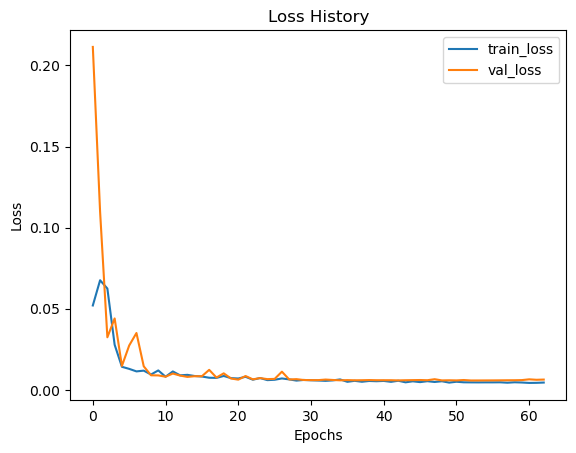

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

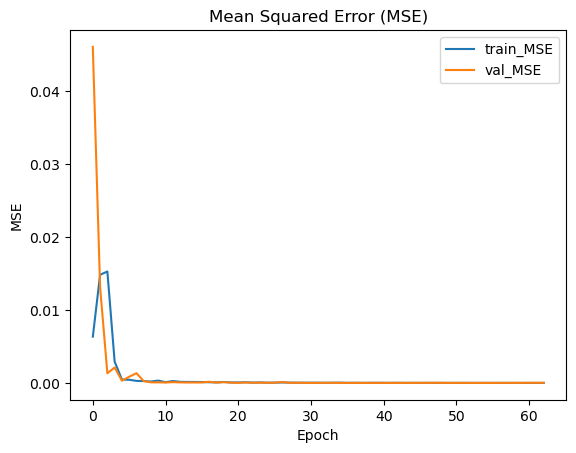

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

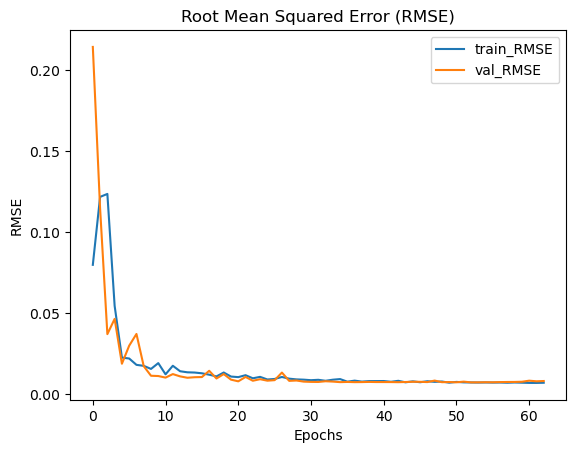

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

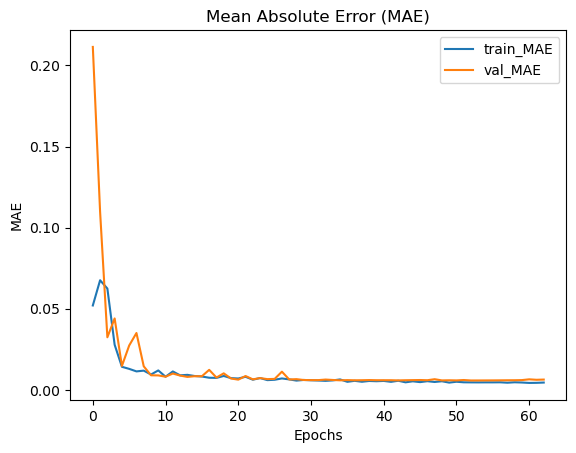

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

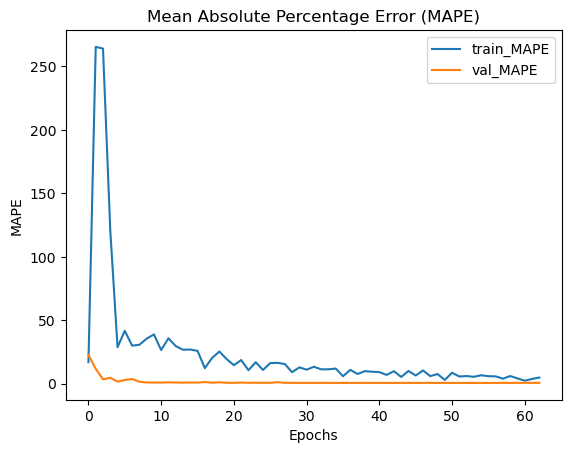

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:24:14.139820: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 1)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


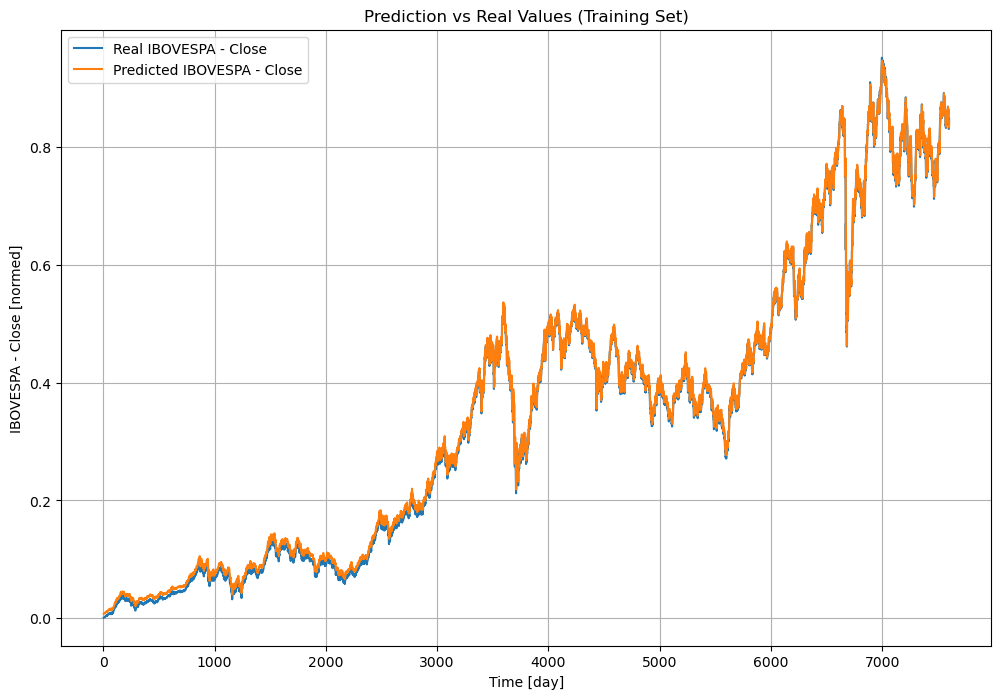

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 1)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


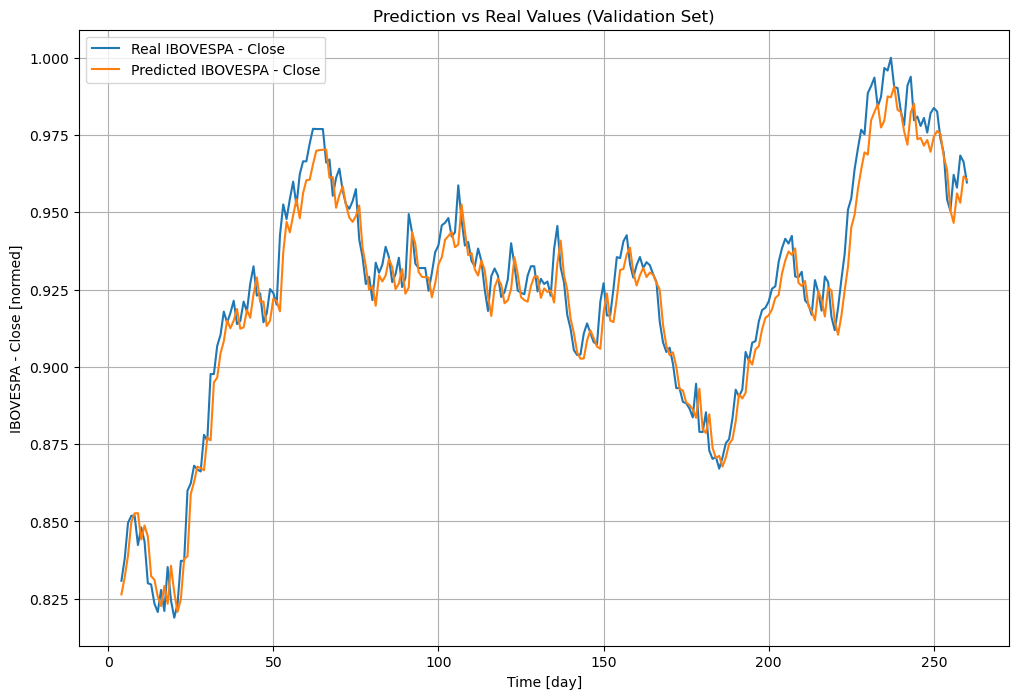

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 1)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


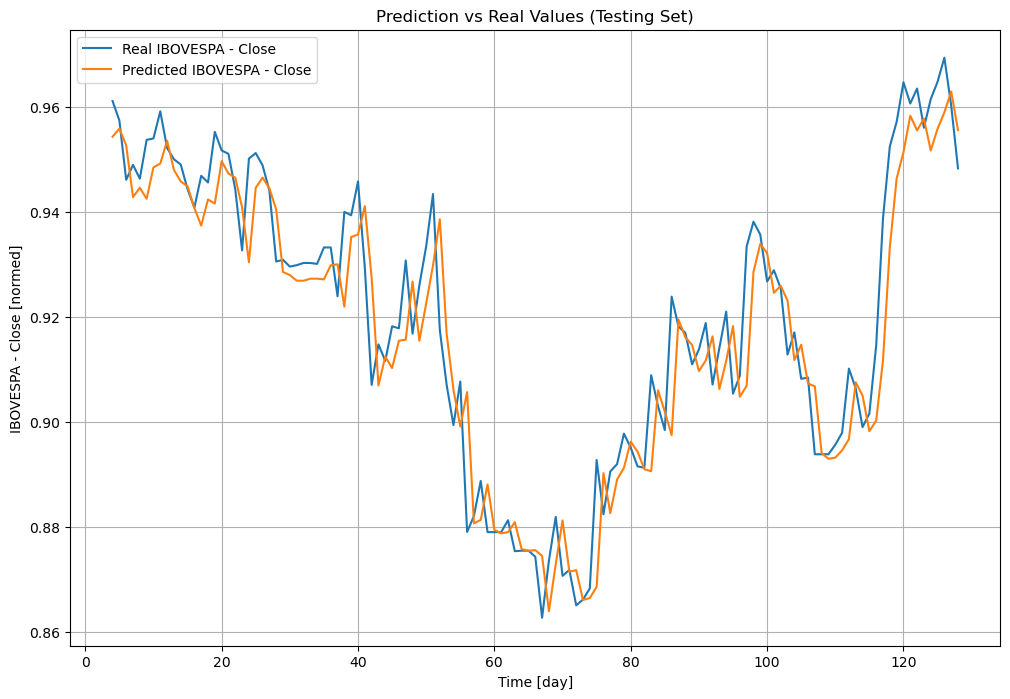

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

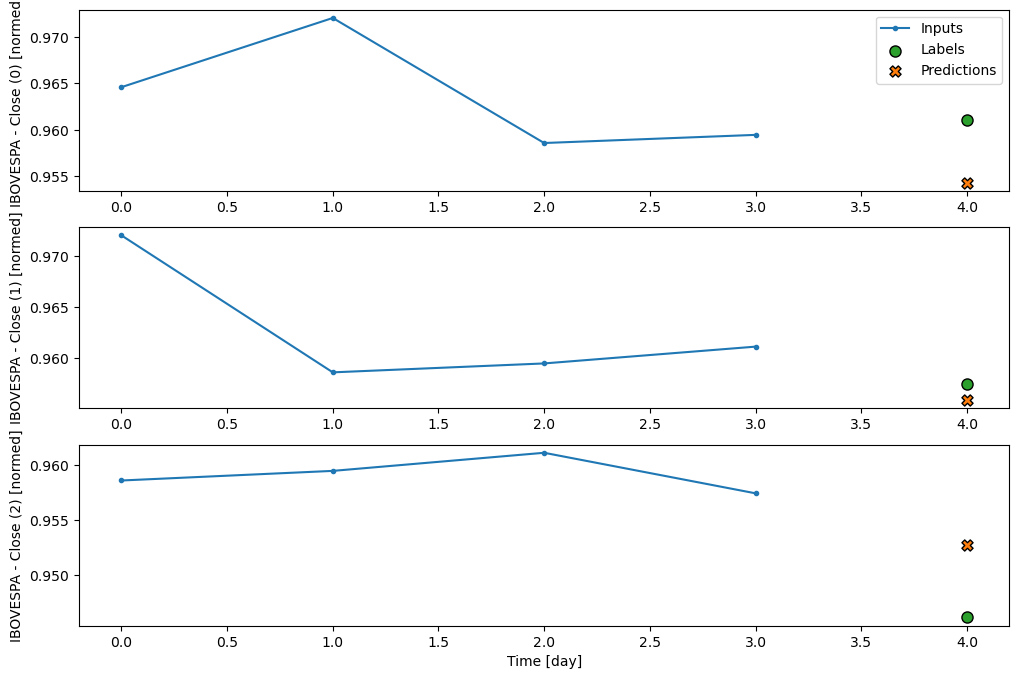

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:13s:754ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[[0.95432186, 0.95432186, 0.95432186, ..., 0.95432186,
         0.95432186, 0.95432186]],

       [[0.9558644 , 0.9558644 , 0.9558644 , ..., 0.9558644 ,
         0.9558644 , 0.9558644 ]],

       [[0.9526658 , 0.9526658 , 0.9526658 , ..., 0.9526658 ,
         0.9526658 , 0.9526658 ]],

       ...,

       [[0.958959  , 0.958959  , 0.958959  , ..., 0.958959  ,
         0.958959  , 0.958959  ]],

       [[0.9629353 , 0.9629353 , 0.9629353 , ..., 0.9629353 ,
         0.9629353 , 0.9629353 ]],

       [[0.955582  , 0.955582  , 0.955582  , ..., 0.955582  ,
         0.955582  , 0.955582  ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')